# MachineLearning 
## 1st Assignment - Shahid Beheshti University February 26, 2023

### Outline
- [Packages](#0)


<a name="0"></a>
##  **Packages** 

In [620]:
import numpy as np 
import pandas as pd
import random
#plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
#splitting data to train and test
from sklearn.model_selection import train_test_split
from scipy import stats
#Dataset using in exercise 5 and exercise 6
from sklearn import datasets
from sklearn.datasets import load_diabetes
#feature scaling
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
#Models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#model selection 
from sklearn.model_selection import GridSearchCV
#metrics
import math
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
#ols for forward selection
import statsmodels.api as sm
#wrapper methods
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#filter methods feature selection
from sklearn import preprocessing
from sklearn.feature_selection import mutual_info_classif
import shap
from scipy.stats import chisquare
from sklearn.feature_selection import r_regression, SelectKBest,SelectPercentile,f_regression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
#clustering 
from sklearn.cluster import KMeans
#multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
#binning
from scipy.stats import binned_statistic
#extra
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#larger dataframe 
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', None)

<a name="1"></a>
##  **Data Exploration** 
Checking out the Diabet dataset using in exercise 5 and exercise 6

In [631]:
diabetes = datasets.load_diabetes()

In [632]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [633]:
X,Y = load_diabetes(return_X_y=True)

In [634]:
X.shape

(442, 10)

In [635]:
type(X)

numpy.ndarray

In [636]:
X = pd.DataFrame(X,columns=['age','sex','bmi','bp','tc','ldl','hdl','tch','ltg','glu'])
X

age       sex       bmi        bp        tc       ldl       hdl  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
5   -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
6   -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
7    0.063504  0.050680 -0.001895  0.066629  0.090620  0.108914  0.022869   
8    0.041708  0.050680  0.061696 -0.040099 -0.013953  0.006202 -0.028674   
9   -0.070900 -0.044642  0.039062 -0.033213 -0.012577 -0.034508 -0.024993   
10  -0.096328 -0.044642 -0.083808  0.008101 -0.103389 -0.090561 -0.013948   
11   0.027178  0.050680  0.017506 -0.033213 -0.007073  0.045972 -0.065491   
12   0.016281 -0.044642 -0.028840 -0.009113 -0.004321 -0.009769  0.044958   
13   0.005383  0.050680 -0.001895  0.008101 -0.004321 -0.015719 -0.002903   
14   0.045341 -0.044642 -0.025607 -0.012556  0.017694 -0.000061  0.081775   
15  -0.052738  0.050680 -0.018062  0.080401  0.089244  0.107662 -0.039719   
16  -0.005515 -0.044642  0.042296  0.049415  0.024574 -0.023861  0.074412   
17   0.070769  0.050680  0.012117  0.056301  0.034206  0.049416 -0.039719   
18  -0.038207 -0.044642 -0.010517 -0.036656 -0.037344 -0.019476 -0.028674   
19  -0.027310 -0.044642 -0.018062 -0.040099 -0.002945 -0.011335  0.037595   
20  -0.049105 -0.044642 -0.056863 -0.043542 -0.045599 -0.043276  0.000779   
21  -0.085430  0.050680 -0.022373  0.001215 -0.037344 -0.026366  0.015505   
22  -0.085430 -0.044642 -0.004050 -0.009113 -0.002945  0.007767  0.022869   
23   0.045341  0.050680  0.060618  0.031065  0.028702 -0.047347 -0.054446   
24  -0.063635 -0.044642  0.035829 -0.022885 -0.030464 -0.018850 -0.006584   
25  -0.067268  0.050680 -0.012673 -0.040099 -0.015328  0.004636 -0.058127   
26  -0.107226 -0.044642 -0.077342 -0.026328 -0.089630 -0.096198  0.026550   
27  -0.023677 -0.044642  0.059541 -0.040099 -0.042848 -0.043589  0.011824   
28   0.052606 -0.044642 -0.021295 -0.074527 -0.040096 -0.037639 -0.006584   
29   0.067136  0.050680 -0.006206  0.063187 -0.042848 -0.095885  0.052322   
30  -0.060003 -0.044642  0.044451 -0.019442 -0.009825 -0.007577  0.022869   
31  -0.023677 -0.044642 -0.065486 -0.081413 -0.038720 -0.053610  0.059685   
32   0.034443  0.050680  0.125287  0.028758 -0.053855 -0.012900 -0.102307   
33   0.030811 -0.044642 -0.050396 -0.002228 -0.044223 -0.089935  0.118591   
34   0.016281 -0.044642 -0.063330 -0.057313 -0.057983 -0.048912  0.008142   
35   0.048974  0.050680 -0.030996 -0.049291  0.049341 -0.004132  0.133318   
36   0.012648 -0.044642  0.022895  0.052858  0.008063 -0.028558  0.037595   
37  -0.009147 -0.044642  0.011039 -0.057313 -0.024960 -0.042963  0.030232   
38  -0.001882  0.050680  0.071397  0.097615  0.087868  0.075407 -0.021311   
39  -0.001882  0.050680  0.014272 -0.074527  0.002559  0.006202 -0.013948   
40   0.005383  0.050680 -0.008362  0.021872  0.054845  0.073215 -0.024993   
41  -0.099961 -0.044642 -0.067641 -0.108956 -0.074494 -0.072712  0.015505   
42  -0.060003  0.050680 -0.010517 -0.014863 -0.049727 -0.023547 -0.058127   
43   0.019913 -0.044642 -0.023451 -0.071085  0.020446 -0.010082  0.118591   
44   0.045341  0.050680  0.068163  0.008101 -0.016704  0.004636 -0.076536   
45   0.027178  0.050680 -0.035307  0.032201 -0.011201  0.001504 -0.010266   
46  -0.056370 -0.044642 -0.011595 -0.033213 -0.046975 -0.047660  0.004460   
47  -0.078165 -0.044642 -0.073030 -0.057313 -0.084126 -0.074277 -0.024993   
48   0.067136  0.050680 -0.041774  0.011544  0.002559  0.005889  0.041277   
49  -0.041840  0.050680  0.014272 -0.005670 -0.012577  0.006202 -0.072854   
50   0.034443 -0.044642 -0.007284  0.014987 -0.044223 -0.037326 -0.002903   
51   0

In [528]:
Diabet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   tc      442 non-null    float64
 5   ldl     442 non-null    float64
 6   hdl     442 non-null    float64
 7   tch     442 non-null    float64
 8   ltg     442 non-null    float64
 9   glu     442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


**No null values , and all features are float** 

In [529]:
Diabet.describe()

age           sex           bmi            bp            tc  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -1.444295e-18  2.543215e-18 -2.255925e-16 -4.854086e-17 -1.428596e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                ldl           hdl           tch           ltg           glu  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.898811e-17 -6.028360e-18 -1.788100e-17  9.243486e-17  1.351770e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260971e-01 -1.377672e-01   
25%   -3.035840e-02 -3.511716e-02 -3.949338e-02 -3.324559e-02 -3.317903e-02   
50%   -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947171e-03 -1.077698e-03   
75%    2.984439e-02  2.931150e-02  3.430886e-02  3.243232e-02  2.791705e-02   
max    1.987880e-01  1.811791e-01  1.852344e-01  1.335973e-01  1.356118e-01   

           target  
count  442.000000  
mean   152.133484  
std     77.093005  
min     25.000000  
25%     87.000000  
50%    140.500000  
75%    211.500000  
max    346.000000

visualizing target values

<AxesSubplot:xlabel='target'>

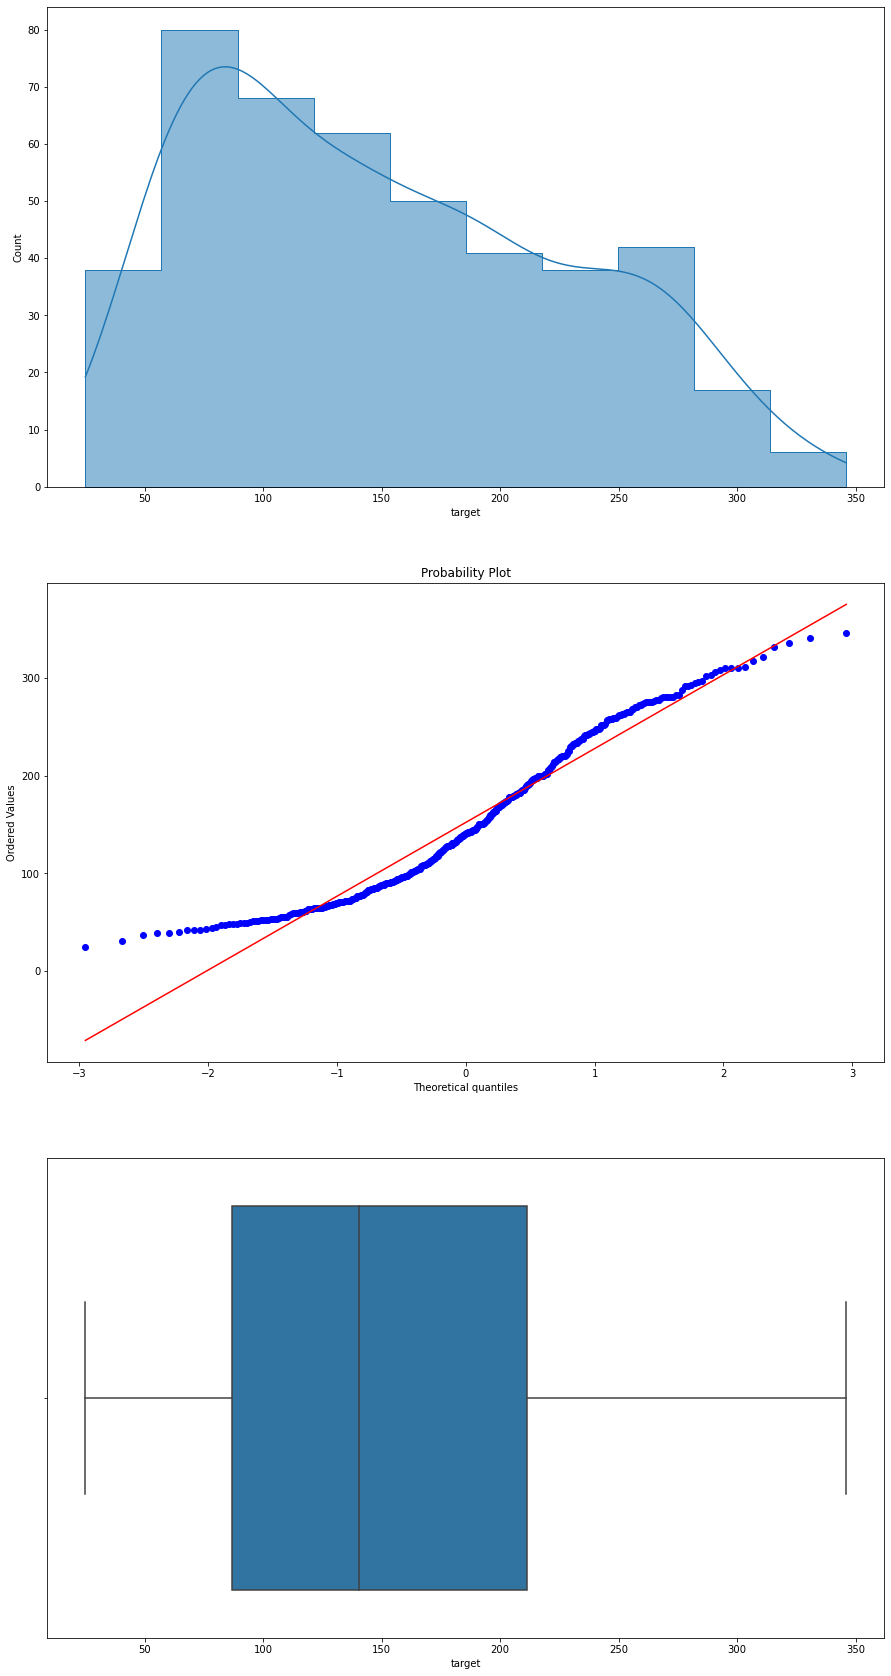

In [592]:
fig, ax = plt.subplots(3, 1, figsize=(15, 30))
sns.histplot(x=Diabet.target, data=Diabet, kde=True, element="step",ax=ax[0])
stats.probplot(Diabet.target,plot=ax[1])
sns.boxplot(data=Diabet , x = 'target',ax=ax[2])

The correlation coefficient has values between -1 to 1<br>
— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)<br>
— A value closer to 1 implies stronger positive correlation<br>
— A value closer to -1 implies stronger negative correlation<br>

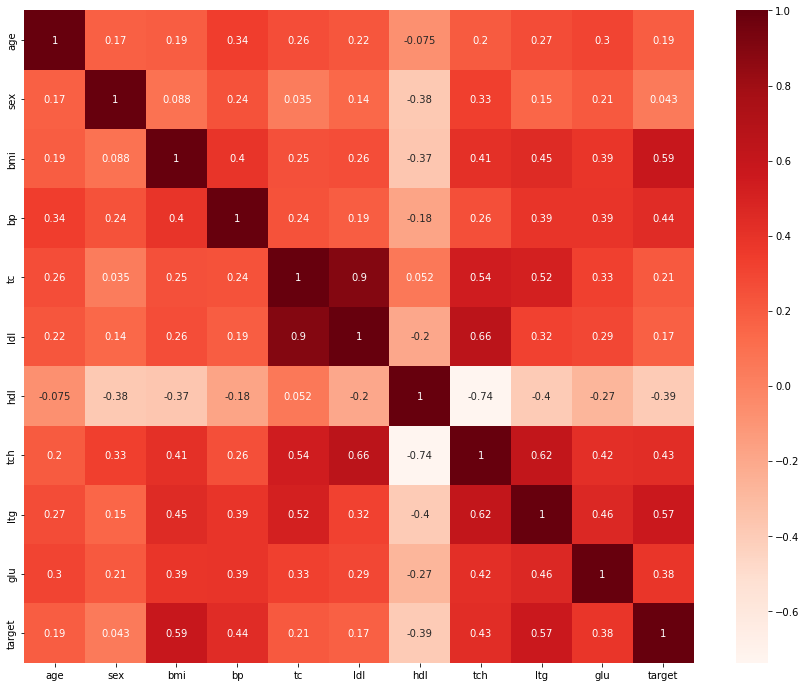

In [531]:
plt.figure(figsize=(15,12))
cor = Diabet.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

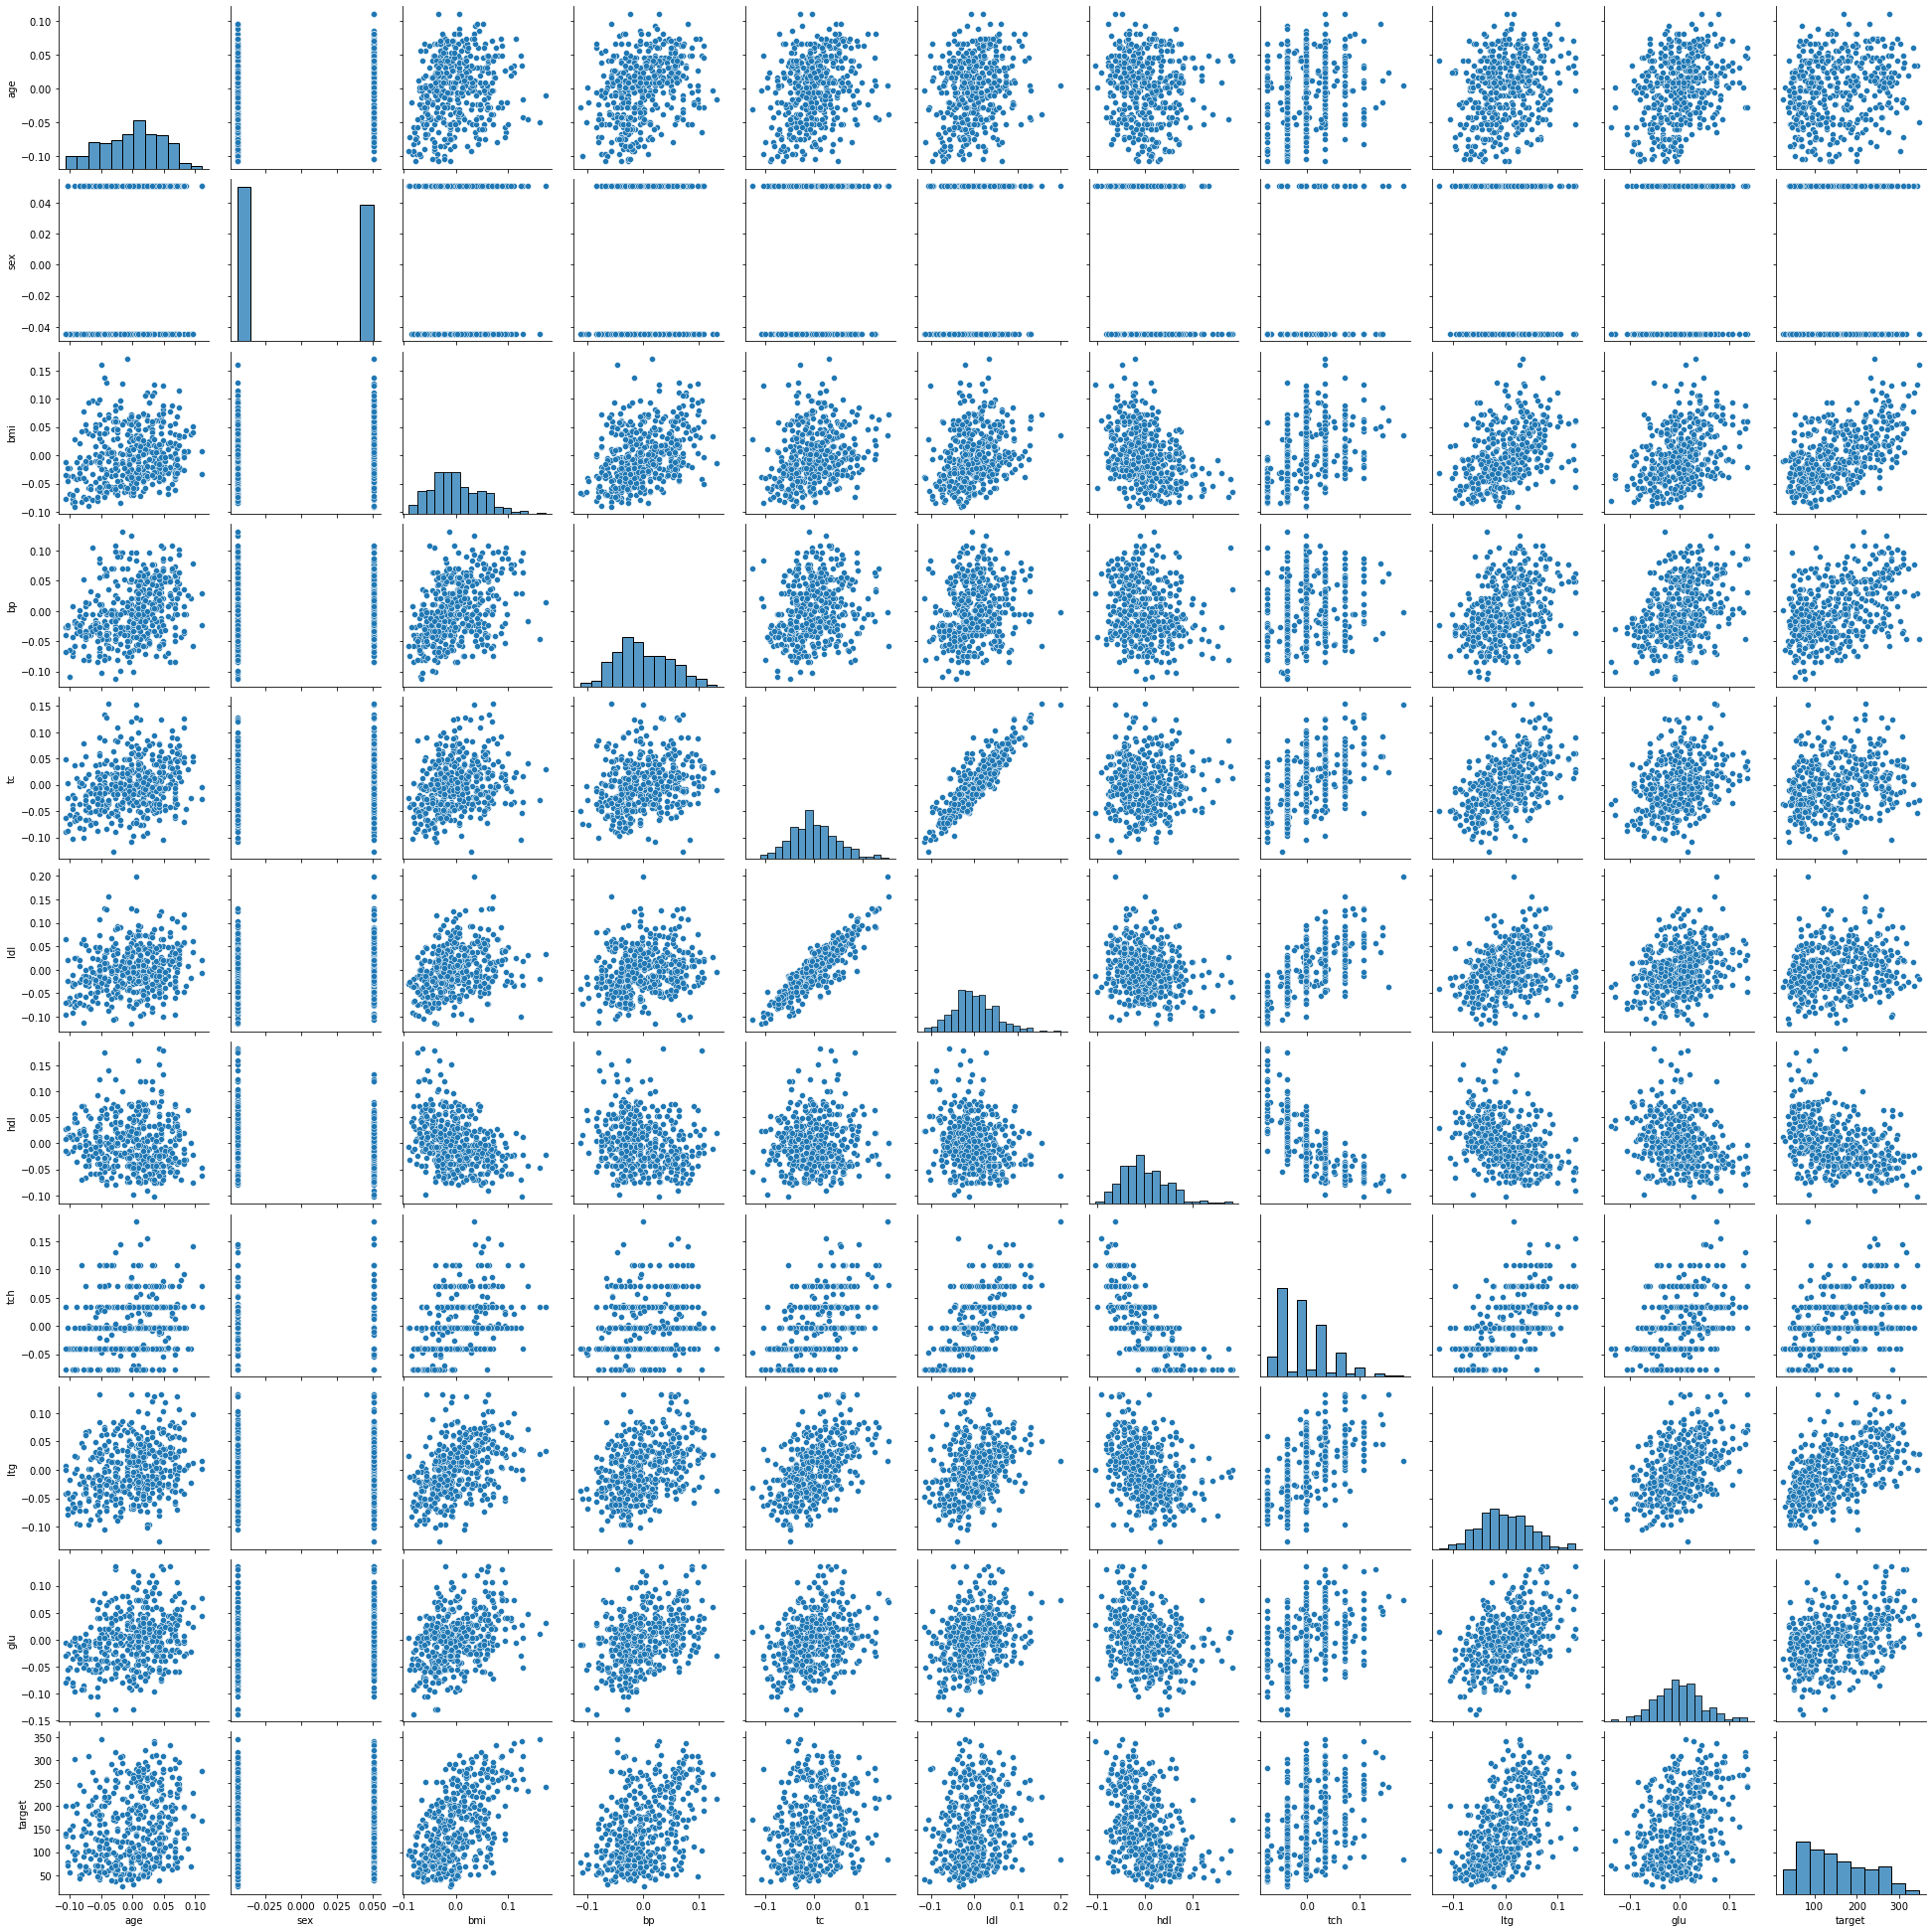

In [532]:
sns.pairplot(Diabet)

<a name="2"></a>
##  **Exercise 5** 
Implement Linear Regression with Mean Absolute Error as the cost function from scratch. Compare your results with the Linear Regression module of Scikit-Learn.

In [574]:
class LinearRegressionScrath():
    #need learning rate for gradient descent and number of iteration
    def __init__( self, learning_rate, iterations ):
        self.learning_rate = learning_rate
        self.iterations = iterations
        
    #Get training dataset with their labels to fit the model  
    def fit(self,X,y):
        self.X = X
        self.y = y
        #first save the shape of X as m*n shape matrix
        self.m , self.n = X.shape
        #then initialize the parameters(we have y = ax + b and our parameters are 'a' and 'b')
        self.a = np.zeros(self.n)
        self.b = round(random.uniform(0,1),4)
        #update weights as many as iteration in a for loop
        for i in range(self.iterations):
            self.estimation()
            

    

    def estimation(self):
        Y_pred = np.dot(self.X ,self.a) + self.b
        dx = sum(np.sign(Y_pred - self.y))/self.n
        self.a = self.a - self.learning_rate * dx
        self.b = self.b - self.learning_rate * dx
        
    def predict(self,X):
        #predict x just by put in the formula
         return X.dot( self.a ) + self.b

In [595]:
Diabet = datasets.load_diabetes(return_X_y=False, as_frame=False, scaled=True)

In [597]:
X = Diabet.data
Y = Diabet.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/5, random_state = 0 )

In [605]:
scratch = LinearRegressionScrath(learning_rate = 0.1, iterations=1500)  
scratch.fit( X_train, Y_train)

In [606]:
 = scratch.predict( X_test )

In [610]:
mean_absolute_error(Y_pred,Y_test)

51.14095680863134

### Linear Regression module of Scikit-Learn

In [611]:
 sklearnLinearRegression = LinearRegression()

In [612]:
sklearnLinearRegression.fit(X_train,Y_train)

LinearRegression()

In [613]:
sklearnLinearRegression.score(X_train,Y_train)

0.5539250081377072

In [614]:
sklearnLinearRegression.score(X_test,Y_test)

0.3322332173106183

**train error**

In [615]:
y_pred_train = sklearnLinearRegression.predict(X_train)

In [616]:
mean_absolute_error(y_pred_train,Y_train)

42.59334431424345

**test error**

In [617]:
mean_absolute_error(sklearnLinearRegression.predict(X_test),Y_test)

46.17358500370479

# 

<a name="3"></a>
##  **Exercise 6** 
Implement Linear Regression using the normal equation as the training algorithm from scratch.

In [336]:
Y = Diabet['target']
X = Diabet.loc[:, Diabet.columns != "target"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/5, random_state = 0 )

In [334]:
def theta(X, y):    
    n = X.shape[0]
    X = np.append(X, np.ones((n,1)), axis=1)    
    y = y.reshape(n,1)
    theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
    return theta

In [335]:
# function for predicting our values
def predict(X):
    
    # add 1 to each row for bias 
    X = np.append(X, np.ones((X.shape[0],1)), axis=1)
    prediction = np.dot(X, theta)
    
    return prediction

In [338]:
theta = theta(X_train.values,Y_train.values)

In [339]:
theta

array([[ -35.55025079],
       [-243.16508959],
       [ 562.76234744],
       [ 305.46348218],
       [-662.70290089],
       [ 324.20738537],
       [  24.74879489],
       [ 170.3249615 ],
       [ 731.63743545],
       [  43.0309307 ],
       [ 152.53804701]])

In [340]:
y_pred = predict(X_train)

In [342]:
mean_absolute_error(y_pred,Y_train)

42.59334431424343

In [347]:
mean_squared_error(y_pred,Y_train)

2734.7508990757424

In [343]:
y_pred_test = predict(X_test)

In [345]:
mean_absolute_error(y_pred_test,Y_test)

46.17358500370487

In [346]:
mean_squared_error(y_pred_test,Y_test)

3424.2593342986697

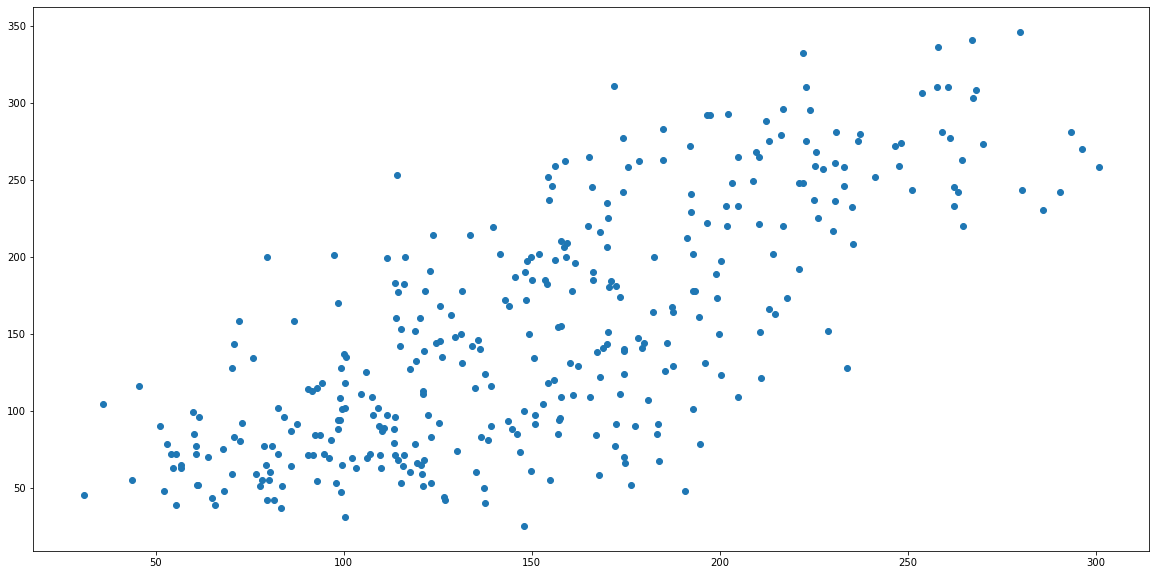

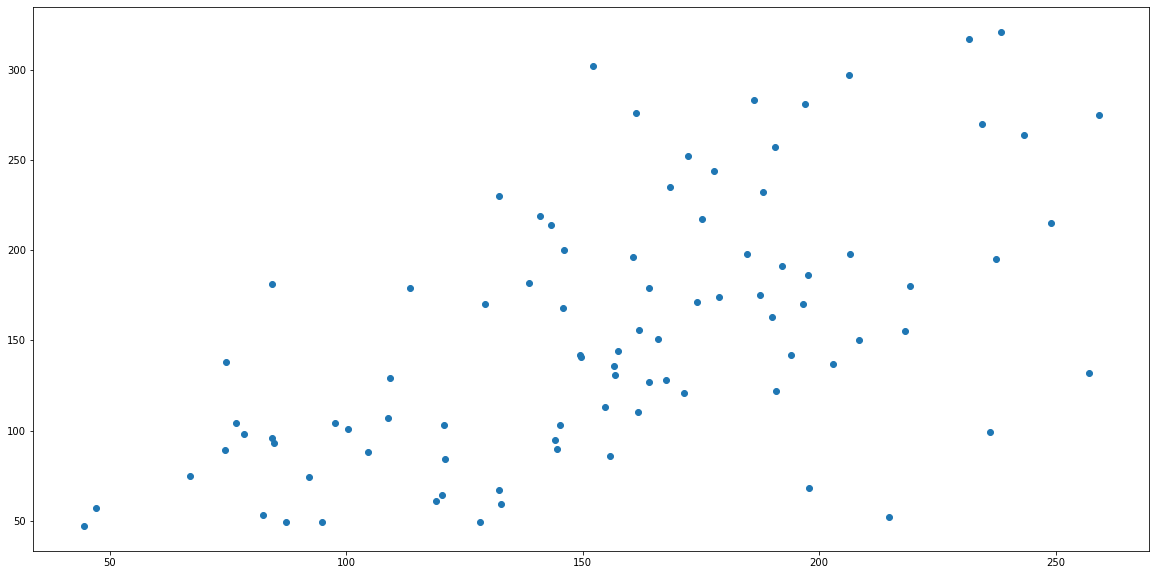

In [361]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
plt.scatter(y_pred ,Y_train)

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
plt.scatter(y_pred_test,Y_test)


<a name="4"></a>
##  **Exercise 10** 
Implement Forward and Backward Feature selection algorithms from scratch with MSE as the metric.

In [195]:
def forward_selection(dataset, n):
    Y = dataset['shares']
    df = dataset.loc[:, dataset.columns != "shares"]
    X_train, X_test, Y_train, Y_test = train_test_split(df, Y, test_size = 0.2, random_state = 0 )
    initial_features = X_train.columns.tolist()
    picked_features = []
    while (len(initial_features) > 0):
        remaining_features = list(set(initial_features) - set(picked_features))

        mse = {}
        for current_feature in remaining_features:
            linear_regression = LinearRegression()
            test_model = X_train[picked_features + [current_feature]].values
            if  test_model.shape[1] == 1:
                test_model = test_model.reshape(-1, 1)
                model = linear_regression.fit(test_model, Y_train.values) 
            else:
                model = linear_regression.fit(test_model, Y_train.values)
            y_pred = linear_regression.predict(X_test[picked_features + [current_feature]].values)
            model_error = mean_squared_error(Y_test.values, y_pred)
            mse[current_feature] = model_error
            
        better_feature = min(mse, key=mse.get)
        
        if(len(picked_features) < n):
            picked_features.append(better_feature)
        else:
            break
             
    return picked_features

In [196]:
def Forward_SFS(dataset,k):
    Y = dataset['shares']
    df = dataset.loc[:, dataset.columns != "shares"]
    sfs = SFS(LinearRegression(),
          k_features=k,
          forward=True,
          floating=False,
          scoring='neg_mean_squared_error',
          cv = 0)
    sfs.fit(df, Y)
    selceted = sfs.k_feature_names_
    return list(selceted)

In [493]:
def backwardSelection(dataset,n):
    Y = dataset['shares']
    df = dataset.loc[:, dataset.columns != "shares"]
    X_train, X_test, Y_train, Y_test = train_test_split(df, Y, test_size = 0.2, random_state = 0 )
    
    features = X_train.columns.tolist()
    removed = []
    remaining_features = all_features
    
    for _ in range(len(features)-1):
        remaining_features = list(set(features)-set(removed))
        min_err = math.inf

        for removed_feature in remaining_features:
            our_features = remaining_features.copy()
            our_features.remove(removed_feature)
            X = X_train[our_features].values
            X_t = X_test[our_features].values
            
            if X.shape[1] == 1:
                X = X.reshape(-1,1)
            
            model = LinearRegression()
            model.fit(X, Y_train)
            
            y_pred = model.predict(X_t)
            error = mean_squared_error(Y_test, y_pred)
            
            if error < min_err:
                min_err = error
                next_removed_feature = removed
                
        removed.append(next_removed_feature)
    
    return removed_features[-n:]

In [497]:
def Backward_SBS(dataset,k):
    Y = dataset['shares']
    df = dataset.loc[:, dataset.columns != "shares"]
    sbs = SFS(LinearRegression(), k_features=k, forward=False, verbose=1, scoring='neg_mean_squared_error')
    sbs.fit(df, Y)
    selceted = sbs.k_feature_names_
    return list(selceted)

### used in exercise 12 feature selection.wrapper methods : 
- [Feature Selection](#5.5)

<a name="5"></a>
##  **Exercise 12** 
In this part, you are going to work with the News Popularity Prediction dataset. You will implement a regression model using the Scikit-Learn package to predict the popularity of new articles (the number of times they will be shared online) based on about 60 features. You are expected:<br>

  ### Outline
- [Models](#5.1)
- [Exploratory data analysis](#5.2)
    - [Change Target](#5.1.1)
    - [Delete records with no content](#5.1.2)
    - [Categorical Feature Encoding](#5.1.3)
    - [Multicollinearity](#5.1.4)
- [Feature Scaling](#5.4)
    - [Methods](#5.4.0)
    - [Feature analysis](#5.4.1)
    - [Outliers](#5.4.2)
    - [Scaling](#5.4.3)  

- [Feature Selection](#5.5)
- [Finding Better way](#5.6)
    - [Other Models](#5.6.0)
    - [Classification](#5.6.1)

   




<a name="5.1"></a>
### 1. Models

**Regression**

In [247]:
def simpleLinear(dataset):
    X = dataset[dataset.columns.difference(['shares'])]
    Y = dataset['shares']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/5, random_state = 0 )
    reg = LinearRegression()
    reg.fit(X_train,Y_train)
    Y_pred = reg.predict(X_test)
    score = r2_score(Y_test, Y_pred)
    print("\nLinear Model............................................\n")
    print("MAE : " + str(mean_absolute_error(Y_test, Y_pred)))
    print("MSE : " + str(mean_squared_error(Y_test, Y_pred)))
    print("RMSE : " + str(math.sqrt(mean_squared_error(Y_test, Y_pred))))
    print("r2_score : " + str(score) + "  "+ str(round(score, 2) *100))

In [248]:
def ridge_regression(dataset,alpha):
    X = dataset[dataset.columns.difference(['shares'])]
    Y = dataset['shares']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/5, random_state = 0 )
    #Fit the model
    ridgereg = Ridge(alpha=alpha)
    ridgereg.fit(X_train,Y_train)
    Y_pred = ridgereg.predict(X_test)
    train_score_ridge = ridgereg.score(X_train, Y_train)
    test_score_ridge = ridgereg.score(X_test, Y_test)
    score = r2_score(Y_test, Y_pred)
    print("\nRidge Model............................................\n")
    print("The train score for ridge model is {}".format(train_score_ridge))
    print("The test score for ridge model is {}".format(test_score_ridge))
    print("MAE : " + str(mean_absolute_error(Y_test, Y_pred)))
    print("MSE : " + str(mean_squared_error(Y_test, Y_pred)))
    print("r2_score : " + str(score) + "  "+ str(round(score, 2) *100))


In [249]:
def lasso_regression(dataset, alpha):
    X = dataset[dataset.columns.difference(['shares'])]
    Y = dataset['shares']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/5, random_state = 0 )
    #Fit the model
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train,Y_train)
    train_score_ls =lasso.score(X_train,Y_train)
    test_score_ls =lasso.score(X_test,Y_test)
    Y_pred = lasso.predict(X_test)
    score = r2_score(Y_test, Y_pred)
    print("\nLasso Model............................................\n")                
    print("The train score for ls model is {}".format(train_score_ls))
    print("The test score for ls model is {}".format(test_score_ls))
    print("MAE : " + str(mean_absolute_error(Y_test, Y_pred)))
    print("MSE : " + str(mean_squared_error(Y_test, Y_pred)))
    print("r2_score : " + str(score) + "  "+ str(round(score, 2) *100))
    

In [250]:
def polynomial(degree,dataset):
    X = dataset[dataset.columns.difference(['shares'])]
    Y = dataset['shares']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/5, random_state = 0 )
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X_train)
    lin2 = LinearRegression()
    lin2.fit(X_poly, Y_train)
    Y_pred = lin2.predict(poly.fit_transform(X_test))
    score = r2_score(Y_test, Y_pred)
    print("\nPolynomial Model........................................\n")                
    print("MAE : " + str(mean_absolute_error(Y_test, Y_pred)))
    print("MSE : " + str(mean_squared_error(Y_test, Y_pred)))
    print("RMSE : " + str(math.sqrt(mean_squared_error(Y_test, Y_pred))))
    print("r2_score : " + str(score) + "  "+ str(round(score, 2) *100))

In [251]:
def randomforestReg(dataset):
    X = dataset[dataset.columns.difference(['shares'])]
    Y = dataset['shares']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/5, random_state = 0 )
    rf = RandomForestRegressor()
    rf.fit(X_train,Y_train)
    Y_pred = rf.predict(X_test)
    score = r2_score(Y_test, Y_pred)
    print("\nRandomForestregressor...................................\n")                
    print("MAE : " + str(mean_absolute_error(Y_test, Y_pred)))
    print("MSE : " + str(mean_squared_error(Y_test, Y_pred)))
    print("r2_score : " + str(score) + "  "+ str(round(score, 2) *100))

In [252]:
def gradientBoostingRegressor(dataset):
    X = dataset[dataset.columns.difference(['shares'])]
    Y = dataset['shares']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/5, random_state = 0 )
    gb = GradientBoostingRegressor()
    gb.fit(X_train,Y_train)
    Y_pred = gb.predict(X_test)
    score = r2_score(Y_test, Y_pred)
    print("\nGradientBoostingRegresso................................\n")                
    print("MAE : " + str(mean_absolute_error(Y_test, Y_pred)))
    print("MSE : " + str(mean_squared_error(Y_test, Y_pred)))
    print("r2_score : " + str(score) + "  "+ str(round(score, 2) *100))

In [253]:
def svr(dataset):
    X = dataset[dataset.columns.difference(['shares'])]
    Y = dataset['shares']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/5, random_state = 0 )
    regressor = SVR(kernel = 'rbf')
    regressor.fit(X_train, Y_train)
    Y_pred = regressor.predict(X_test)
    score = r2_score(Y_test, Y_pred)
    print("\nSVR......................................................\n")                
    print("MAE : " + str(mean_absolute_error(Y_test, Y_pred)))
    print("MSE : " + str(mean_squared_error(Y_test, Y_pred)))
    print("r2_score : " + str(score) + "  "+ str(round(score, 2) *100))

**classification**

In [254]:
def decisionTree(dataset):
    X = dataset[dataset.columns.difference(['target'])]
    Y = dataset['target']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/5, random_state = 0 )
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, Y_train)
    y_pred = dtc.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    print("\nDecisionTree.........................................\n") 
    print("Accuracy:", accuracy)
    targetNames = dataset['target'].values.unique().tolist()
    print(classification_report(Y_test, y_pred, target_names=targetNames))

In [255]:
def randomForestClassifier(dataset):
    X = dataset[dataset.columns.difference(['target'])]
    Y = dataset['target']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/5, random_state = 0 )
    rf = RandomForestClassifier(n_estimators=500, random_state=42)
    rf.fit(X_train, Y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    print("\nRandomForest.........................................\n") 
    print("Accuracy:", accuracy)
    targetNames = dataset['target'].values.unique().tolist()
    print(classification_report(Y_test, y_pred, target_names=targetNames))
    

In [256]:
def knn(dataset):
    X = dataset[dataset.columns.difference(['target'])]
    Y = dataset['target']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/5, random_state = 0 )
    knn = KNeighborsClassifier()
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    print("\nKNN..................................................\n") 
    print("Accuracy:", accuracy)
    targetNames = dataset['target'].values.unique().tolist()
    print(classification_report(Y_test, y_pred, target_names=targetNames))

In [257]:
def svc(dataset):
    X = dataset[dataset.columns.difference(['target'])]
    Y = dataset['target']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/5, random_state = 0 )
    clf = SVC(kernel='linear')
    clf.fit(X_train,Y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    print("\nSVC..................................................\n") 
    print("Accuracy:", accuracy)
    targetNames = dataset['target'].values.unique().tolist()
    print(classification_report(Y_test, y_pred, target_names=targetNames))

<a name="5.2"></a>
### 2. Perform exploratory data analysis on the dataset.

In [638]:
OnlineNewsPopularity = pd.read_csv("dataset/OnlineNewsPopularity.csv")

In [639]:
OnlineNewsPopularity.shape

(39644, 61)

In [640]:
OnlineNewsPopularity.head(10)

url   timedelta  \
0    http://mashable.com/2013/01/07/amazon-instant-video-browser/       731.0   
1     http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/       731.0   
2  http://mashable.com/2013/01/07/apple-40-billion-app-downloads/       731.0   
3        http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/       731.0   
4                http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   
5                http://mashable.com/2013/01/07/beewi-smart-toys/       731.0   
6    http://mashable.com/2013/01/07/bodymedia-armbandgets-update/       731.0   
7                http://mashable.com/2013/01/07/canon-poweshot-n/       731.0   
8   http://mashable.com/2013/01/07/car-of-the-future-infographic/       731.0   
9             http://mashable.com/2013/01/07/chuck-hagel-website/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   
5             10.0              370.0          0.559889                1.0   
6              8.0              960.0          0.418163                1.0   
7             12.0              989.0          0.433574                1.0   
8             11.0               97.0          0.670103                1.0   
9             10.0              231.0          0.636364                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                   0.815385         4.0              2.0        1.0   
1                   0.791946         3.0              1.0        1.0   
2                   0.663866         3.0              1.0        1.0   
3                   0.665635         9.0              0.0        1.0   
4                   0.540890        19.0             19.0       20.0   
5                   0.698198         2.0              2.0        0.0   
6                   0.549834        21.0             20.0       20.0   
7                   0.572108        20.0             20.0       20.0   
8                   0.836735         2.0              0.0        0.0   
9                   0.797101         4.0              1.0        1.0   

    num_videos   average_token_length   num_keywords  \
0          0.0               4.680365            5.0   
1          0.0               4.913725            4.0   
2          0.0               4.393365            6.0   
3          0.0               4.404896            7.0   
4          0.0               4.682836            7.0   
5          0.0               4.359459            9.0   
6          0.0               4.654167           10.0   
7          0.0               4.617796            9.0   
8          0.0               4.855670            7.0   
9          1.0               5.090909            5.0   

    data_channel_is_lifestyle   data_channel_is_entertainment  \
0                         0.0                             1.0   
1                         0.0                             0.0   
2                         0.0                             0.0   
3                         0.0                             1.0   
4                         0.0                             0.0   
5                         0.0                             0.0   
6                         1.0                             0.0   
7                         0.0                             0.0   
8                         0.0                             0.0   
9                         0.0                             0.0   

    data_channel_is_bus   data_channel_is_socmed   data_channel_is_tech  \
0                   0.0                      0.0                    0.0   
1                   1.0            

In [261]:
#Removing Space Character from Feature names
OnlineNewsPopularity.columns=OnlineNewsPopularity.columns.str.replace(" ","")

**It's obvious that we don't need URL and timedelta(non predictive)**

In [262]:
OnlineNewsPopularity.drop('url', inplace=True, axis=1)
OnlineNewsPopularity.drop('timedelta', inplace=True, axis=1)

**Checking null values and data types**

In [263]:
OnlineNewsPopularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   n_tokens_title                 39644 non-null  float64
 1   n_tokens_content               39644 non-null  float64
 2   n_unique_tokens                39644 non-null  float64
 3   n_non_stop_words               39644 non-null  float64
 4   n_non_stop_unique_tokens       39644 non-null  float64
 5   num_hrefs                      39644 non-null  float64
 6   num_self_hrefs                 39644 non-null  float64
 7   num_imgs                       39644 non-null  float64
 8   num_videos                     39644 non-null  float64
 9   average_token_length           39644 non-null  float64
 10  num_keywords                   39644 non-null  float64
 11  data_channel_is_lifestyle      39644 non-null  float64
 12  data_channel_is_entertainment  39644 non-null 

**Checking Duplicate values**

In [264]:
OnlineNewsPopularity=OnlineNewsPopularity.drop_duplicates()
OnlineNewsPopularity.shape

(39644, 59)

In [265]:
X = OnlineNewsPopularity[OnlineNewsPopularity.columns.difference(['shares'])]
Y = OnlineNewsPopularity['shares']

In [266]:
OnlineNewsPopularity.describe()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
count    39644.000000      39644.000000     39644.000000      39644.000000   
mean        10.398749        546.514731         0.548216          0.996469   
std          2.114037        471.107508         3.520708          5.231231   
min          2.000000          0.000000         0.000000          0.000000   
25%          9.000000        246.000000         0.470870          1.000000   
50%         10.000000        409.000000         0.539226          1.000000   
75%         12.000000        716.000000         0.608696          1.000000   
max         23.000000       8474.000000       701.000000       1042.000000   

       n_non_stop_unique_tokens     num_hrefs  num_self_hrefs      num_imgs  \
count              39644.000000  39644.000000    39644.000000  39644.000000   
mean                   0.689175     10.883690        3.293638      4.544143   
std                    3.264816     11.332017        3.855141      8.309434   
min                    0.000000      0.000000        0.000000      0.000000   
25%                    0.625739      4.000000        1.000000      1.000000   
50%                    0.690476      8.000000        3.000000      1.000000   
75%                    0.754630     14.000000        4.000000      4.000000   
max                  650.000000    304.000000      116.000000    128.000000   

         num_videos  average_token_length  num_keywords  \
count  39644.000000          39644.000000  39644.000000   
mean       1.249874              4.548239      7.223767   
std        4.107855              0.844406      1.909130   
min        0.000000              0.000000      1.000000   
25%        0.000000              4.478404      6.000000   
50%        0.000000              4.664082      7.000000   
75%        1.000000              4.854839      9.000000   
max       91.000000              8.041534     10.000000   

       data_channel_is_lifestyle  data_channel_is_entertainment  \
count               39644.000000                   39644.000000   
mean                    0.052946                       0.178009   
std                     0.223929                       0.382525   
min                     0.000000                       0.000000   
25%                     0.000000                       0.000000   
50%                     0.000000                       0.000000   
75%                     0.000000                       0.000000   
max                     1.000000                       1.000000   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
count         39644.000000            39644.000000          39644.000000   
mean              0.157855                0.058597              0.185299   
std               0.364610                0.234871              0.388545   
min               0.000000                0.000000              0.000000   
25%               0.000000                0.000000              0.000000   
50%               0.000000                0.000000              0.000000   
75%               0.000000                0.000000              0.000000   
max               1.000000                1.000000              1.000000   

       data_channel_is_world    kw_min_min     kw_max_min    kw_avg_min  \
count           39644.000000  39644.000000   39644.000000  39644.000000   
mean                0.212567     26.106801    1153.951682    312.366967   
std                 0.409129     69.633215    3857.990877    620.783887   
min                 0.000000     -1.000000       0.000000     -1.000000   
25%                 0.000000     -1.000000     445.000000    141.750000   
50%                 0.000000     -1.000000     660.000000    235.500000   
75%                 0.000000      4.000000    1000.000000    357.000000   
max                 1.000000    377.000000  298400.000000  42827.857143   

          kw_min_max     kw_max_max     kw_avg_max    kw_min_avg  \
count   39644.000000   3964

In [267]:
Y.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

high std

<AxesSubplot:xlabel='shares'>

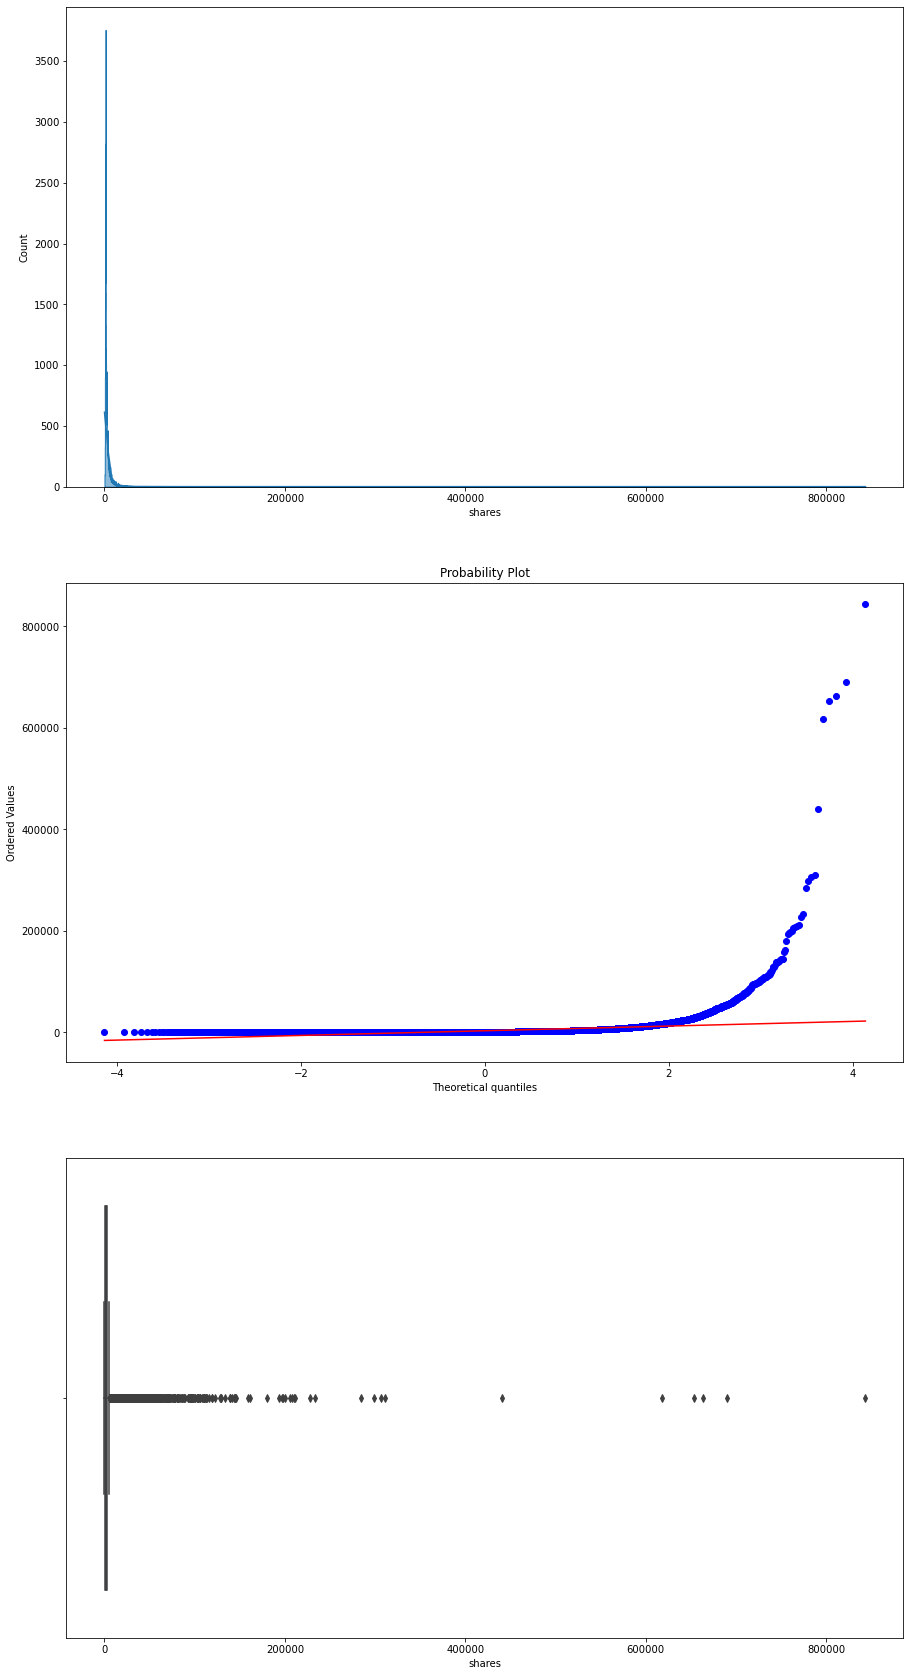

In [268]:
fig, ax = plt.subplots(3, 1, figsize=(15, 30))
sns.histplot(x=OnlineNewsPopularity.loc[:,'shares'], data=OnlineNewsPopularity, kde=True, element="step",ax=ax[0])
stats.probplot(OnlineNewsPopularity.loc[:,'shares'],plot=ax[1])
sns.boxplot(data=OnlineNewsPopularity , x = 'shares' ,ax=ax[2])

As we expected . . . 

In [269]:
#testin the first datasets with our models

In [270]:
simpleLinear(OnlineNewsPopularity)
ridge_regression(OnlineNewsPopularity,10)
lasso_regression(OnlineNewsPopularity,10)


Linear Model............................................

MAE : 60745495.04133717
MSE : 2.925520993211126e+19
RMSE : 5408808550.144039
r2_score : -384409419567.89185  -38440941956789.0

Ridge Model............................................

The train score for ridge model is 0.021939678798331474
The test score for ridge model is -0.3358153134312516
MAE : 3085.732251457612
MSE : 101661289.85285343
r2_score : -0.3358153134312516  -34.0

Lasso Model............................................

The train score for ls model is 0.02129886307728668
The test score for ls model is 0.024839810969102483
MAE : 3022.1138232510402
MSE : 74213883.93533753
r2_score : 0.024839810969102483  2.0


In [271]:
polynomial(2,OnlineNewsPopularity)


Polynomial Model........................................

MAE : 933833.1928336386
MSE : 6853294077431953.0
RMSE : 82784624.64390326
r2_score : -90051337.01992922  -9005133702.0


<a name="5.1.1"></a>
### In this case technique of using log(target) instead of target is very effective in reducing the workload on our models.

In [272]:
#OnlineNewsPopularity saved as orginal data
dataset = OnlineNewsPopularity.copy()

In [273]:
dataset['shares'] = np.log1p(OnlineNewsPopularity.shares)

In [274]:
dataset['shares'].describe()

count    39644.000000
mean         7.475692
std          0.929674
min          0.693147
25%          6.853299
50%          7.244942
75%          7.937732
max         13.645079
Name: shares, dtype: float64

<AxesSubplot:xlabel='shares'>

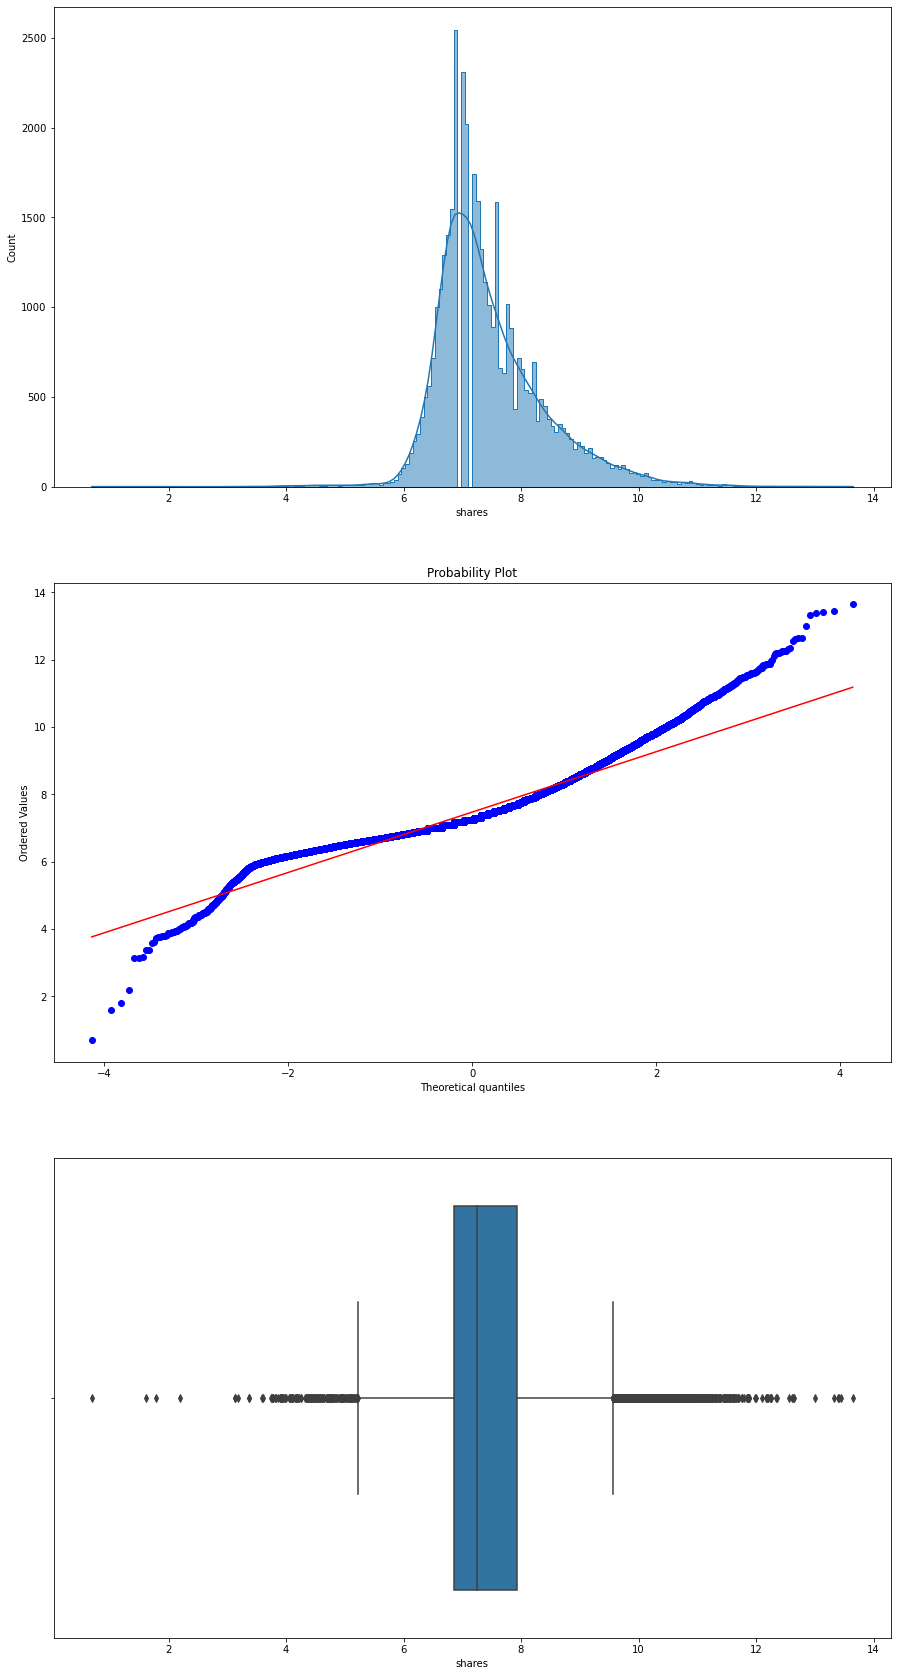

In [275]:
fig, ax = plt.subplots(3, 1, figsize=(15, 30))
sns.histplot(x=dataset.loc[:,'shares'], data=dataset, kde=True, element="step",ax=ax[0])
stats.probplot(dataset.loc[:,'shares'],plot=ax[1])
sns.boxplot(data=dataset , x = 'shares' ,ax=ax[2])

#### STD decrease well from 11626.950749 to 0.929674 so we observe normal distribution and this helps our future model(s) to predict better

In [276]:
# Plot correlation matrix for first dataset

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


<AxesSubplot:>

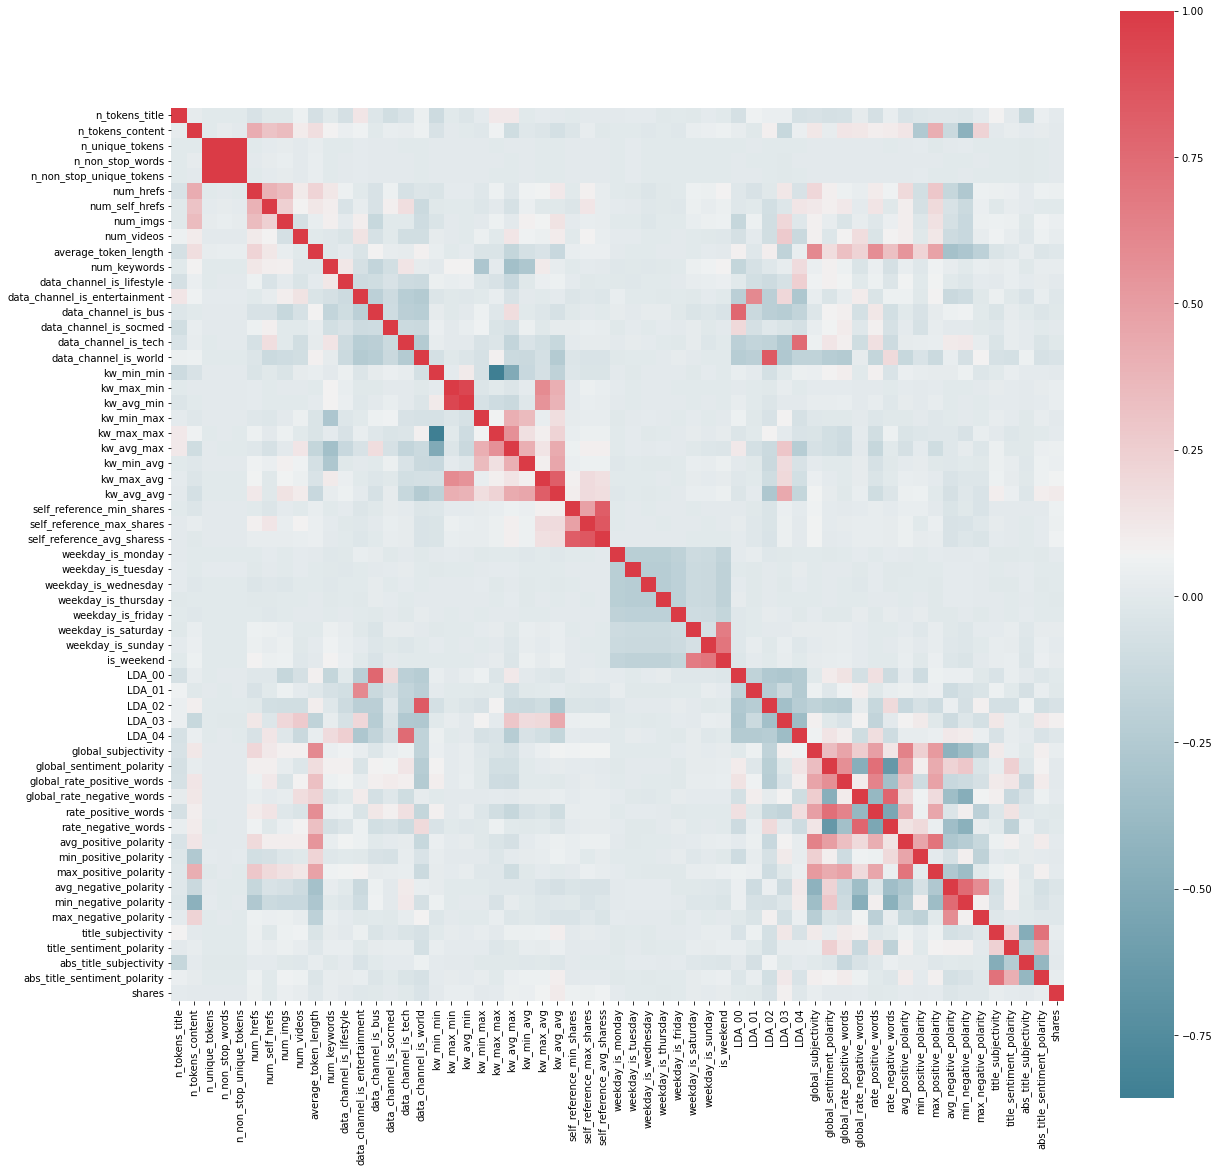

In [277]:
f, ax = plt.subplots(figsize=(20, 20))
corr1 = OnlineNewsPopularity.corr()
sns.heatmap(corr1, mask=np.zeros_like(corr1, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [278]:
print(abs(corr1["shares"]).sort_values(ascending=False))

shares                           1.000000
kw_avg_avg                       0.110413
LDA_03                           0.083771
kw_max_avg                       0.064306
LDA_02                           0.059163
self_reference_avg_sharess       0.057789
self_reference_min_shares        0.055958
data_channel_is_world            0.049497
self_reference_max_shares        0.047115
num_hrefs                        0.045404
kw_avg_max                       0.044686
kw_min_avg                       0.039551
num_imgs                         0.039388
avg_negative_polarity            0.032029
global_subjectivity              0.031604
kw_avg_min                       0.030406
kw_max_min                       0.030114
abs_title_sentiment_polarity     0.027135
num_videos                       0.023936
average_token_length             0.022007
title_subjectivity               0.021967
num_keywords                     0.021818
max_negative_polarity            0.019300
min_negative_polarity            0

In [279]:
# Now plot heatmap of correlation for "dataset"(with log shares as target)

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


<AxesSubplot:>

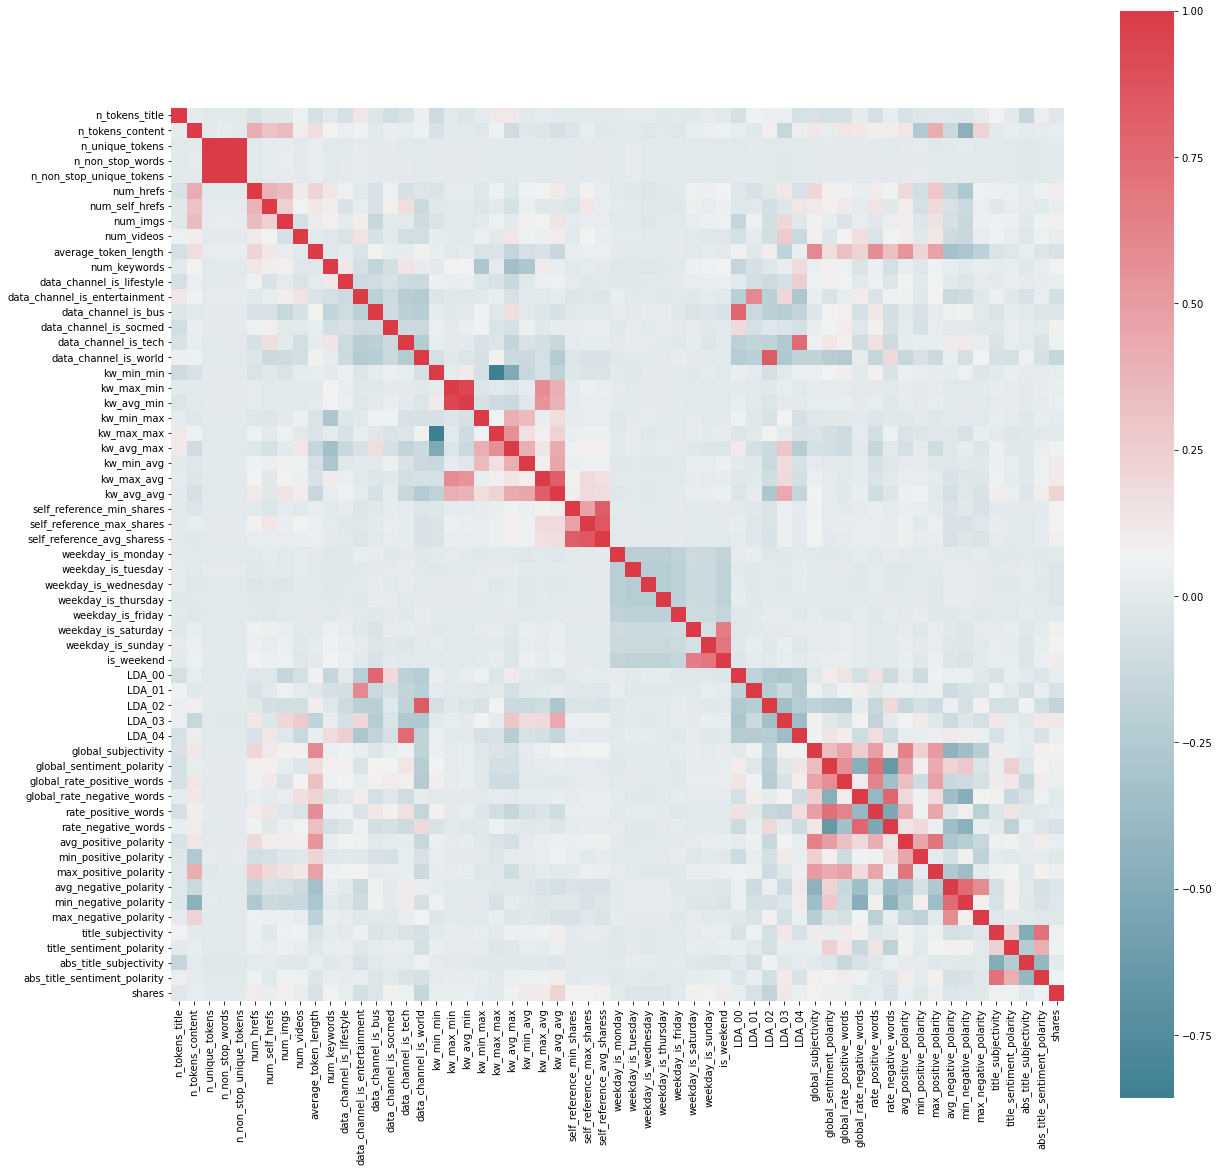

In [280]:
f, ax = plt.subplots(figsize=(20, 20))
corr2 = dataset.corr()
sns.heatmap(corr2, mask=np.zeros_like(corr2, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [281]:
print(abs(corr2["shares"]).sort_values(ascending=False))

shares                           1.000000
kw_avg_avg                       0.221822
LDA_02                           0.165076
data_channel_is_world            0.151685
LDA_03                           0.126037
is_weekend                       0.114391
kw_max_avg                       0.109343
kw_min_avg                       0.108850
num_hrefs                        0.105142
num_imgs                         0.091519
self_reference_avg_sharess       0.087238
data_channel_is_entertainment    0.082531
data_channel_is_socmed           0.081144
weekday_is_saturday              0.079158
self_reference_max_shares        0.077442
weekday_is_sunday                0.076969
global_subjectivity              0.075174
self_reference_min_shares        0.073374
num_keywords                     0.065945
kw_avg_max                       0.059678
abs_title_sentiment_polarity     0.059191
data_channel_is_tech             0.054539
LDA_01                           0.052992
title_subjectivity               0

In [282]:
dataset.describe()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
count    39644.000000      39644.000000     39644.000000      39644.000000   
mean        10.398749        546.514731         0.548216          0.996469   
std          2.114037        471.107508         3.520708          5.231231   
min          2.000000          0.000000         0.000000          0.000000   
25%          9.000000        246.000000         0.470870          1.000000   
50%         10.000000        409.000000         0.539226          1.000000   
75%         12.000000        716.000000         0.608696          1.000000   
max         23.000000       8474.000000       701.000000       1042.000000   

       n_non_stop_unique_tokens     num_hrefs  num_self_hrefs      num_imgs  \
count              39644.000000  39644.000000    39644.000000  39644.000000   
mean                   0.689175     10.883690        3.293638      4.544143   
std                    3.264816     11.332017        3.855141      8.309434   
min                    0.000000      0.000000        0.000000      0.000000   
25%                    0.625739      4.000000        1.000000      1.000000   
50%                    0.690476      8.000000        3.000000      1.000000   
75%                    0.754630     14.000000        4.000000      4.000000   
max                  650.000000    304.000000      116.000000    128.000000   

         num_videos  average_token_length  num_keywords  \
count  39644.000000          39644.000000  39644.000000   
mean       1.249874              4.548239      7.223767   
std        4.107855              0.844406      1.909130   
min        0.000000              0.000000      1.000000   
25%        0.000000              4.478404      6.000000   
50%        0.000000              4.664082      7.000000   
75%        1.000000              4.854839      9.000000   
max       91.000000              8.041534     10.000000   

       data_channel_is_lifestyle  data_channel_is_entertainment  \
count               39644.000000                   39644.000000   
mean                    0.052946                       0.178009   
std                     0.223929                       0.382525   
min                     0.000000                       0.000000   
25%                     0.000000                       0.000000   
50%                     0.000000                       0.000000   
75%                     0.000000                       0.000000   
max                     1.000000                       1.000000   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
count         39644.000000            39644.000000          39644.000000   
mean              0.157855                0.058597              0.185299   
std               0.364610                0.234871              0.388545   
min               0.000000                0.000000              0.000000   
25%               0.000000                0.000000              0.000000   
50%               0.000000                0.000000              0.000000   
75%               0.000000                0.000000              0.000000   
max               1.000000                1.000000              1.000000   

       data_channel_is_world    kw_min_min     kw_max_min    kw_avg_min  \
count           39644.000000  39644.000000   39644.000000  39644.000000   
mean                0.212567     26.106801    1153.951682    312.366967   
std                 0.409129     69.633215    3857.990877    620.783887   
min                 0.000000     -1.000000       0.000000     -1.000000   
25%                 0.000000     -1.000000     445.000000    141.750000   
50%                 0.000000     -1.000000     660.000000    235.500000   
75%                 0.000000      4.000000    1000.000000    357.000000   
max                 1.000000    377.000000  298400.000000  42827.857143   

          kw_min_max     kw_max_max     kw_avg_max    kw_min_avg  \
count   39644.000000   3964

In [283]:
simpleLinear(dataset)
ridge_regression(dataset,10)
lasso_regression(dataset,10)


Linear Model............................................

MAE : 241.14547330187565
MSE : 458621856.91970253
RMSE : 21415.458363521022
r2_score : -534333453.04510975  -53433345305.0

Ridge Model............................................

The train score for ridge model is 0.12816800456595312
The test score for ridge model is -0.07899986223920963
MAE : 0.6482271165314156
MSE : 0.9261125551657352
r2_score : -0.07899986223920963  -8.0

Lasso Model............................................

The train score for ls model is 0.08370922882846588
The test score for ls model is 0.07482549346511824
MAE : 0.6687128272738687
MSE : 0.7940832582157135
r2_score : 0.07482549346511824  7.000000000000001


In [284]:
polynomial(2,dataset)


Polynomial Model........................................

MAE : 617.5197701083538
MSE : 3017197304.5708523
RMSE : 54929.020604511534
r2_score : -3515291372.409636  -351529137241.0


# 

<a name="5.1.2"></a>
### Based on this if both of these features are equals to zero it's better to delete them

In [285]:
#save the previous dataaset
dataset_withContetn = dataset.copy()

2. n_tokens_title: Number of words in the title
3. n_tokens_content: Number of words in the content

In [286]:
num=dataset[dataset['n_tokens_content']==0].index
title =dataset[dataset['n_tokens_title']==0].index
print('number of news items with no words',num.size)
print('number of news items with no words in title',title.size)

number of news items with no words 1181
number of news items with no words in title 0


**well all of them have title but 1181 of them doesn't have any content well I get a sample of data and dropping to test the result**

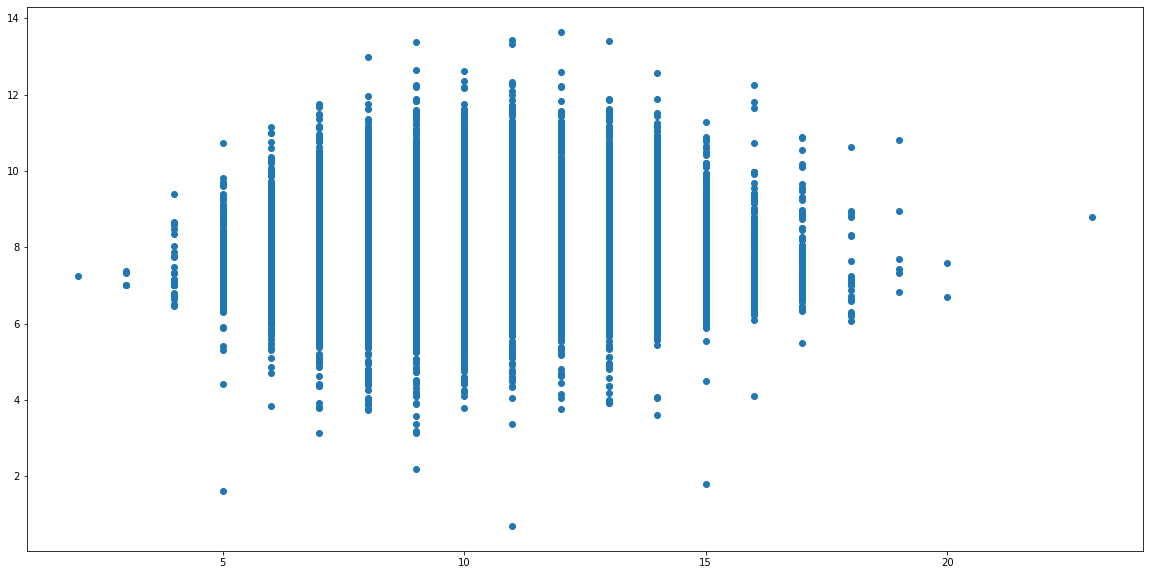

In [287]:
plt.figure(figsize=(20,10))
plt.scatter(dataset['n_tokens_title'] ,dataset['shares'] )

In [288]:
df = dataset[dataset['n_tokens_content'] == 0]

In [289]:
def correlation(feature):
    print(str(feature)  + " Spearman's  : " +str(stats.spearmanr(dataset[feature] , dataset['shares']).correlation))
    print(str(feature)  + " kendall  : " + str(stats.kendalltau(dataset[feature] , dataset['shares']).correlation)) 

In [290]:
correlation('n_tokens_title')

n_tokens_title Spearman's  : -0.040278201936068875
n_tokens_title kendall  : -0.028824350176953673


<AxesSubplot:>

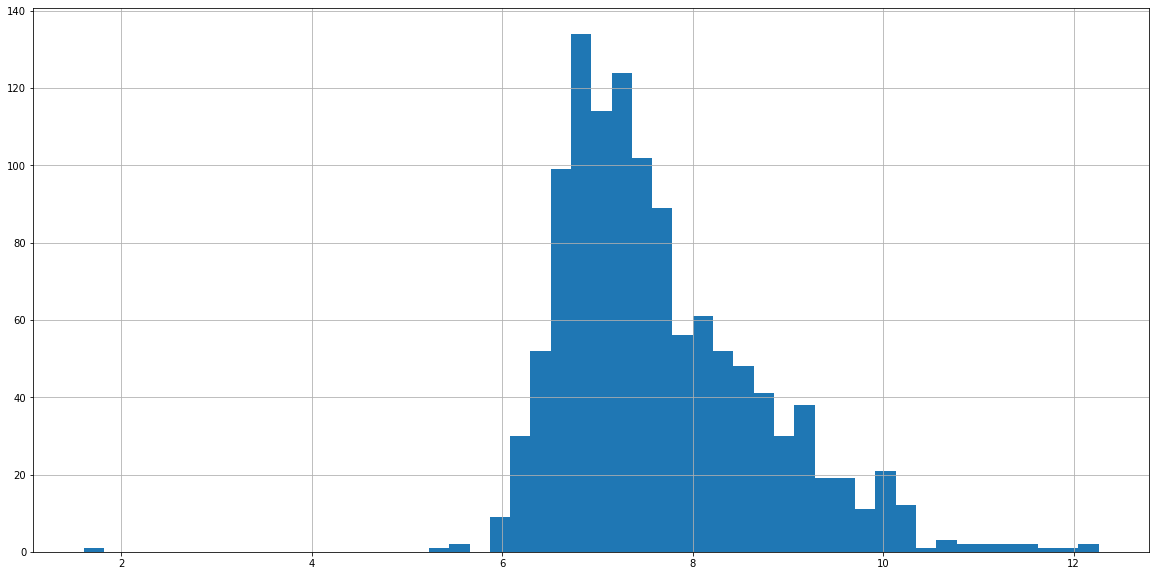

In [291]:
plt.figure(figsize=(20,10))
df['shares'].hist(bins=50)

In [292]:
# drop data with zero content

In [293]:
dataset = dataset[dataset['n_tokens_content'] != 0]

In [294]:
dataset.shape

(38463, 59)

In [295]:
simpleLinear(dataset)
ridge_regression(dataset,10)
lasso_regression(dataset,10)


Linear Model............................................

MAE : 0.6361076401522979
MSE : 0.7365150240927806
RMSE : 0.858204535115482
r2_score : 0.10971945662174454  11.0

Ridge Model............................................

The train score for ridge model is 0.133441885859363
The test score for ridge model is 0.10977360536822334
MAE : 0.6359250264231455
MSE : 0.7364702276905519
r2_score : 0.10977360536822334  11.0

Lasso Model............................................

The train score for ls model is 0.08638325687973347
The test score for ls model is 0.07190115273751874
MAE : 0.65851506373399
MSE : 0.7678015092390749
r2_score : 0.07190115273751874  7.000000000000001


In [296]:
polynomial(2,dataset)


Polynomial Model........................................

MAE : 0.6462615040902566
MSE : 0.880723515157697
RMSE : 0.9384687076070768
r2_score : -0.06459608289243524  -6.0


# 

<a name="5.1.3"></a>
### Categorical Feature Encoding

In [297]:
#save the previous dataset
dataset_Yhat = dataset.copy()

In [298]:
publishdayMerge=dataset[['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday', 
                      'weekday_is_thursday', 'weekday_is_friday','weekday_is_saturday' ,'weekday_is_sunday']]
temp_arr=[]
for r in list(range(publishdayMerge.shape[0])):
    for c in list(range(publishdayMerge.shape[1])):
        if ((c==0) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append(1)
        elif ((c==1) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append(2)
        elif ((c==2) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append(3)
        elif ((c==3) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append(4)
        elif ((c==4) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append(5)
        elif ((c==5) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append(6) 
        elif ((c==6) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append(7)

In [299]:
dataset.insert(loc=11, column='weekdays', value=temp_arr)

In [300]:
dataset.drop(labels=['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday', 
                      'weekday_is_thursday', 'weekday_is_friday','weekday_is_saturday' ,'weekday_is_sunday'], axis = 1, inplace=True)

In [301]:
DataChannelMerge=dataset[['data_channel_is_lifestyle','data_channel_is_entertainment' ,'data_channel_is_bus',
                        'data_channel_is_socmed' ,'data_channel_is_tech','data_channel_is_world' ]]
#logic to merge data channel
DataChannel_arr=[]
for r in list(range(DataChannelMerge.shape[0])):
    if (((DataChannelMerge.iloc[r,0])==0) and ((DataChannelMerge.iloc[r,1])==0) and ((DataChannelMerge.iloc[r,2])==0) and ((DataChannelMerge.iloc[r,3])==0) and ((DataChannelMerge.iloc[r,4])==0) and ((DataChannelMerge.iloc[r,5])==0)):
        DataChannel_arr.append(0)
    for c in list(range(DataChannelMerge.shape[1])):
        if ((c==0) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append(1)
        elif ((c==1) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append(2)
        elif ((c==2) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append(3)
        elif ((c==3) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append(4)
        elif ((c==4) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append(5)
        elif ((c==5) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append(6)

In [302]:
dataset.insert(loc=12, column='data_channel', value=DataChannel_arr)

In [303]:
dataset.drop(labels=['data_channel_is_lifestyle','data_channel_is_entertainment' ,'data_channel_is_bus',
                        'data_channel_is_socmed' ,'data_channel_is_tech','data_channel_is_world' ], axis = 1, inplace=True)

<AxesSubplot:xlabel='weekdays', ylabel='shares'>

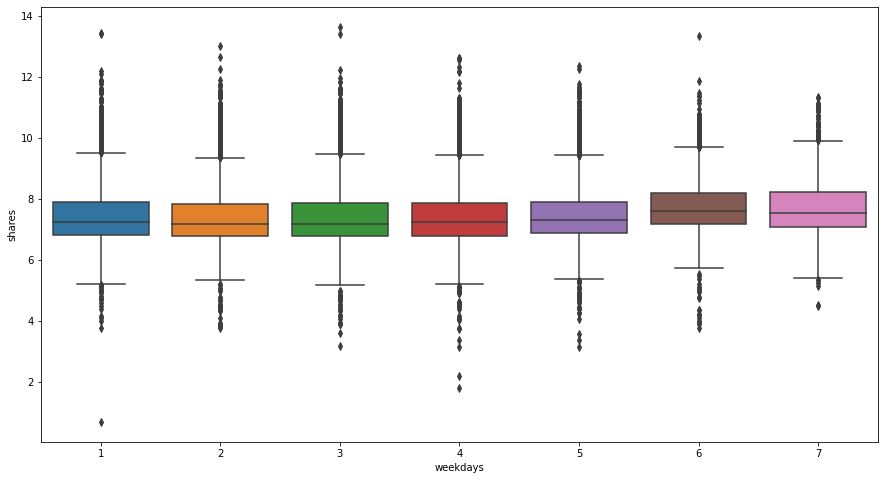

In [304]:
plt.figure(figsize=(15,8))
sns.boxplot(data=dataset , x = 'weekdays' , y = 'shares')

In [305]:
dataset

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                12.0             219.0         0.663594               1.0   
1                 9.0             255.0         0.604743               1.0   
2                 9.0             211.0         0.575130               1.0   
3                 9.0             531.0         0.503788               1.0   
4                13.0            1072.0         0.415646               1.0   
...               ...               ...              ...               ...   
39639            11.0             346.0         0.529052               1.0   
39640            12.0             328.0         0.696296               1.0   
39641            10.0             442.0         0.516355               1.0   
39642             6.0             682.0         0.539493               1.0   
39643            10.0             157.0         0.701987               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
0                      0.815385        4.0             2.0       1.0   
1                      0.791946        3.0             1.0       1.0   
2                      0.663866        3.0             1.0       1.0   
3                      0.665635        9.0             0.0       1.0   
4                      0.540890       19.0            19.0      20.0   
...                         ...        ...             ...       ...   
39639                  0.684783        9.0             7.0       1.0   
39640                  0.885057        9.0             7.0       3.0   
39641                  0.644128       24.0             1.0      12.0   
39642                  0.692661       10.0             1.0       1.0   
39643                  0.846154        1.0             1.0       0.0   

       num_videos  average_token_length  num_keywords  weekdays  data_channel  \
0             0.0              4.680365           5.0         1             2   
1             0.0              4.913725           4.0         1             3   
2             0.0              4.393365           6.0         1             3   
3             0.0              4.404896           7.0         1             2   
4             0.0              4.682836           7.0         1             5   
...           ...                   ...           ...       ...           ...   
39639         1.0              4.523121           8.0         3             5   
39640        48.0              4.405488           7.0         3             4   
39641         1.0              5.076923           8.0         3             0   
39642         0.0              4.975073           5.0         3             6   
39643         2.0              4.471338           4.0         3             2   

       kw_min_min  kw_max_min  kw_avg_min  kw_min_max  kw_max_max  \
0             0.0         0.0       0.000         0.0         0.0   
1             0.0         0.0       0.000         0.0         0.0   
2             0.0         0.0       0.000         0.0         0.0   
3             0.0         0.0       0.000         0.0         0.0   
4             0.0         0.0       0.000         0.0         0.0   
...           ...         ...         ...         ...         ...   
39639        -1.0       671.0     173.125     26900.0    843300.0   
39640        -1.0       616.0     184.000      6500.0    843300.0   
39641        -1.0       691.0     168.250      6200.0    843300.0   
39642        -1.0         0.0      -1.000         0.0    843300.0   
39643        -1.0        97.0      23.500    205600.0    843300.0   

          kw_avg_max   kw_min_avg   kw_max_avg   kw_avg_avg  \
0           0.000000     0.000000     0.000000     0.000000   
1           0.000000     0.000000     0.000000     0.000000   
2           0.000000     0.000000     0.000000     0.000000   
3           0.000000     0.000000     0.000000     0.000000   
4           0.000000     0.000000     0.000000     0.000000   
...              ...     

#### convert weekdays and the subject of content to two separate columns. now we have 48 columns

In [306]:
simpleLinear(dataset)
ridge_regression(dataset,10)
lasso_regression(dataset,10)


Linear Model............................................

MAE : 0.6405895162738783
MSE : 0.7416601385526579
RMSE : 0.8611969220524757
r2_score : 0.10350017371882592  10.0

Ridge Model............................................

The train score for ridge model is 0.12314944020578034
The test score for ridge model is 0.10341063719023047
MAE : 0.6406756249817277
MSE : 0.7417342107077849
r2_score : 0.10341063719023047  10.0

Lasso Model............................................

The train score for ls model is 0.08638325687973347
The test score for ls model is 0.07190115273751874
MAE : 0.65851506373399
MSE : 0.7678015092390749
r2_score : 0.07190115273751874  7.000000000000001


# 

<a name="5.1.4"></a>
### Multicollinearity

multicollinearity is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy

In [307]:
#save the previous dataset 
dataset_Multicollinearity = dataset.copy()

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


<AxesSubplot:>

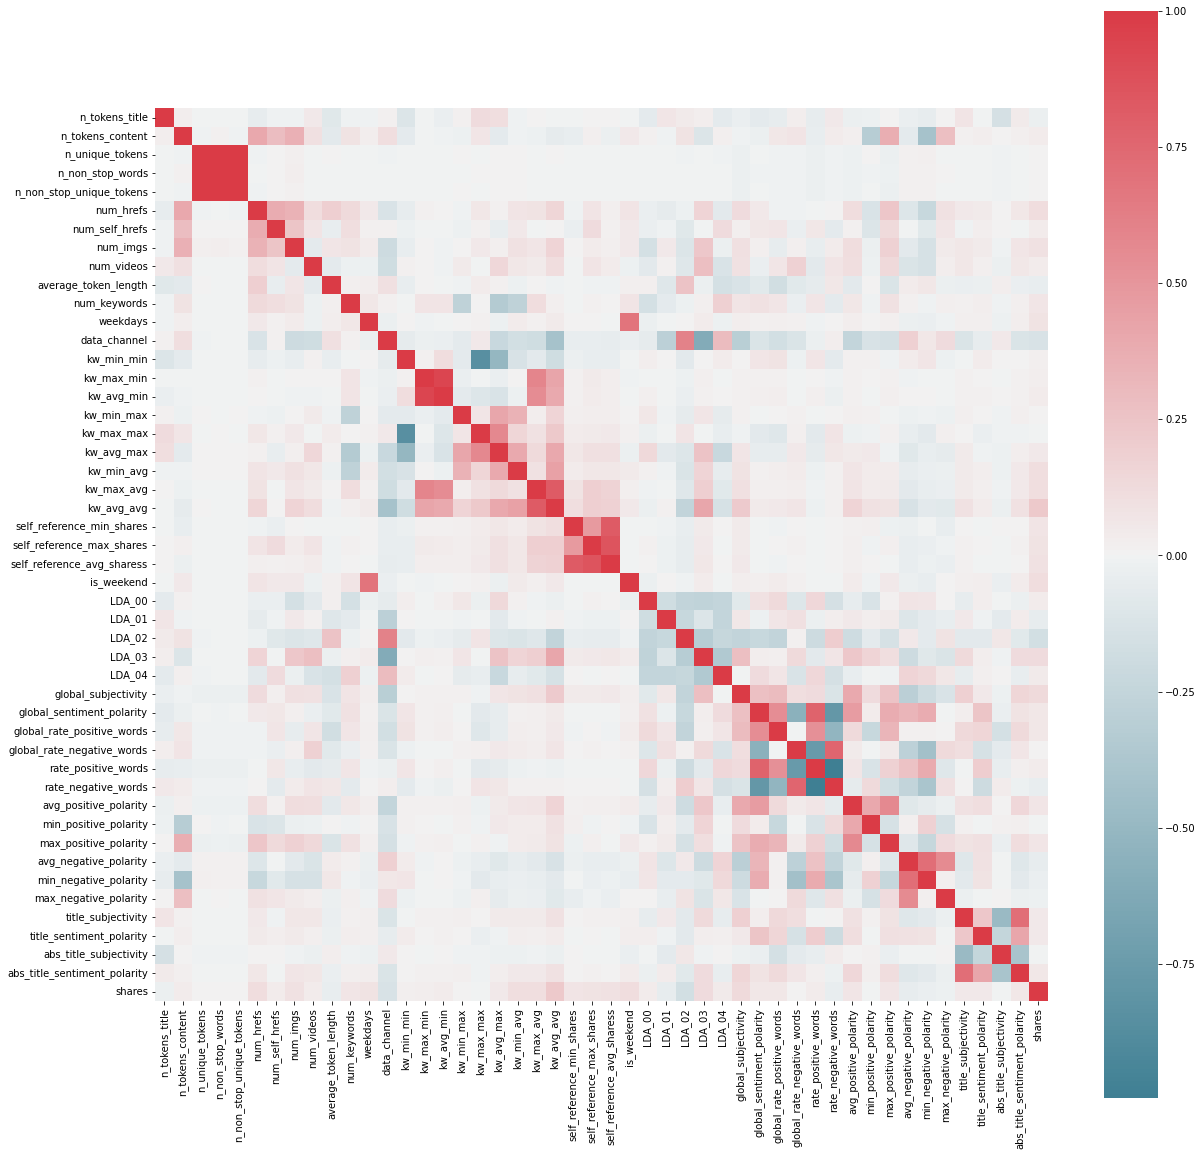

In [308]:
f, ax = plt.subplots(figsize=(20, 20))
corr = dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [309]:
def correlation(dataset):
    corr = dataset.corr()
    spearmanDataset = {}
    kendallDataset = {}
    feature = dataset.columns
    corrMatrix = abs(corr['shares'][dataset.columns]).values
    for col in dataset.columns:
        spearmanDataset[col] = stats.spearmanr(dataset[col] , dataset['shares']).correlation
        kendallDataset[col] = stats.kendalltau(dataset[col] , dataset['shares']).correlation
        
    for ele in spearmanDataset:
        spearmanDataset[ele] = abs(spearmanDataset[ele])
    for ele in kendallDataset:
        kendallDataset[ele] = abs(kendallDataset[ele])
        
    data = {'feature': feature,
                'corrMatrix': corrMatrix,
                'spearmanCorr':  spearmanDataset.values(),
                'kendallCorr':kendallDataset.values(),
            
        }
    n = len(dataset.columns)
    output = [i for i in range(1, n+1)]
    df = pd.DataFrame(data,index=output)
    print(df)

In [310]:
correlation(dataset)

                         feature  corrMatrix  spearmanCorr  kendallCorr
1                 n_tokens_title    0.022828      0.042969     0.030741
2               n_tokens_content    0.033145      0.018643     0.012796
3                n_unique_tokens    0.006029      0.039568     0.027031
4               n_non_stop_words    0.006687      0.018603     0.012727
5       n_non_stop_unique_tokens    0.005081      0.067060     0.045443
6                      num_hrefs    0.114829      0.104048     0.072051
7                 num_self_hrefs    0.035337      0.046500     0.033216
8                       num_imgs    0.094330      0.089893     0.067333
9                     num_videos    0.033503      0.047208     0.036976
10          average_token_length    0.040344      0.052761     0.035444
11                  num_keywords    0.066324      0.072592     0.052202
12                      weekdays    0.084397      0.105091     0.076278
13                  data_channel    0.132628      0.109956     0

In [311]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = dataset.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(dataset.values, i)
                          for i in range(len(dataset.columns))]
  
print(vif_data.sort_values(by=['VIF']))

                         feature           VIF
0                 n_tokens_title      1.088424
47                        shares      1.136131
8                     num_videos      1.257560
44      title_sentiment_polarity      1.329810
6                 num_self_hrefs      1.354533
16                    kw_min_max      1.361544
9           average_token_length      1.365337
45        abs_title_subjectivity      1.423067
10                  num_keywords      1.469948
31           global_subjectivity      1.641137
5                      num_hrefs      1.681461
7                       num_imgs      1.712469
38         min_positive_polarity      1.879509
11                      weekdays      1.894946
25                    is_weekend      1.920794
19                    kw_min_avg      2.178924
43            title_subjectivity      2.368668
46  abs_title_sentiment_polarity      2.406149
39         max_positive_polarity      2.437638
42         max_negative_polarity      2.867294
1            

In [312]:
correlation = dataset.corr().abs()
upper = correlation.where(np.triu(np.ones(correlation.shape),k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column]>0.95)]

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [313]:
to_drop

['n_non_stop_words', 'n_non_stop_unique_tokens', 'rate_negative_words']

In [314]:
to_drop.remove('n_non_stop_unique_tokens')

In [315]:
dataset.drop('n_non_stop_unique_tokens', inplace=True, axis=1)

In [316]:
vif_data = pd.DataFrame()
vif_data["feature"] = dataset.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(dataset.values, i)
                          for i in range(len(dataset.columns))]
  
print(vif_data.sort_values(by=['VIF']))

                         feature          VIF
0                 n_tokens_title     1.088321
46                        shares     1.135804
7                     num_videos     1.246804
8           average_token_length     1.257907
43      title_sentiment_polarity     1.329754
5                 num_self_hrefs     1.354262
15                    kw_min_max     1.361454
44        abs_title_subjectivity     1.422433
9                   num_keywords     1.469479
6                       num_imgs     1.534202
30           global_subjectivity     1.640890
4                      num_hrefs     1.659792
37         min_positive_polarity     1.846223
10                      weekdays     1.894857
24                    is_weekend     1.920740
18                    kw_min_avg     2.177784
42            title_subjectivity     2.368638
45  abs_title_sentiment_polarity     2.405452
38         max_positive_polarity     2.420248
41         max_negative_polarity     2.846573
1               n_tokens_content  

In [317]:
correlation = dataset.corr().abs()
upper = correlation.where(np.triu(np.ones(correlation.shape),k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column]>0.95)]

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [318]:
to_drop

['n_non_stop_words', 'rate_negative_words']

In [319]:
dataset.drop('n_non_stop_words', inplace=True, axis=1)

In [320]:
dataset.drop('rate_negative_words', inplace=True, axis=1)

In [321]:
vif_data = pd.DataFrame()
vif_data["feature"] = dataset.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(dataset.values, i)
                          for i in range(len(dataset.columns))]
  
print(vif_data.sort_values(by=['VIF']))

                         feature         VIF
2                n_unique_tokens    1.039069
6                     num_videos    1.357766
41      title_sentiment_polarity    1.424796
14                    kw_min_max    1.434464
5                       num_imgs    1.931889
23                    is_weekend    2.209364
4                 num_self_hrefs    2.394481
3                      num_hrefs    3.283318
43  abs_title_sentiment_polarity    3.539454
40            title_subjectivity    4.149607
17                    kw_min_avg    4.259591
11                    kw_min_min    4.363223
1               n_tokens_content    5.262197
35         min_positive_polarity    5.371556
42        abs_title_subjectivity    6.111351
39         max_negative_polarity    6.677017
20     self_reference_min_shares    6.880044
21     self_reference_max_shares    8.940709
9                       weekdays    8.975521
10                  data_channel   11.622857
12                    kw_max_min   12.108401
18        

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


<AxesSubplot:>

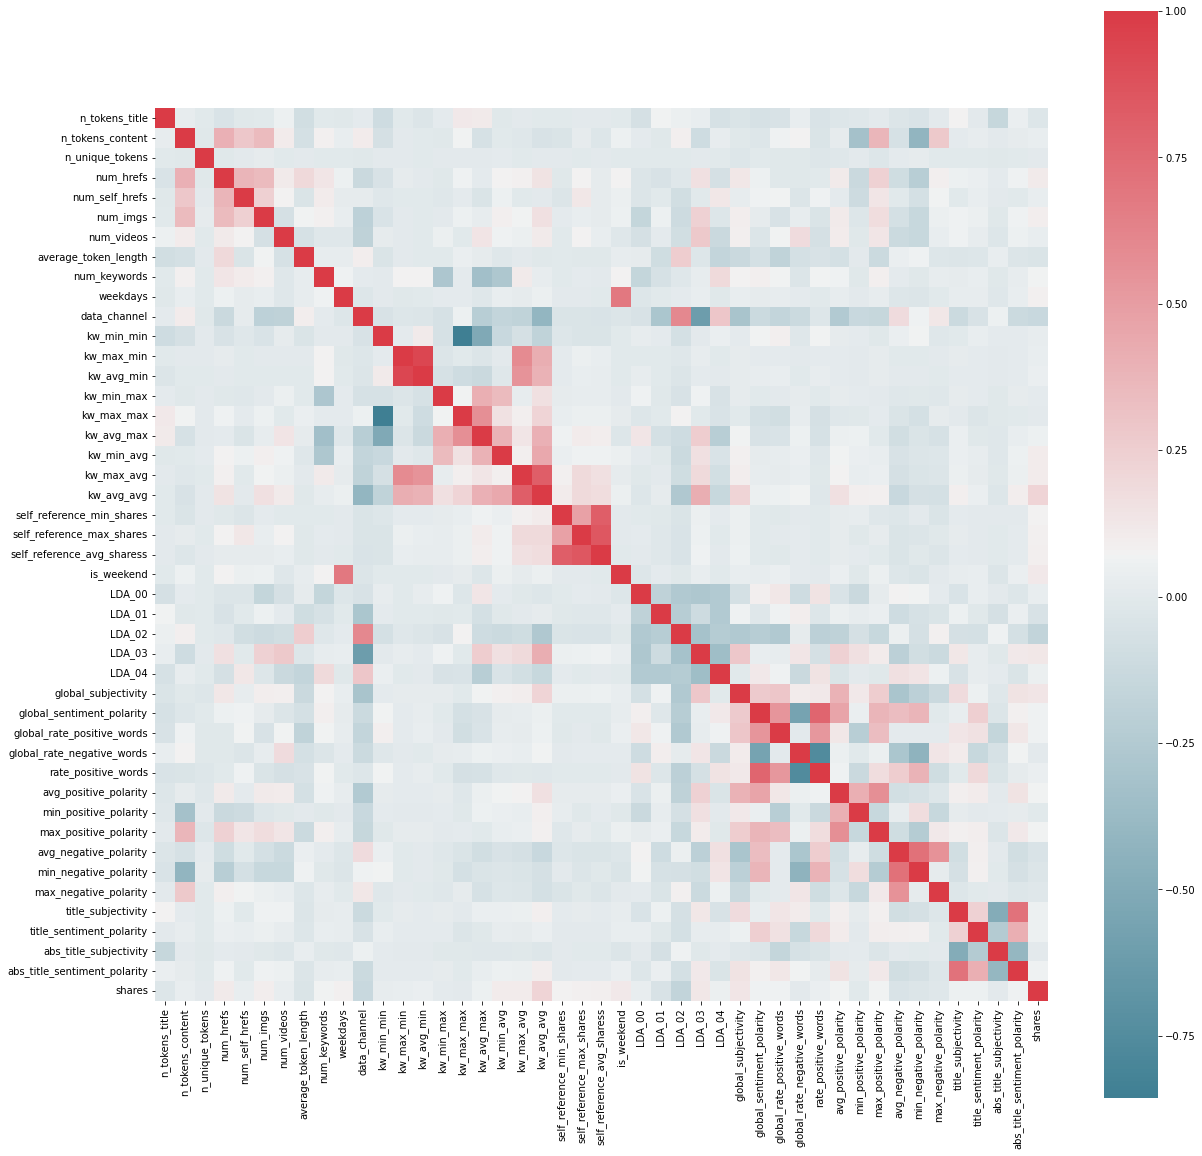

In [322]:
f, ax = plt.subplots(figsize=(20, 20))
corr = dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [323]:
dataset

n_tokens_title  n_tokens_content  n_unique_tokens  num_hrefs  \
0                12.0             219.0         0.663594        4.0   
1                 9.0             255.0         0.604743        3.0   
2                 9.0             211.0         0.575130        3.0   
3                 9.0             531.0         0.503788        9.0   
4                13.0            1072.0         0.415646       19.0   
...               ...               ...              ...        ...   
39639            11.0             346.0         0.529052        9.0   
39640            12.0             328.0         0.696296        9.0   
39641            10.0             442.0         0.516355       24.0   
39642             6.0             682.0         0.539493       10.0   
39643            10.0             157.0         0.701987        1.0   

       num_self_hrefs  num_imgs  num_videos  average_token_length  \
0                 2.0       1.0         0.0              4.680365   
1                 1.0       1.0         0.0              4.913725   
2                 1.0       1.0         0.0              4.393365   
3                 0.0       1.0         0.0              4.404896   
4                19.0      20.0         0.0              4.682836   
...               ...       ...         ...                   ...   
39639             7.0       1.0         1.0              4.523121   
39640             7.0       3.0        48.0              4.405488   
39641             1.0      12.0         1.0              5.076923   
39642             1.0       1.0         0.0              4.975073   
39643             1.0       0.0         2.0              4.471338   

       num_keywords  weekdays  data_channel  kw_min_min  kw_max_min  \
0               5.0         1             2         0.0         0.0   
1               4.0         1             3         0.0         0.0   
2               6.0         1             3         0.0         0.0   
3               7.0         1             2         0.0         0.0   
4               7.0         1             5         0.0         0.0   
...             ...       ...           ...         ...         ...   
39639           8.0         3             5        -1.0       671.0   
39640           7.0         3             4        -1.0       616.0   
39641           8.0         3             0        -1.0       691.0   
39642           5.0         3             6        -1.0         0.0   
39643           4.0         3             2        -1.0        97.0   

       kw_avg_min  kw_min_max  kw_max_max     kw_avg_max   kw_min_avg  \
0           0.000         0.0         0.0       0.000000     0.000000   
1           0.000         0.0         0.0       0.000000     0.000000   
2           0.000         0.0         0.0       0.000000     0.000000   
3           0.000         0.0         0.0       0.000000     0.000000   
4           0.000         0.0         0.0       0.000000     0.000000   
...           ...         ...         ...            ...          ...   
39639     173.125     26900.0    843300.0  374962.500000  2514.742857   
39640     184.000      6500.0    843300.0  192985.714286  1664.267857   
39641     168.250      6200.0    843300.0  295850.000000  1753.882353   
39642      -1.000         0.0    843300.0  254600.000000     0.000000   
39643      23.500    205600.0    843300.0  366200.000000  3035.080555   

        kw_max_avg   kw_avg_avg  self_reference_min_shares  \
0         0.000000     0.000000                      496.0   
1         0.000000     0.000000                        0.0   
2         0.000000     0.000000                      918.0   
3         0.000000     0.000000                        0.0   
4         0.000000     0.000000                      545.0   
...            ...          ...                        ...   
39639  4004.342857  3031.115764                    11400.0   
39640  5470.168651  3411.660830                     2100.0   
39641  6880.687034  4206.439195      

In [324]:
#dropped three other features in this part 'n_non_stop_words', 'n_non_stop_unique_tokens', 'rate_negative_words'

In [325]:
simpleLinear(dataset)
ridge_regression(dataset,10)
lasso_regression(dataset,10)


Linear Model............................................

MAE : 0.6406746917318741
MSE : 0.7416572118386511
RMSE : 0.8611952228378018
r2_score : 0.10350371145594062  10.0

Ridge Model............................................

The train score for ridge model is 0.12280559453490081
The test score for ridge model is 0.10345919339787413
MAE : 0.6407935748647433
MSE : 0.7416940409245536
r2_score : 0.10345919339787413  10.0

Lasso Model............................................

The train score for ls model is 0.08638325687973347
The test score for ls model is 0.07190115273751874
MAE : 0.65851506373399
MSE : 0.7678015092390749
r2_score : 0.07190115273751874  7.000000000000001


# 

# 

<a name="5.4"></a>
## 3.Use various scaling methods and report their effects.
([Exercise 12](#5))<br>
Below are the few ways we can do feature scaling.
1) Min Max Scaler <br>
2) Standard Scaler <br>
3) Max Abs Scaler <br>
4) Robust Scaler<br>

In [326]:
dataset_RAW  = dataset.copy()

But first we should checkout distributions and try to fix outliers

<a name="5.4.0"></a>
### Methods

**using boxplot and histogram and describe for each feature**

In [327]:
def featureAnalysis(feature,dataset):
    a = dataset.describe()
    b = a[feature].to_frame().T
    fig, ax = plt.subplots(3, 1, figsize=(20, 18))
    sns.histplot(x=dataset[feature], data=dataset, kde=True, element="step",ax=ax[0])
    sns.boxplot(data=dataset , x = feature ,ax=ax[1])
    plt.scatter(dataset[feature] ,dataset['shares'])
    return(b)

**spearman,kendall and correlation matrix values**

In [328]:
def correlation(dataset,feat):
    corr = dataset.corr()
    spearmanDataset = {}
    kendallDataset = {}
    feature = dataset.columns
    corrMatrix = abs(corr['shares'][dataset.columns]).values
    for col in dataset.columns:
        spearmanDataset[col] = stats.spearmanr(dataset[col] , dataset['shares']).correlation
        kendallDataset[col] = stats.kendalltau(dataset[col] , dataset['shares']).correlation
        
    for ele in spearmanDataset:
        spearmanDataset[ele] = abs(spearmanDataset[ele])
    for ele in kendallDataset:
        kendallDataset[ele] = abs(kendallDataset[ele])
        
    data = {'feature': feature,
                'corrMatrix': corrMatrix,
                'spearmanCorr':  spearmanDataset.values(),
                'kendallCorr':kendallDataset.values(),
            
        }
    n = len(dataset.columns)
    output = [i for i in range(1, n+1)]
    df = pd.DataFrame(data,index=output)
    if feat =='all' :
        print(df)
    else:
        print(df[df['feature'] == feat])

#### detect outliers of each feature to choose the scaler method(using IQR method for detection)

In [329]:
def outlierDetection(dataset):
    dicto = {}
    num_cols = dataset.select_dtypes(['int64','float64']).columns
    for column in num_cols:    
        q1 = dataset[column].quantile(0.25)    # First Quartile
        q3 = dataset[column].quantile(0.75)    # Third Quartile
        IQR = q3 - q1                            # Inter Quartile Range
        llimit = q1 - 1.5*IQR                       # Lower Limit
        ulimit = q3 + 1.5*IQR                        # Upper Limit
        outliers = dataset[(dataset[column] < llimit) | (dataset[column] > ulimit)]
        dicto[column] = len(outliers)
    sorted_dicto = sorted(dicto.items(), key=lambda x:x[1])
    return (sorted_dicto)

**Binnig method(sampling from median)**

In [330]:
def binningFeature(feature,dataset,bins):
    x_data = np.arange(0, len(dataset))
    y_data = dataset[feature]
    x_bins,bin_edges, misc = binned_statistic(y_data,x_data, statistic="median", bins=bins)
    bin_intervals = pd.IntervalIndex.from_arrays(bin_edges[:-1], bin_edges[1:])
    def set_to_median(x, bin_intervals):
        for interval in bin_intervals:
            if x in interval:
                return interval.mid
        for interval in bin_intervals:
            if x in interval:
                return interval.mid
    dataset[feature] = dataset[feature].apply(lambda x: set_to_median(x, bin_intervals))
    

<a name="5.4.1"></a>
### Checking our dataset's features distribution and outliers

In [331]:
correlation(dataset_RAW,'all')

                         feature  corrMatrix  spearmanCorr  kendallCorr
1                 n_tokens_title    0.022828      0.042969     0.030741
2               n_tokens_content    0.033145      0.018643     0.012796
3                n_unique_tokens    0.006029      0.039568     0.027031
4                      num_hrefs    0.114829      0.104048     0.072051
5                 num_self_hrefs    0.035337      0.046500     0.033216
6                       num_imgs    0.094330      0.089893     0.067333
7                     num_videos    0.033503      0.047208     0.036976
8           average_token_length    0.040344      0.052761     0.035444
9                   num_keywords    0.066324      0.072592     0.052202
10                      weekdays    0.084397      0.105091     0.076278
11                  data_channel    0.132628      0.109956     0.080299
12                    kw_min_min    0.024643      0.006278     0.004490
13                    kw_max_min    0.032034      0.092275     0

In [332]:
outlierDetection(dataset)

[('weekdays', 0),
 ('data_channel', 0),
 ('kw_min_avg', 0),
 ('LDA_04', 0),
 ('max_positive_polarity', 0),
 ('min_negative_polarity', 0),
 ('title_subjectivity', 0),
 ('abs_title_subjectivity', 0),
 ('num_keywords', 50),
 ('n_tokens_title', 155),
 ('n_unique_tokens', 490),
 ('rate_positive_words', 519),
 ('global_rate_positive_words', 520),
 ('average_token_length', 552),
 ('global_subjectivity', 864),
 ('kw_avg_max', 879),
 ('avg_negative_polarity', 879),
 ('global_sentiment_polarity', 944),
 ('avg_positive_polarity', 1042),
 ('global_rate_negative_words', 1358),
 ('abs_title_sentiment_polarity', 1589),
 ('shares', 1599),
 ('kw_avg_avg', 1642),
 ('n_tokens_content', 1875),
 ('kw_avg_min', 2009),
 ('num_self_hrefs', 2090),
 ('kw_max_avg', 2352),
 ('max_negative_polarity', 2454),
 ('num_hrefs', 2636),
 ('num_videos', 2939),
 ('LDA_03', 3029),
 ('min_positive_polarity', 3147),
 ('LDA_02', 3441),
 ('kw_max_min', 3566),
 ('self_reference_max_shares', 4094),
 ('self_reference_avg_sharess', 

array([[<AxesSubplot:title={'center':'n_tokens_title'}>,
        <AxesSubplot:title={'center':'n_tokens_content'}>,
        <AxesSubplot:title={'center':'n_unique_tokens'}>,
        <AxesSubplot:title={'center':'num_hrefs'}>,
        <AxesSubplot:title={'center':'num_self_hrefs'}>,
        <AxesSubplot:title={'center':'num_imgs'}>,
        <AxesSubplot:title={'center':'num_videos'}>],
       [<AxesSubplot:title={'center':'average_token_length'}>,
        <AxesSubplot:title={'center':'num_keywords'}>,
        <AxesSubplot:title={'center':'weekdays'}>,
        <AxesSubplot:title={'center':'data_channel'}>,
        <AxesSubplot:title={'center':'kw_min_min'}>,
        <AxesSubplot:title={'center':'kw_max_min'}>,
        <AxesSubplot:title={'center':'kw_avg_min'}>],
       [<AxesSubplot:title={'center':'kw_min_max'}>,
        <AxesSubplot:title={'center':'kw_max_max'}>,
        <AxesSubplot:title={'center':'kw_avg_max'}>,
        <AxesSubplot:title={'center':'kw_min_avg'}>,
        <AxesSub

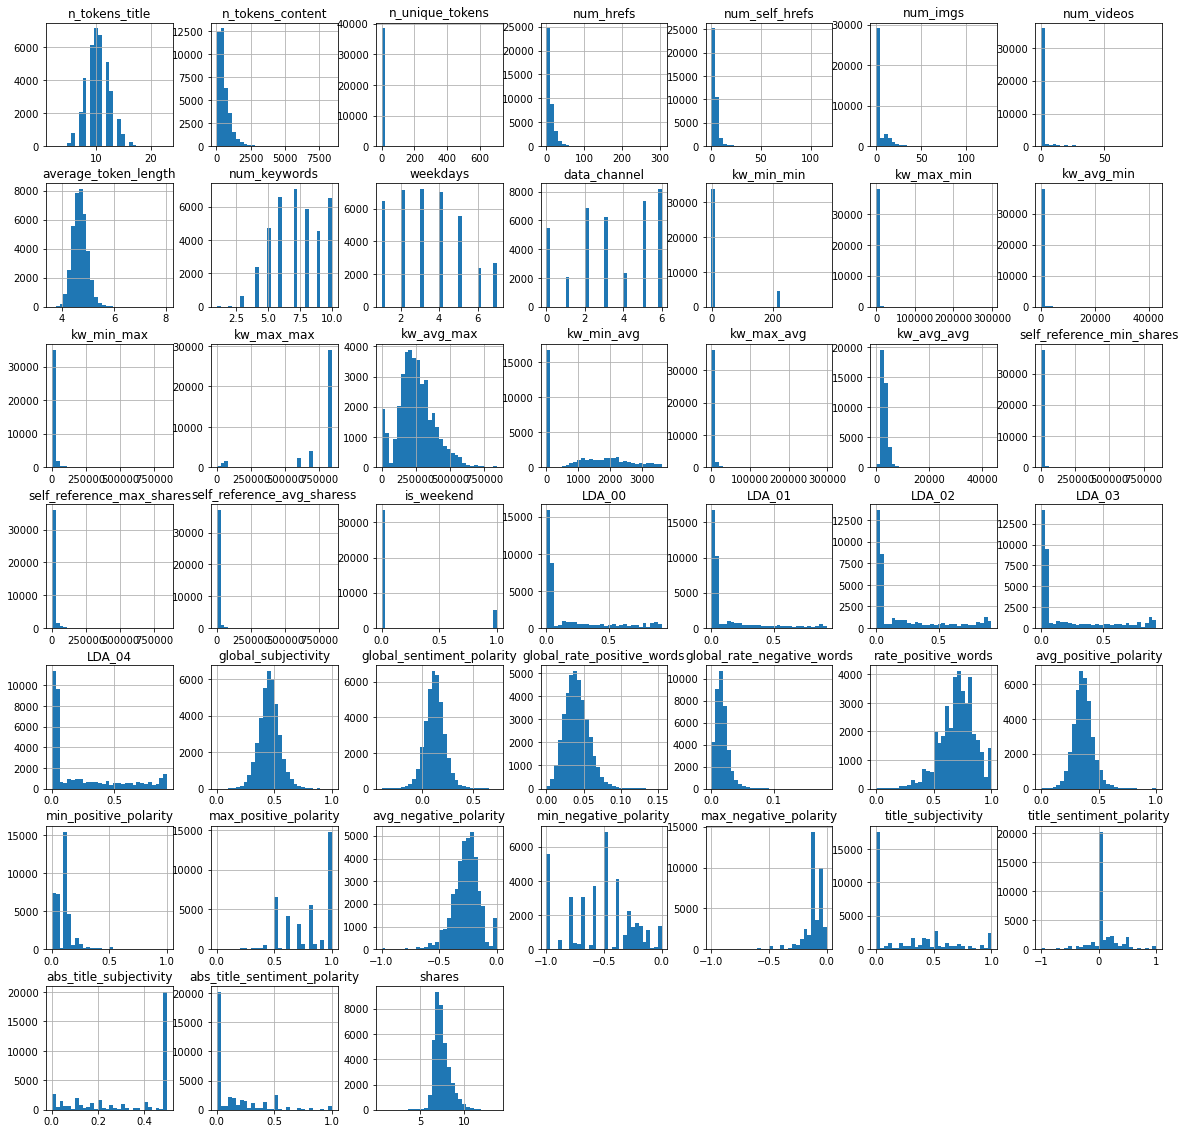

In [333]:
dataset.hist(bins=30,figsize=(20,20))

In [334]:
dataset

n_tokens_title  n_tokens_content  n_unique_tokens  num_hrefs  \
0                12.0             219.0         0.663594        4.0   
1                 9.0             255.0         0.604743        3.0   
2                 9.0             211.0         0.575130        3.0   
3                 9.0             531.0         0.503788        9.0   
4                13.0            1072.0         0.415646       19.0   
...               ...               ...              ...        ...   
39639            11.0             346.0         0.529052        9.0   
39640            12.0             328.0         0.696296        9.0   
39641            10.0             442.0         0.516355       24.0   
39642             6.0             682.0         0.539493       10.0   
39643            10.0             157.0         0.701987        1.0   

       num_self_hrefs  num_imgs  num_videos  average_token_length  \
0                 2.0       1.0         0.0              4.680365   
1                 1.0       1.0         0.0              4.913725   
2                 1.0       1.0         0.0              4.393365   
3                 0.0       1.0         0.0              4.404896   
4                19.0      20.0         0.0              4.682836   
...               ...       ...         ...                   ...   
39639             7.0       1.0         1.0              4.523121   
39640             7.0       3.0        48.0              4.405488   
39641             1.0      12.0         1.0              5.076923   
39642             1.0       1.0         0.0              4.975073   
39643             1.0       0.0         2.0              4.471338   

       num_keywords  weekdays  data_channel  kw_min_min  kw_max_min  \
0               5.0         1             2         0.0         0.0   
1               4.0         1             3         0.0         0.0   
2               6.0         1             3         0.0         0.0   
3               7.0         1             2         0.0         0.0   
4               7.0         1             5         0.0         0.0   
...             ...       ...           ...         ...         ...   
39639           8.0         3             5        -1.0       671.0   
39640           7.0         3             4        -1.0       616.0   
39641           8.0         3             0        -1.0       691.0   
39642           5.0         3             6        -1.0         0.0   
39643           4.0         3             2        -1.0        97.0   

       kw_avg_min  kw_min_max  kw_max_max     kw_avg_max   kw_min_avg  \
0           0.000         0.0         0.0       0.000000     0.000000   
1           0.000         0.0         0.0       0.000000     0.000000   
2           0.000         0.0         0.0       0.000000     0.000000   
3           0.000         0.0         0.0       0.000000     0.000000   
4           0.000         0.0         0.0       0.000000     0.000000   
...           ...         ...         ...            ...          ...   
39639     173.125     26900.0    843300.0  374962.500000  2514.742857   
39640     184.000      6500.0    843300.0  192985.714286  1664.267857   
39641     168.250      6200.0    843300.0  295850.000000  1753.882353   
39642      -1.000         0.0    843300.0  254600.000000     0.000000   
39643      23.500    205600.0    843300.0  366200.000000  3035.080555   

        kw_max_avg   kw_avg_avg  self_reference_min_shares  \
0         0.000000     0.000000                      496.0   
1         0.000000     0.000000                        0.0   
2         0.000000     0.000000                      918.0   
3         0.000000     0.000000                        0.0   
4         0.000000     0.000000                      545.0   
...            ...          ...                        ...   
39639  4004.342857  3031.115764                    11400.0   
39640  5470.168651  3411.660830                     2100.0   
39641  6880.687034  4206.439195      

# 

### n_unique_tokens

count      mean       std       min       25%       50%  \
n_unique_tokens  38463.0  0.565049  3.573022  0.114964  0.477419  0.542986   

                      75%    max  
n_unique_tokens  0.611111  701.0

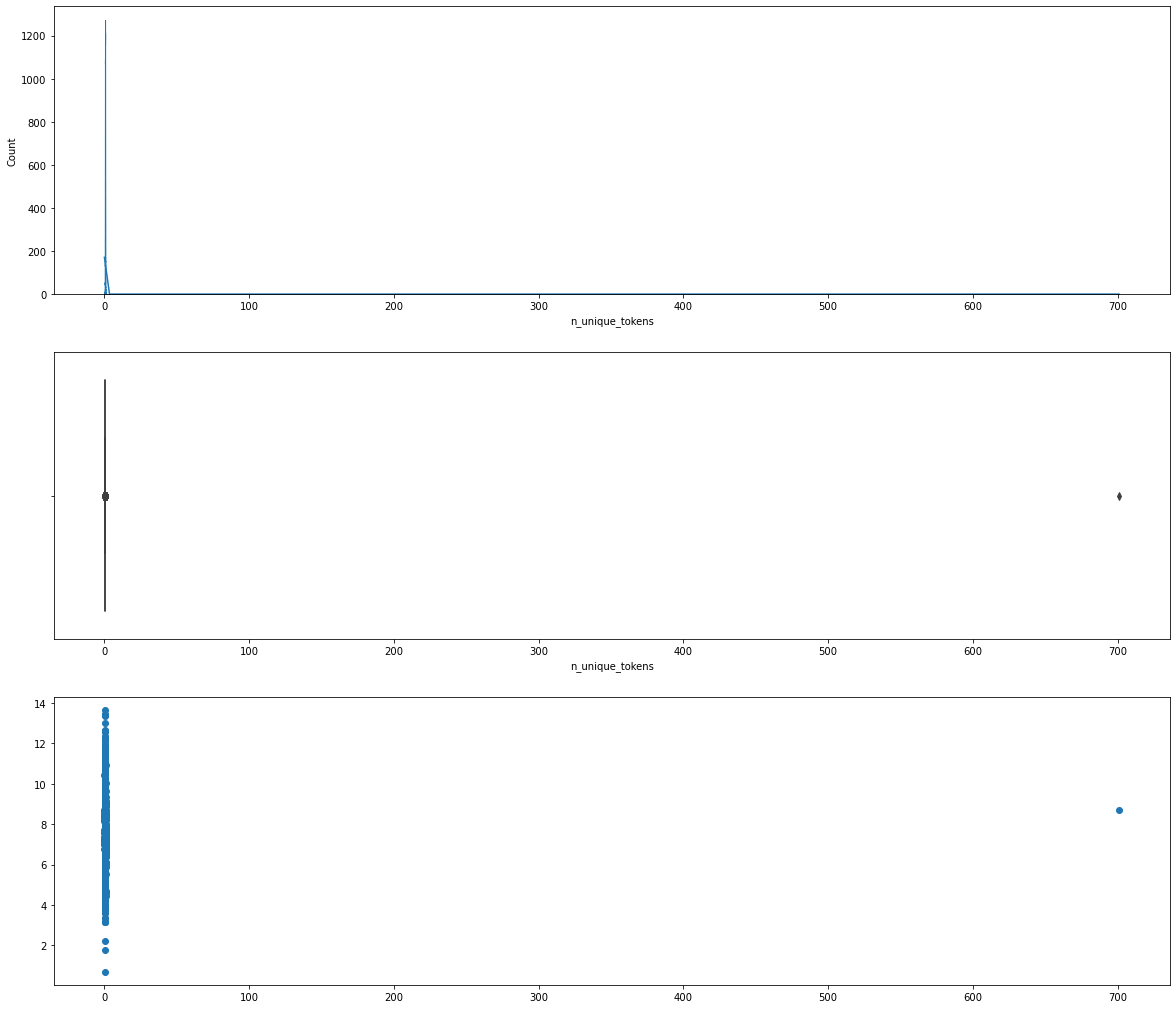

In [335]:
featureAnalysis('n_unique_tokens',dataset)

In [336]:
dataset[dataset['n_unique_tokens'] > 300]

n_tokens_title  n_tokens_content  n_unique_tokens  num_hrefs  \
31037             9.0            1570.0            701.0       11.0   

       num_self_hrefs  num_imgs  num_videos  average_token_length  \
31037            10.0      51.0         0.0              4.696178   

       num_keywords  weekdays  data_channel  kw_min_min  kw_max_min  \
31037           7.0         2             2        -1.0       778.0   

       kw_avg_min  kw_min_max  kw_max_max     kw_avg_max   kw_min_avg  \
31037  143.714286     23100.0    843300.0  330442.857143  2420.579189   

        kw_max_avg   kw_avg_avg  self_reference_min_shares  \
31037  3490.598812  2912.105124                      795.0   

       self_reference_max_shares  self_reference_avg_sharess  is_weekend  \
31037                        0.0                    6924.375         0.0   

       LDA_00  LDA_01  LDA_02  LDA_03  LDA_04  global_subjectivity  \
31037     0.0     0.0     0.0     0.0     0.0                  0.0   

       global_sentiment_polarity  global_rate_positive_words  \
31037                        0.0                         0.0   

       global_rate_negative_words  rate_positive_words  avg_positive_polarity  \
31037                         0.0                  0.0                    0.0   

       min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
31037                    0.0                    0.0                    0.0   

       min_negative_polarity  max_negative_polarity  title_subjectivity  \
31037                    0.0                    0.0                 0.0   

       title_sentiment_polarity  abs_title_subjectivity  \
31037                       0.0                     0.0   

       abs_title_sentiment_polarity    shares  
31037                           0.0  8.682877

In [337]:
dataset = dataset[dataset['n_unique_tokens'] < 300]

count      mean       std       min       25%       50%  \
n_unique_tokens  38462.0  0.546837  0.102314  0.114964  0.477419  0.542982   

                      75%  max  
n_unique_tokens  0.611111  1.0

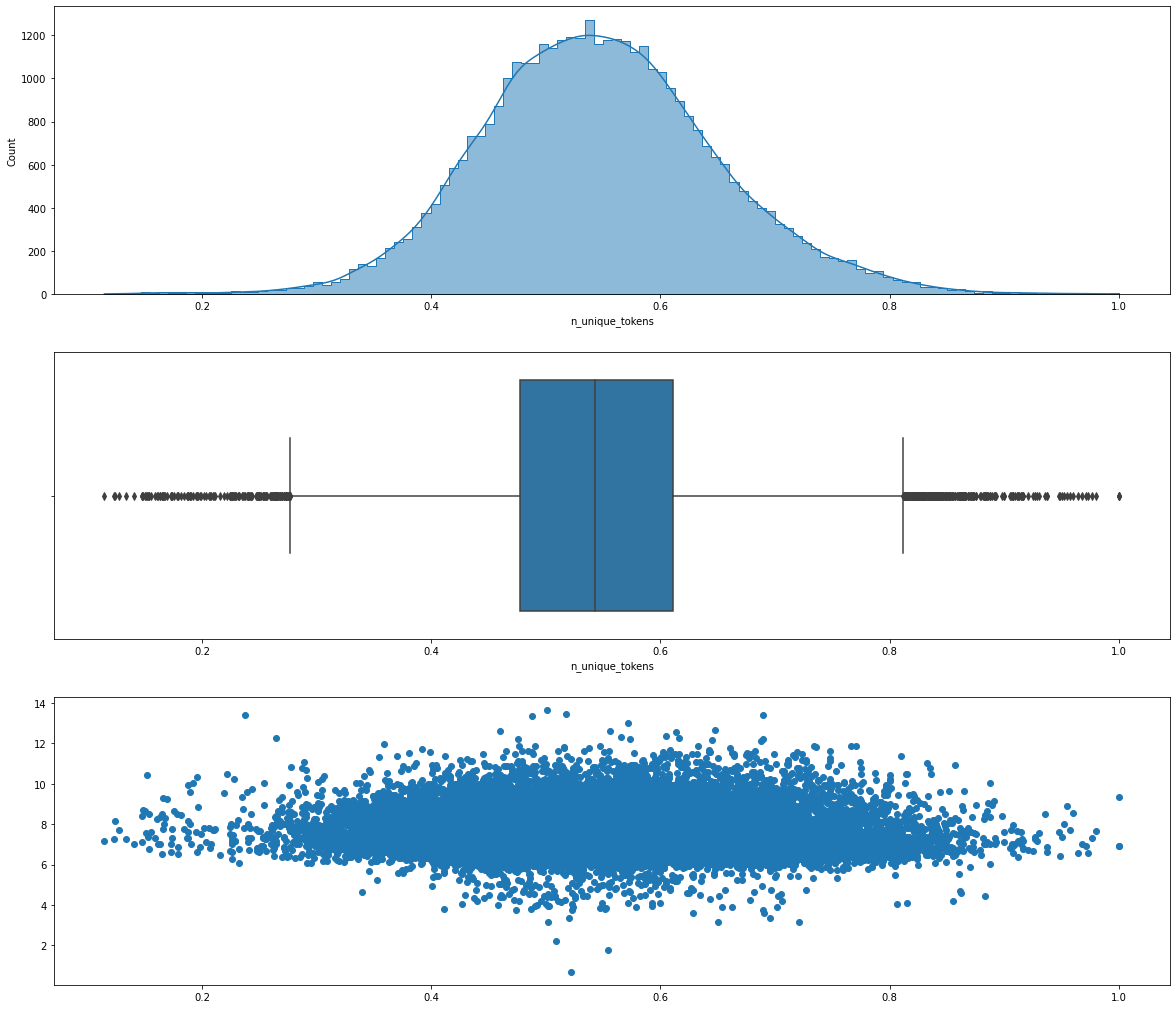

In [338]:
featureAnalysis('n_unique_tokens',dataset)

In [339]:
correlation(dataset,'n_unique_tokens')

           feature  corrMatrix  spearmanCorr  kendallCorr
3  n_unique_tokens    0.022887      0.039634     0.027074


In [340]:
correlation(dataset_RAW,'n_unique_tokens')

           feature  corrMatrix  spearmanCorr  kendallCorr
3  n_unique_tokens    0.006029      0.039568     0.027031


count      mean       std       min       25%       50%  \
n_unique_tokens  38462.0  0.546837  0.102314  0.114964  0.477419  0.542982   

                      75%  max  
n_unique_tokens  0.611111  1.0

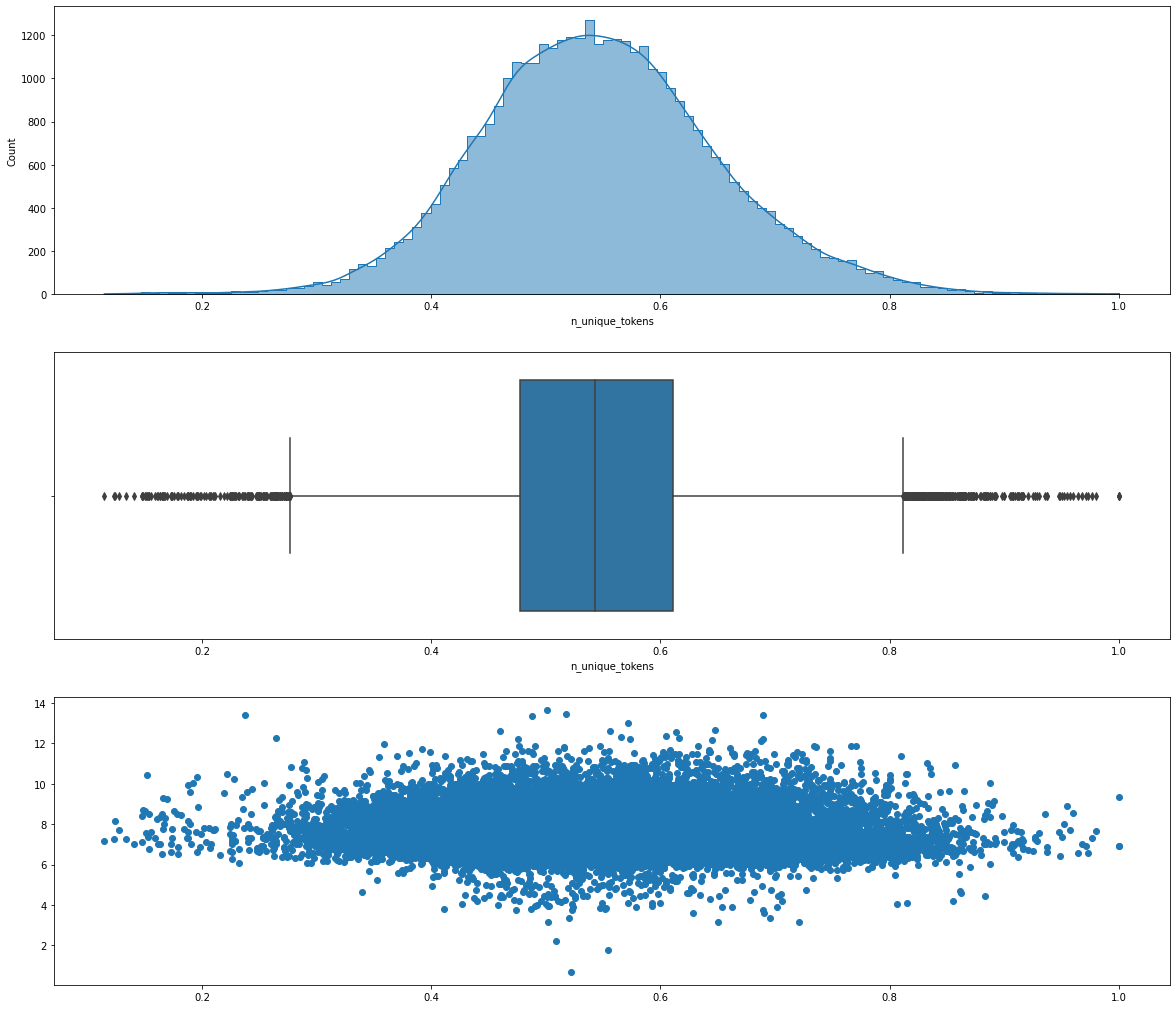

In [341]:
featureAnalysis('n_unique_tokens',dataset)

# 

### num_imgs/num_videos

count      mean       std  min  25%  50%  75%    max
num_imgs  38462.0  4.561853  8.292093  0.0  1.0  1.0  4.0  128.0

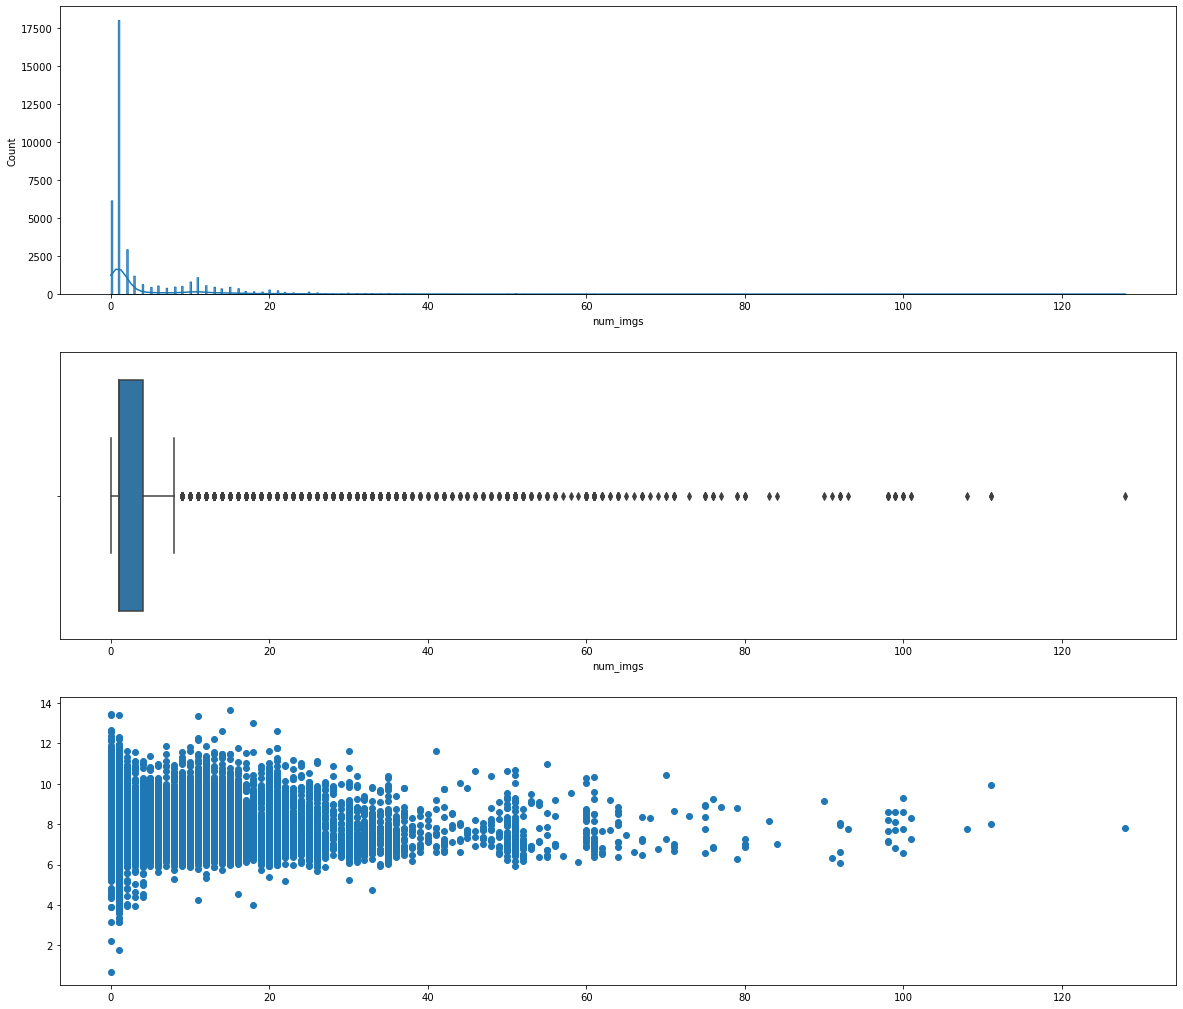

In [342]:
featureAnalysis('num_imgs',dataset)

count      mean       std  min  25%  50%  75%   max
num_videos  38462.0  1.263819  4.164945  0.0  0.0  0.0  1.0  91.0

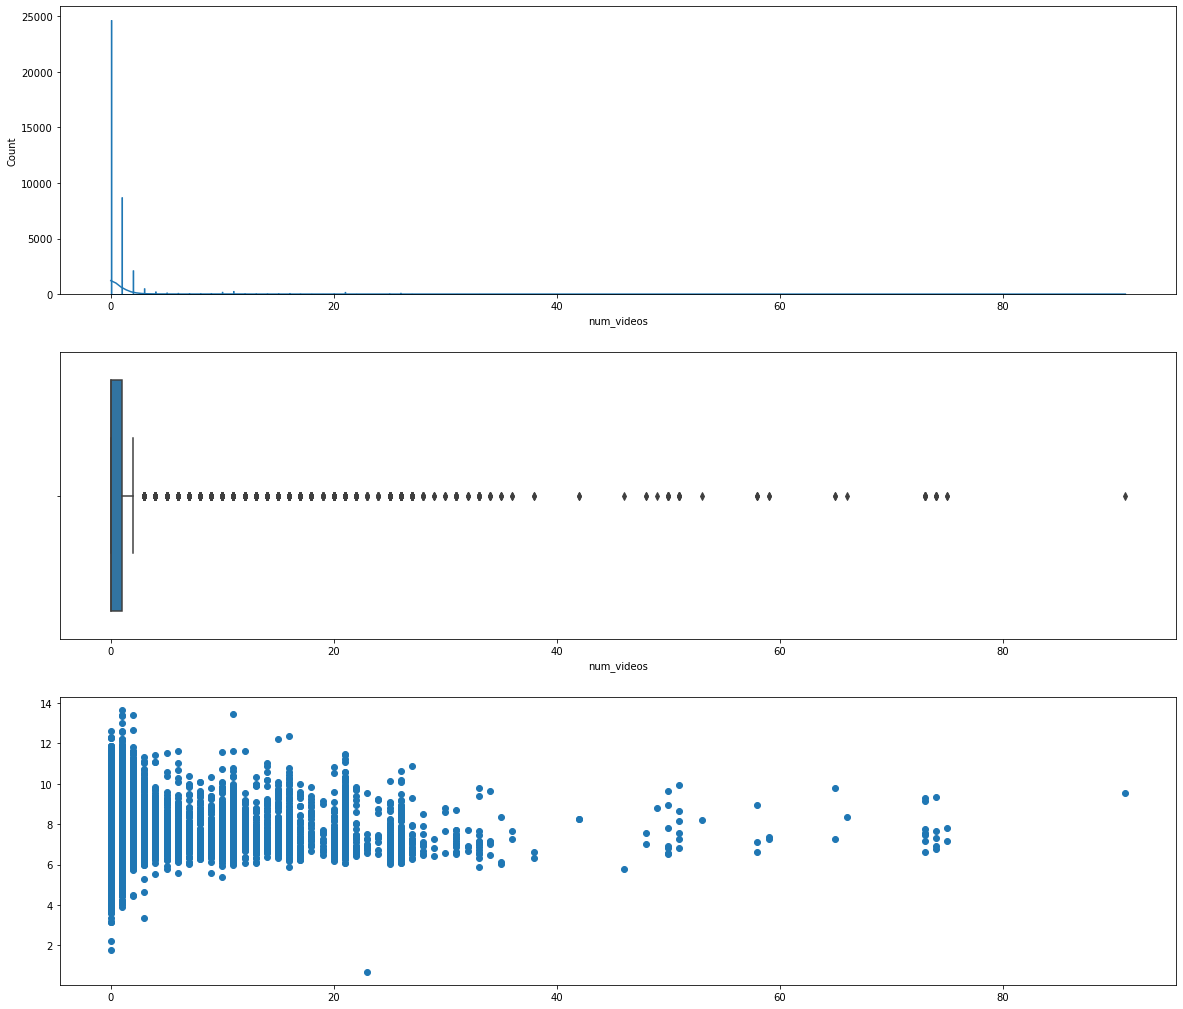

In [343]:
featureAnalysis('num_videos',dataset)

In [344]:
dataset[dataset['num_videos']==0]

n_tokens_title  n_tokens_content  n_unique_tokens  num_hrefs  \
0                12.0             219.0         0.663594        4.0   
1                 9.0             255.0         0.604743        3.0   
2                 9.0             211.0         0.575130        3.0   
3                 9.0             531.0         0.503788        9.0   
4                13.0            1072.0         0.415646       19.0   
...               ...               ...              ...        ...   
39635            13.0             478.0         0.514039       18.0   
39636             8.0            2509.0         0.348878       23.0   
39637            13.0            1629.0         0.425711       15.0   
39638            11.0             223.0         0.653153        5.0   
39642             6.0             682.0         0.539493       10.0   

       num_self_hrefs  num_imgs  num_videos  average_token_length  \
0                 2.0       1.0         0.0              4.680365   
1                 1.0       1.0         0.0              4.913725   
2                 1.0       1.0         0.0              4.393365   
3                 0.0       1.0         0.0              4.404896   
4                19.0      20.0         0.0              4.682836   
...               ...       ...         ...                   ...   
39635             2.0       2.0         0.0              4.891213   
39636             1.0      10.0         0.0              4.569550   
39637            12.0       6.0         0.0              4.552486   
39638             3.0       1.0         0.0              4.923767   
39642             1.0       1.0         0.0              4.975073   

       num_keywords  weekdays  data_channel  kw_min_min  kw_max_min  \
0               5.0         1             2         0.0         0.0   
1               4.0         1             3         0.0         0.0   
2               6.0         1             3         0.0         0.0   
3               7.0         1             2         0.0         0.0   
4               7.0         1             5         0.0         0.0   
...             ...       ...           ...         ...         ...   
39635           6.0         2             3        -1.0       530.0   
39636          10.0         3             1        -1.0       646.0   
39637           8.0         3             2        -1.0      1100.0   
39638           6.0         3             3        -1.0       459.0   
39642           5.0         3             6        -1.0         0.0   

       kw_avg_min  kw_min_max  kw_max_max     kw_avg_max   kw_min_avg  \
0        0.000000         0.0         0.0       0.000000     0.000000   
1        0.000000         0.0         0.0       0.000000     0.000000   
2        0.000000         0.0         0.0       0.000000     0.000000   
3        0.000000         0.0         0.0       0.000000     0.000000   
4        0.000000         0.0         0.0       0.000000     0.000000   
...           ...         ...         ...            ...          ...   
39635  102.863333      8200.0    843300.0  501016.666667  1682.923077   
39636  152.300000     31000.0    843300.0  275140.000000  2990.744681   
39637  354.000000      1500.0    843300.0  200800.000000  1300.000000   
39638   91.000000         0.0    843300.0  484083.333333     0.000000   
39642   -1.000000         0.0    843300.0  254600.000000     0.000000   

        kw_max_avg   kw_avg_avg  self_reference_min_shares  \
0         0.000000     0.000000                      496.0   
1         0.000000     0.000000                        0.0   
2         0.000000     0.000000                      918.0   
3         0.000000     0.000000                        0.0   
4         0.000000     0.000000                      545.0   
...            ...          ...                        ...   
39635  7028.659675  3929.218477                     7200.0   
39636  6880.687034  4349.053221                     4900.0   
39637  4288.893701  2746.804338      

In [345]:
24660 / 39642

0.6220675041622522

In [346]:
dataset[dataset['num_imgs']==0]

n_tokens_title  n_tokens_content  n_unique_tokens  num_hrefs  \
5                10.0             370.0         0.559889        2.0   
8                11.0              97.0         0.670103        2.0   
13                9.0             285.0         0.744186        4.0   
28               10.0             243.0         0.619247        1.0   
37                8.0             257.0         0.568093        9.0   
...               ...               ...              ...        ...   
39447             8.0             304.0         0.609589        9.0   
39560             9.0             261.0         0.620553        4.0   
39595            12.0             334.0         0.573171        2.0   
39629            13.0             209.0         0.656863        4.0   
39643            10.0             157.0         0.701987        1.0   

       num_self_hrefs  num_imgs  num_videos  average_token_length  \
5                 2.0       0.0         0.0              4.359459   
8                 0.0       0.0         0.0              4.855670   
13                2.0       0.0        21.0              4.343860   
28                1.0       0.0         0.0              4.382716   
37                7.0       0.0         1.0              4.638132   
...               ...       ...         ...                   ...   
39447             1.0       0.0         0.0              4.766447   
39560             3.0       0.0         1.0              4.295019   
39595             1.0       0.0         1.0              4.329341   
39629             1.0       0.0         2.0              4.856459   
39643             1.0       0.0         2.0              4.471338   

       num_keywords  weekdays  data_channel  kw_min_min  kw_max_min  \
5               9.0         1             5         0.0         0.0   
8               7.0         1             5         0.0         0.0   
13              6.0         1             0         0.0         0.0   
28             10.0         1             1         0.0         0.0   
37              9.0         1             4         0.0         0.0   
...             ...       ...           ...         ...         ...   
39447           6.0         5             6        -1.0       712.0   
39560           6.0         1             5        -1.0        49.0   
39595           6.0         2             6        -1.0         0.0   
39629           5.0         2             2        -1.0       423.0   
39643           4.0         3             2        -1.0        97.0   

       kw_avg_min  kw_min_max  kw_max_max  kw_avg_max   kw_min_avg  \
5        0.000000         0.0         0.0         0.0     0.000000   
8        0.000000         0.0         0.0         0.0     0.000000   
13       0.000000         0.0         0.0         0.0     0.000000   
28       0.000000         0.0         0.0         0.0     0.000000   
37       0.000000         0.0         0.0         0.0     0.000000   
...           ...         ...         ...         ...          ...   
39447  184.500000     10400.0    843300.0    258550.0  1584.868421   
39560    7.333333     83300.0    843300.0    631250.0  2902.262033   
39595   -1.000000         0.0    843300.0    211250.0     0.000000   
39629  100.800000     30300.0    843300.0    304580.0  2906.137255   
39643   23.500000    205600.0    843300.0    366200.0  3035.080555   

         kw_max_avg   kw_avg_avg  self_reference_min_shares  \
5          0.000000     0.000000                     8500.0   
8          0.000000     0.000000                        0.0   
13         0.000000     0.000000                      770.0   
28         0.000000     0.000000                        0.0   
37         0.000000     0.000000                     1300.0   
...             ...          ...                        ...   
39447   7811.053763  3792.156243                     2800.0   
39560   5781.194425  3982.935730                     1200.0   
39595   3385.393320  1712.761069                      920.0   
3

In [347]:
6170 /39643

0.1556390787780945

In [348]:
dataset[dataset['num_imgs']+dataset['num_videos']==0]

n_tokens_title  n_tokens_content  n_unique_tokens  num_hrefs  \
5                10.0             370.0         0.559889        2.0   
8                11.0              97.0         0.670103        2.0   
28               10.0             243.0         0.619247        1.0   
57                8.0             130.0         0.821705        7.0   
79               12.0             288.0         0.589474        5.0   
...               ...               ...              ...        ...   
39271             8.0             129.0         0.703125        3.0   
39329             9.0             358.0         0.548023        3.0   
39412            13.0              99.0         0.762887       14.0   
39420            10.0             199.0         0.682051        4.0   
39447             8.0             304.0         0.609589        9.0   

       num_self_hrefs  num_imgs  num_videos  average_token_length  \
5                 2.0       0.0         0.0              4.359459   
8                 0.0       0.0         0.0              4.855670   
28                1.0       0.0         0.0              4.382716   
57                4.0       0.0         0.0              4.546154   
79                2.0       0.0         0.0              4.381944   
...               ...       ...         ...                   ...   
39271             1.0       0.0         0.0              4.178295   
39329             1.0       0.0         0.0              4.466480   
39412             1.0       0.0         0.0              4.434343   
39420             1.0       0.0         0.0              4.221106   
39447             1.0       0.0         0.0              4.766447   

       num_keywords  weekdays  data_channel  kw_min_min  kw_max_min  \
5               9.0         1             5         0.0         0.0   
8               7.0         1             5         0.0         0.0   
28             10.0         1             1         0.0         0.0   
57              9.0         1             5         0.0         0.0   
79              6.0         2             6       217.0       504.0   
...             ...       ...           ...         ...         ...   
39271          10.0         1             0        -1.0       569.0   
39329           6.0         2             5        -1.0       801.0   
39412           8.0         4             0        -1.0       432.0   
39420           6.0         4             6        -1.0       129.0   
39447           6.0         5             6        -1.0       712.0   

       kw_avg_min  kw_min_max  kw_max_max     kw_avg_max   kw_min_avg  \
5        0.000000         0.0         0.0       0.000000     0.000000   
8        0.000000         0.0         0.0       0.000000     0.000000   
28       0.000000         0.0         0.0       0.000000     0.000000   
57       0.000000         0.0         0.0       0.000000     0.000000   
79     421.750000         0.0     17100.0    3616.666667     0.000000   
...           ...         ...         ...            ...          ...   
39271  172.600000      4400.0    843300.0  325090.000000  1480.714286   
39329  269.666667      3400.0    843300.0  276750.000000  1601.300000   
39412  102.625000      7100.0    843300.0  299962.500000  2088.187500   
39420   38.600000         0.0    843300.0  277183.333333     0.000000   
39447  184.500000     10400.0    843300.0  258550.000000  1584.868421   

        kw_max_avg   kw_avg_avg  self_reference_min_shares  \
5         0.000000     0.000000                     8500.0   
8         0.000000     0.000000                        0.0   
28        0.000000     0.000000                        0.0   
57        0.000000     0.000000                     1300.0   
79     2019.346154   804.380311                     3100.0   
...            ...          ...                        ...   
39271  5841.496296  3800.190846                      646.0   
39329  7080.103448  3352.509004                    13900.0   
39412  6923.719736  4524.352368      

In [349]:
2036 /39447

0.051613557431490355

In [350]:
dataset['media'] = dataset['num_imgs']+dataset['num_videos']


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


count      mean       std  min  25%  50%  75%    max
media  38462.0  5.825672  9.028125  0.0  1.0  2.0  8.0  140.0

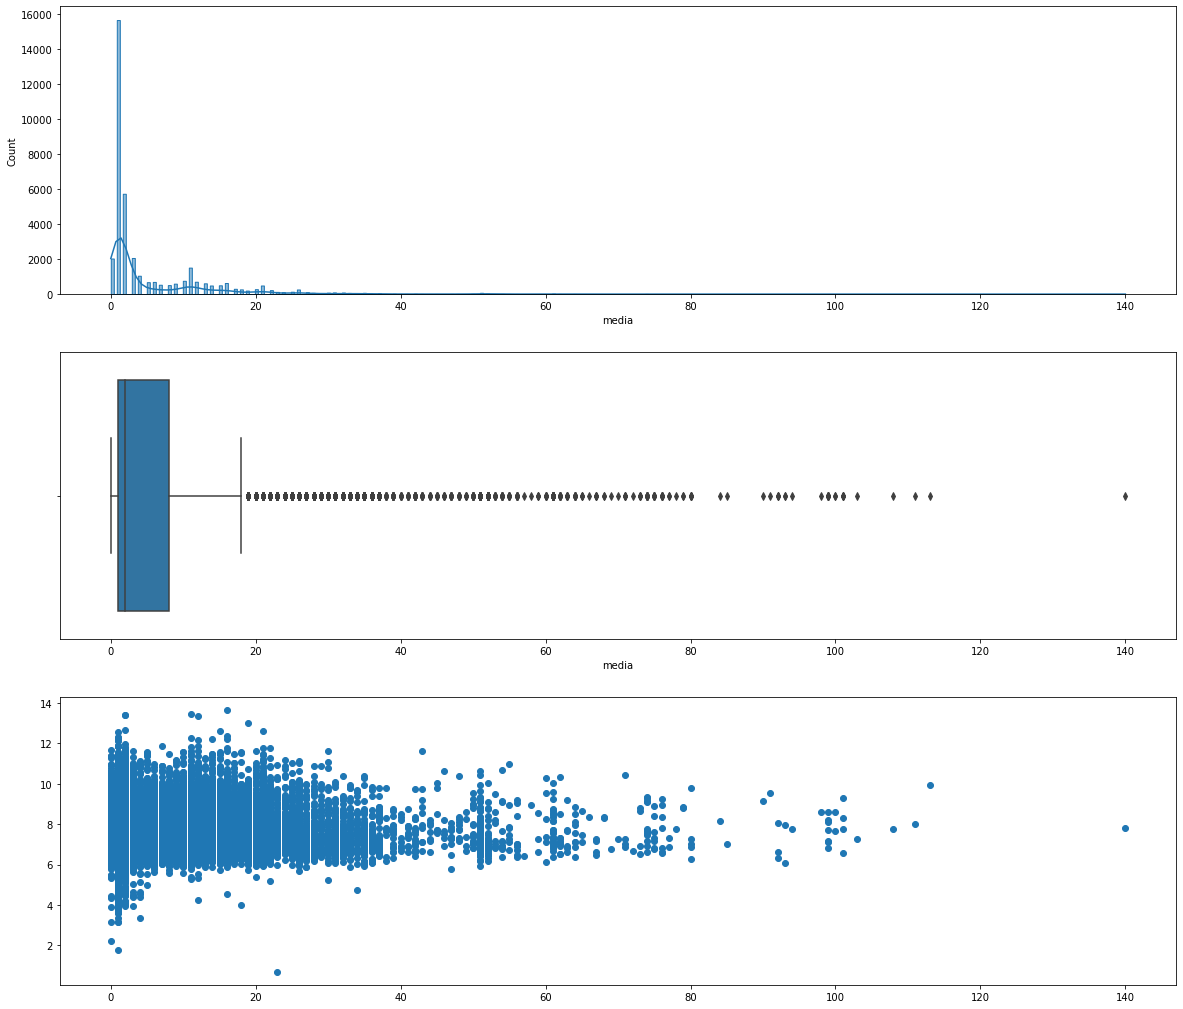

In [351]:
featureAnalysis('media',dataset)

In [352]:
dataset['media'] = np.log1p(dataset.media)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [353]:
correlation(dataset,'media')

   feature  corrMatrix  spearmanCorr  kendallCorr
46   media    0.134062       0.12166      0.08898


In [354]:
correlation(dataset,'num_imgs')

    feature  corrMatrix  spearmanCorr  kendallCorr
6  num_imgs     0.09418      0.089835     0.067289


In [355]:
correlation(dataset,'num_videos')

      feature  corrMatrix  spearmanCorr  kendallCorr
7  num_videos    0.033514      0.047234     0.036996


**change video and media and test correlation and outliers**

In [356]:
dataset2 = dataset.copy()

In [357]:
dataset['num_imgs'] = np.sqrt(dataset.num_imgs)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [358]:
dataset['num_videos'] = np.sqrt(dataset.num_videos)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [359]:
correlation(dataset,'num_imgs')

    feature  corrMatrix  spearmanCorr  kendallCorr
6  num_imgs    0.099305      0.089835     0.067289


In [360]:
correlation(dataset,'num_videos')

      feature  corrMatrix  spearmanCorr  kendallCorr
7  num_videos    0.057621      0.047234     0.036996


# 

### n_tokens_content  /   average_token_length    

In [361]:
dataset['avg_len'] = dataset["n_tokens_content"] * dataset["average_token_length"] 


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


count        mean          std   min     25%     50%     75%  \
avg_len  38462.0  2630.67412  2155.376686  66.0  1218.0  1997.0  3413.0   

             max  
avg_len  36285.0

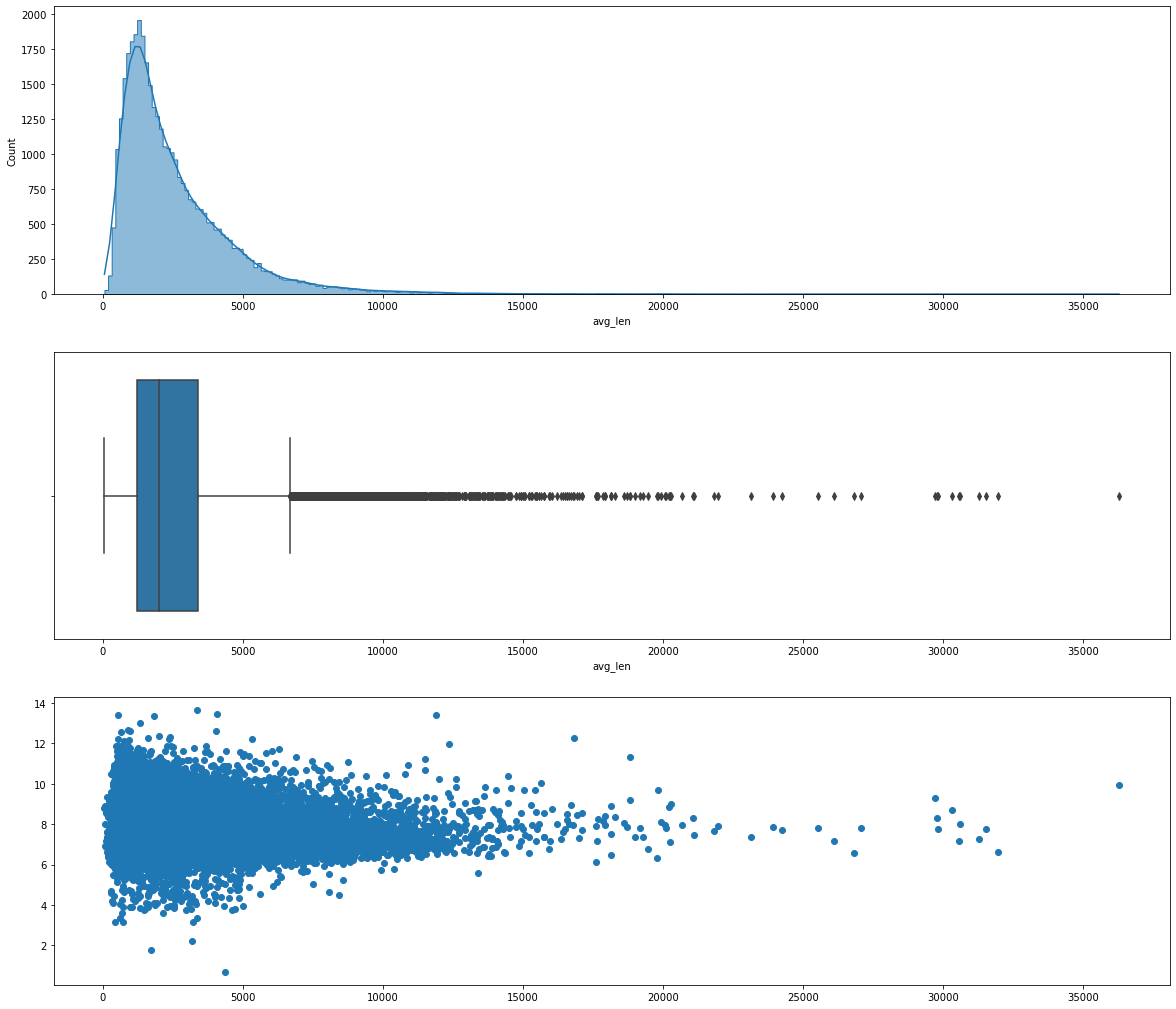

In [362]:
featureAnalysis('avg_len',dataset)

# 

### polarity

In [363]:
correlation(dataset,'avg_negative_polarity')
correlation(dataset,'avg_positive_polarity')

                  feature  corrMatrix  spearmanCorr  kendallCorr
38  avg_negative_polarity    0.050864      0.026986     0.018212
                  feature  corrMatrix  spearmanCorr  kendallCorr
35  avg_positive_polarity    0.069549      0.064372     0.043548


In [364]:
dataset['neg_pos_avg'] = dataset["avg_negative_polarity"] -  dataset["avg_positive_polarity"]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [365]:
correlation(dataset,'neg_pos_avg')

        feature  corrMatrix  spearmanCorr  kendallCorr
48  neg_pos_avg    0.078543      0.058643     0.039549


count      mean       std   min       25%       50%       75%  \
neg_pos_avg  38462.0 -0.632198  0.154119 -1.75 -0.720455 -0.622532 -0.534724   

             max  
neg_pos_avg  0.0

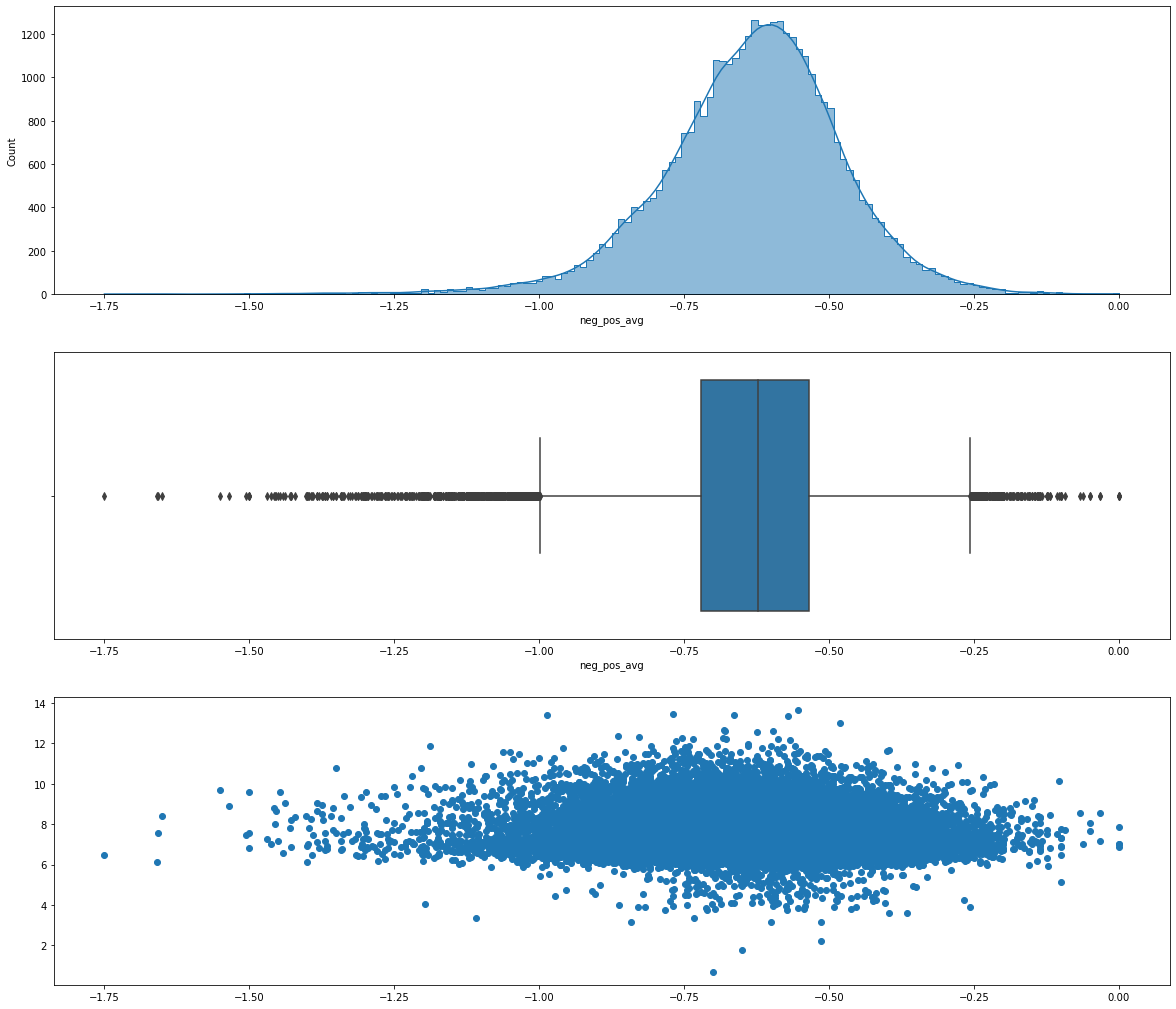

In [366]:
featureAnalysis('neg_pos_avg',dataset)

In [367]:
correlation(dataset,'min_negative_polarity')
correlation(dataset,'min_positive_polarity')

                  feature  corrMatrix  spearmanCorr  kendallCorr
39  min_negative_polarity    0.036115      0.024486     0.017198
                  feature  corrMatrix  spearmanCorr  kendallCorr
36  min_positive_polarity    0.002845      0.039792     0.029546


In [368]:
dataset['neg_pos_min'] = dataset["min_negative_polarity"] -  dataset["min_positive_polarity"]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [369]:
correlation(dataset,'neg_pos_min')

        feature  corrMatrix  spearmanCorr  kendallCorr
49  neg_pos_min    0.035884      0.018689     0.012748


count      mean       std  min       25%  50%       75%  max
neg_pos_min  38462.0 -0.636363  0.275918 -2.0 -0.833333 -0.6 -0.433333  0.0

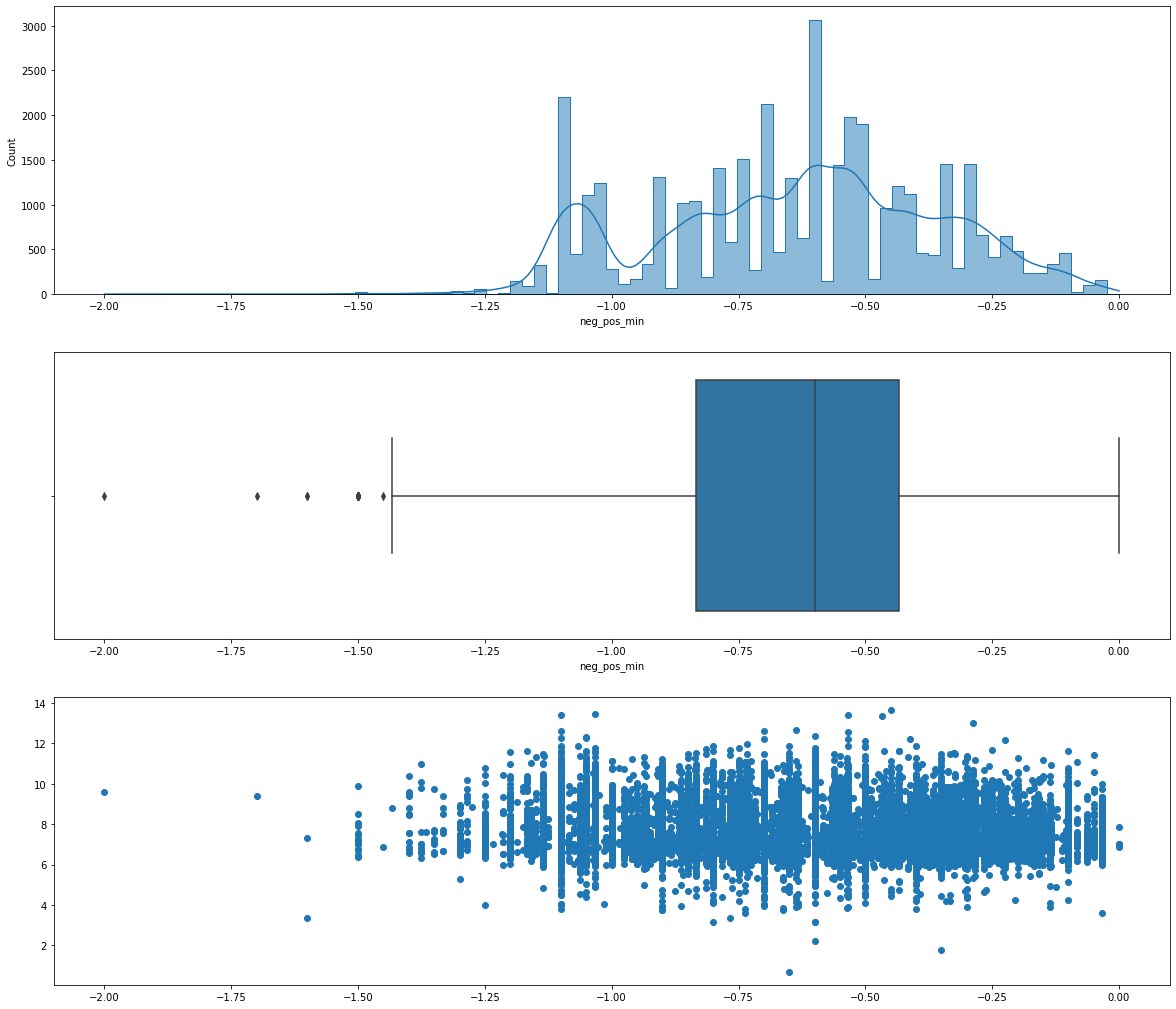

In [370]:
featureAnalysis('neg_pos_min',dataset)

In [371]:
correlation(dataset,'max_negative_polarity')
correlation(dataset,'max_positive_polarity')

                  feature  corrMatrix  spearmanCorr  kendallCorr
40  max_negative_polarity     0.02186      0.010065     0.007249
                  feature  corrMatrix  spearmanCorr  kendallCorr
37  max_positive_polarity    0.064723      0.069101     0.050827


In [372]:
dataset['neg_pos_max'] = dataset["max_negative_polarity"] -  dataset["max_positive_polarity"]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [373]:
correlation(dataset,'neg_pos_max')

        feature  corrMatrix  spearmanCorr  kendallCorr
50  neg_pos_max    0.071311      0.070209     0.048242


count      mean       std  min   25%  50%  75%  max
neg_pos_max  38462.0 -0.890787  0.221939 -2.0 -1.05 -0.9 -0.7  0.0

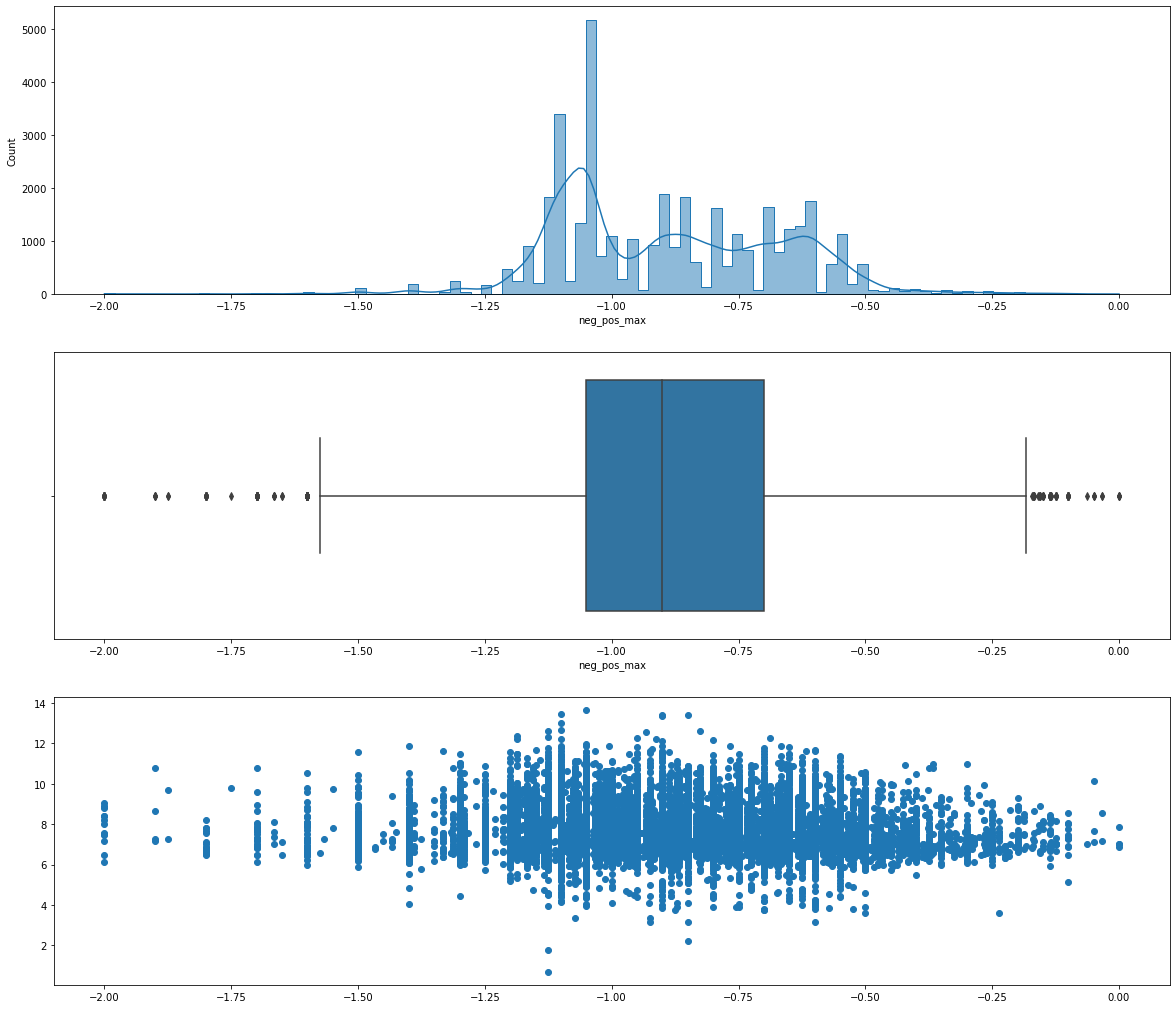

In [374]:
featureAnalysis('neg_pos_max',dataset)

# 

### Delete last two items 

In [375]:
correlation(dataset,'all')

                         feature  corrMatrix  spearmanCorr  kendallCorr
1                 n_tokens_title    0.022806      0.042942     0.030722
2               n_tokens_content    0.033075      0.018588     0.012758
3                n_unique_tokens    0.022887      0.039634     0.027074
4                      num_hrefs    0.114832      0.104030     0.072039
5                 num_self_hrefs    0.035281      0.046446     0.033177
6                       num_imgs    0.099305      0.089835     0.067289
7                     num_videos    0.057621      0.047234     0.036996
8           average_token_length    0.040346      0.052766     0.035447
9                   num_keywords    0.066329      0.072598     0.052207
10                      weekdays    0.084427      0.105127     0.076304
11                  data_channel    0.132609      0.109931     0.080280
12                    kw_min_min    0.024657      0.006308     0.004514
13                    kw_max_min    0.032038      0.092264     0

In [376]:
outlierDetection(dataset_RAW)

[('weekdays', 0),
 ('data_channel', 0),
 ('kw_min_avg', 0),
 ('LDA_04', 0),
 ('max_positive_polarity', 0),
 ('min_negative_polarity', 0),
 ('title_subjectivity', 0),
 ('abs_title_subjectivity', 0),
 ('num_keywords', 50),
 ('n_tokens_title', 155),
 ('n_unique_tokens', 490),
 ('rate_positive_words', 519),
 ('global_rate_positive_words', 520),
 ('average_token_length', 552),
 ('global_subjectivity', 864),
 ('kw_avg_max', 879),
 ('avg_negative_polarity', 879),
 ('global_sentiment_polarity', 944),
 ('avg_positive_polarity', 1042),
 ('global_rate_negative_words', 1358),
 ('abs_title_sentiment_polarity', 1589),
 ('shares', 1599),
 ('kw_avg_avg', 1642),
 ('n_tokens_content', 1875),
 ('kw_avg_min', 2009),
 ('num_self_hrefs', 2090),
 ('kw_max_avg', 2352),
 ('max_negative_polarity', 2454),
 ('num_hrefs', 2636),
 ('num_videos', 2939),
 ('LDA_03', 3029),
 ('min_positive_polarity', 3147),
 ('LDA_02', 3441),
 ('kw_max_min', 3566),
 ('self_reference_max_shares', 4094),
 ('self_reference_avg_sharess', 

In [377]:
# kw_max_max                0.000768      0.032475     0.025527  outlier : 9365
# abs_title_subjectivity    0.000036      0.000913     0.000705  outlier : 1589

In [378]:
dataset.drop('kw_max_max', inplace=True, axis=1)
dataset.drop('abs_title_subjectivity', inplace=True, axis=1)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [379]:
simpleLinear(dataset)
ridge_regression(dataset,10)
lasso_regression(dataset,10)


Linear Model............................................

MAE : 0.6542459913255024
MSE : 0.7712790702335444
RMSE : 0.8782249542307167
r2_score : 0.11219872817225007  11.0

Ridge Model............................................

The train score for ridge model is 0.12245159308102938
The test score for ridge model is 0.11208314576499856
MAE : 0.6541825940496352
MSE : 0.7713794826731625
r2_score : 0.11208314576499856  11.0

Lasso Model............................................

The train score for ls model is 0.08339856811972257
The test score for ls model is 0.07684970875771802
MAE : 0.6727242559460294
MSE : 0.8019885991482513
r2_score : 0.07684970875771802  8.0


# 

<a name="5.4.2"></a>
### Fix outliers

In [380]:
dicto = {}
def outlierDetection(dataset):
    num_cols = dataset.select_dtypes(['int64','float64']).columns
    for column in num_cols:    
        q1 = dataset[column].quantile(0.25)    # First Quartile
        q3 = dataset[column].quantile(0.75)    # Third Quartile
        IQR = q3 - q1                            # Inter Quartile Range
        llimit = q1 - 1.5*IQR                       # Lower Limit
        ulimit = q3 + 1.5*IQR                        # Upper Limit
        outliers = dataset[(dataset[column] < llimit) | (dataset[column] > ulimit)]
        dicto[column] = len(outliers)
    sorted_dicto = sorted(dicto.items(), key=lambda x:x[1])
    return (sorted_dicto)

In [381]:
datset_Outlier = dataset.copy()

In [382]:
outlierDetection(dataset)

[('weekdays', 0),
 ('data_channel', 0),
 ('kw_min_avg', 0),
 ('LDA_04', 0),
 ('max_positive_polarity', 0),
 ('min_negative_polarity', 0),
 ('title_subjectivity', 0),
 ('neg_pos_min', 24),
 ('media', 28),
 ('num_keywords', 50),
 ('n_tokens_title', 155),
 ('neg_pos_max', 167),
 ('n_unique_tokens', 489),
 ('rate_positive_words', 518),
 ('global_rate_positive_words', 520),
 ('average_token_length', 552),
 ('global_subjectivity', 863),
 ('kw_avg_max', 879),
 ('avg_negative_polarity', 879),
 ('global_sentiment_polarity', 944),
 ('neg_pos_avg', 960),
 ('avg_positive_polarity', 1041),
 ('global_rate_negative_words', 1358),
 ('abs_title_sentiment_polarity', 1589),
 ('shares', 1599),
 ('kw_avg_avg', 1641),
 ('avg_len', 1846),
 ('n_tokens_content', 1874),
 ('num_videos', 1903),
 ('kw_avg_min', 2009),
 ('num_self_hrefs', 2089),
 ('kw_max_avg', 2352),
 ('max_negative_polarity', 2454),
 ('num_hrefs', 2636),
 ('LDA_03', 3028),
 ('min_positive_polarity', 3147),
 ('LDA_02', 3441),
 ('kw_max_min', 3566)

In [384]:
dataset.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'weekdays', 'data_channel', 'kw_min_min', 'kw_max_min',
       'kw_avg_min', 'kw_min_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'is_weekend', 'LDA_00', 'LDA_01',
       'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_sentiment_polarity', 'shares',
       'media', 'avg_len', 'neg_pos_avg', 'neg_pos_min', 'neg_pos_max'],
      dtype='

### Links outliers

In [385]:
len(dataset[dataset['num_self_hrefs'] == 0])

4169

In [386]:
selfHref_0 = dataset[dataset['num_self_hrefs'] == 0]

<AxesSubplot:>

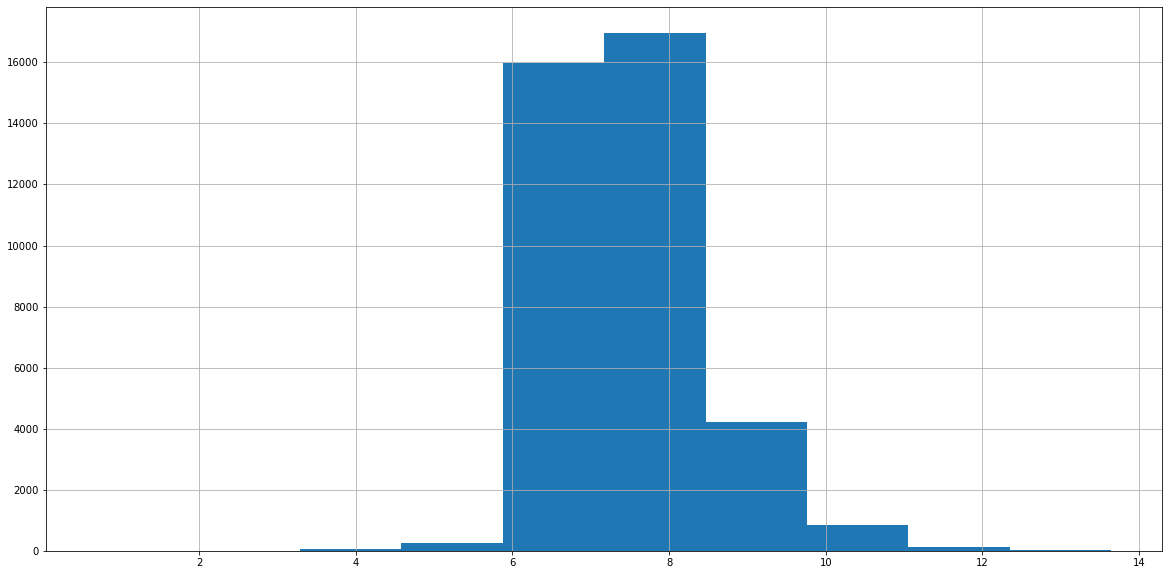

In [387]:
dataset['shares'].hist(figsize=(20,10))

<AxesSubplot:>

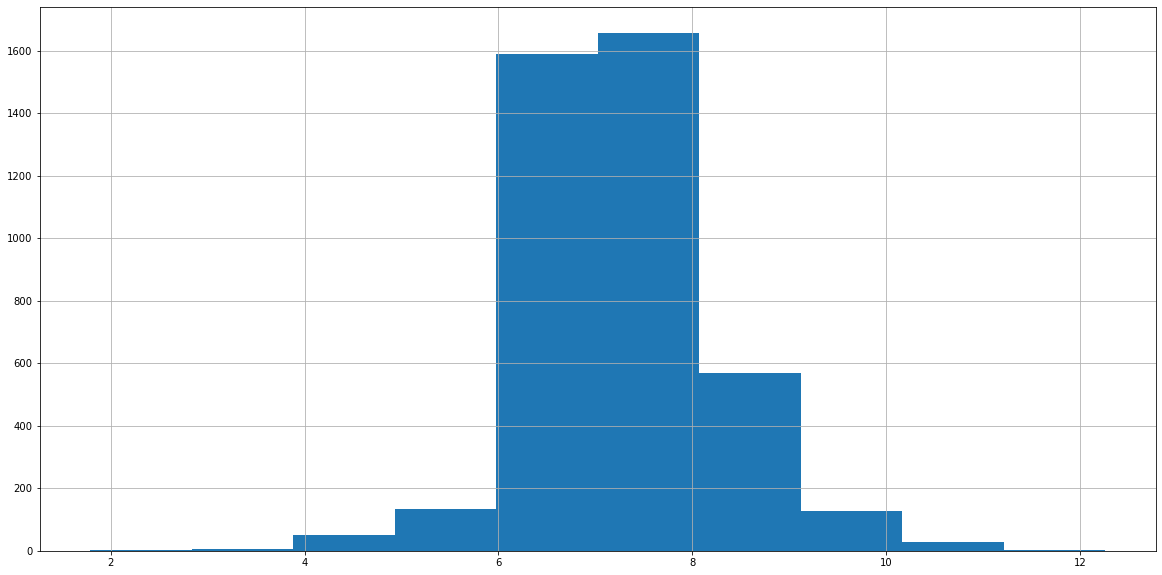

In [388]:
selfHref_0['shares'].hist(figsize=(20,10))

In [389]:
len(selfHref_0[selfHref_0['self_reference_min_shares'] == 0])

4169

In [390]:
len(selfHref_0[selfHref_0['self_reference_min_shares'] == 0])

4169

In [391]:
len(dataset[dataset['self_reference_min_shares'] == 0])

5993

In [392]:
len(dataset[dataset['self_reference_max_shares'] == 0])

5993

In [393]:
len(dataset[dataset['self_reference_avg_sharess'] == 0])

5993

In [394]:
dataset = dataset[dataset['num_self_hrefs'] != 0]

In [395]:
dataset

n_tokens_title  n_tokens_content  n_unique_tokens  num_hrefs  \
0                12.0             219.0         0.663594        4.0   
1                 9.0             255.0         0.604743        3.0   
2                 9.0             211.0         0.575130        3.0   
4                13.0            1072.0         0.415646       19.0   
5                10.0             370.0         0.559889        2.0   
...               ...               ...              ...        ...   
39639            11.0             346.0         0.529052        9.0   
39640            12.0             328.0         0.696296        9.0   
39641            10.0             442.0         0.516355       24.0   
39642             6.0             682.0         0.539493       10.0   
39643            10.0             157.0         0.701987        1.0   

       num_self_hrefs  num_imgs  num_videos  average_token_length  \
0                 2.0  1.000000    0.000000              4.680365   
1                 1.0  1.000000    0.000000              4.913725   
2                 1.0  1.000000    0.000000              4.393365   
4                19.0  4.472136    0.000000              4.682836   
5                 2.0  0.000000    0.000000              4.359459   
...               ...       ...         ...                   ...   
39639             7.0  1.000000    1.000000              4.523121   
39640             7.0  1.732051    6.928203              4.405488   
39641             1.0  3.464102    1.000000              5.076923   
39642             1.0  1.000000    0.000000              4.975073   
39643             1.0  0.000000    1.414214              4.471338   

       num_keywords  weekdays  data_channel  kw_min_min  kw_max_min  \
0               5.0         1             2         0.0         0.0   
1               4.0         1             3         0.0         0.0   
2               6.0         1             3         0.0         0.0   
4               7.0         1             5         0.0         0.0   
5               9.0         1             5         0.0         0.0   
...             ...       ...           ...         ...         ...   
39639           8.0         3             5        -1.0       671.0   
39640           7.0         3             4        -1.0       616.0   
39641           8.0         3             0        -1.0       691.0   
39642           5.0         3             6        -1.0         0.0   
39643           4.0         3             2        -1.0        97.0   

       kw_avg_min  kw_min_max     kw_avg_max   kw_min_avg   kw_max_avg  \
0           0.000         0.0       0.000000     0.000000     0.000000   
1           0.000         0.0       0.000000     0.000000     0.000000   
2           0.000         0.0       0.000000     0.000000     0.000000   
4           0.000         0.0       0.000000     0.000000     0.000000   
5           0.000         0.0       0.000000     0.000000     0.000000   
...           ...         ...            ...          ...          ...   
39639     173.125     26900.0  374962.500000  2514.742857  4004.342857   
39640     184.000      6500.0  192985.714286  1664.267857  5470.168651   
39641     168.250      6200.0  295850.000000  1753.882353  6880.687034   
39642      -1.000         0.0  254600.000000     0.000000  3384.316871   
39643      23.500    205600.0  366200.000000  3035.080555  3613.512953   

        kw_avg_avg  self_reference_min_shares  self_reference_max_shares  \
0         0.000000                      496.0                      496.0   
1         0.000000                        0.0                        0.0   
2         0.000000                      918.0                      918.0   
4         0.000000                      545.0                    16000.0   
5         0.000000                     8500.0                     8500.0   
...            ...                        ...                        ...   
39639  3031.115764                    11400.0      

<AxesSubplot:>

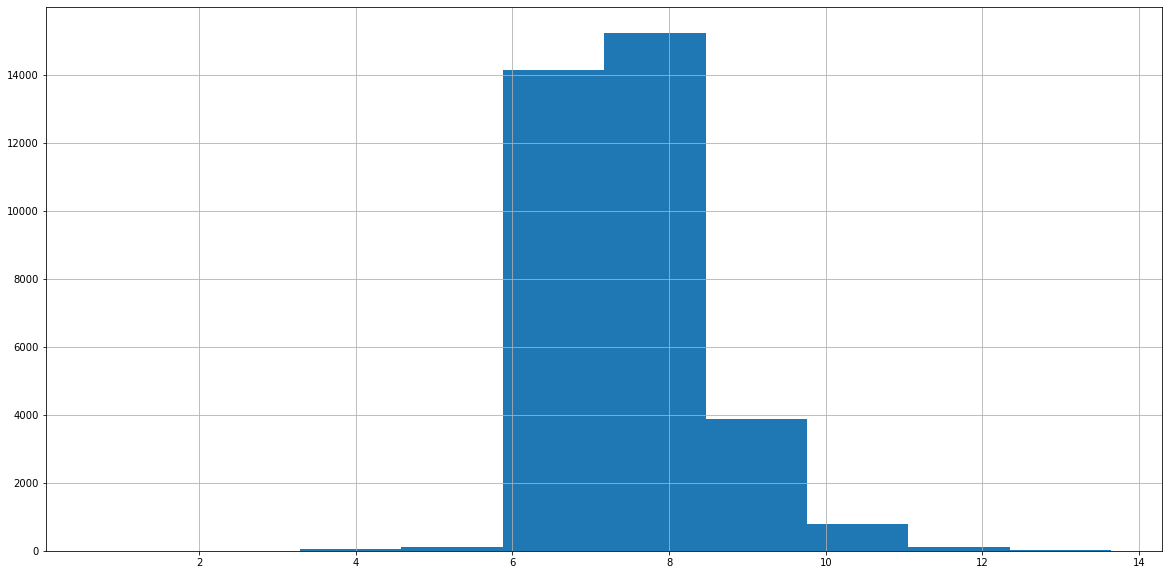

In [396]:
dataset['shares'].hist(figsize=(20,10))

In [397]:
outlierDetection(dataset)

[('weekdays', 0),
 ('data_channel', 0),
 ('kw_min_avg', 0),
 ('LDA_03', 0),
 ('LDA_04', 0),
 ('max_positive_polarity', 0),
 ('min_negative_polarity', 0),
 ('title_subjectivity', 0),
 ('media', 0),
 ('neg_pos_min', 24),
 ('num_keywords', 29),
 ('n_tokens_title', 147),
 ('neg_pos_max', 151),
 ('n_unique_tokens', 418),
 ('rate_positive_words', 467),
 ('global_rate_positive_words', 475),
 ('average_token_length', 525),
 ('kw_avg_max', 758),
 ('global_subjectivity', 765),
 ('avg_negative_polarity', 785),
 ('neg_pos_avg', 806),
 ('global_sentiment_polarity', 818),
 ('avg_positive_polarity', 884),
 ('global_rate_negative_words', 1262),
 ('shares', 1300),
 ('kw_avg_avg', 1399),
 ('abs_title_sentiment_polarity', 1417),
 ('num_imgs', 1552),
 ('num_self_hrefs', 1637),
 ('avg_len', 1732),
 ('n_tokens_content', 1770),
 ('kw_avg_min', 1773),
 ('num_videos', 1878),
 ('kw_max_avg', 2116),
 ('max_negative_polarity', 2279),
 ('num_hrefs', 2555),
 ('min_positive_polarity', 2943),
 ('kw_max_min', 2985),
 

# 

### kw_max_min

In [398]:
len(dataset[dataset['kw_max_min'] == 0])

715

count         mean          std  min    25%    50%     75%  \
kw_max_min  34293.0  1129.050092  3890.560806  0.0  444.0  653.0  1000.0   

                 max  
kw_max_min  298400.0

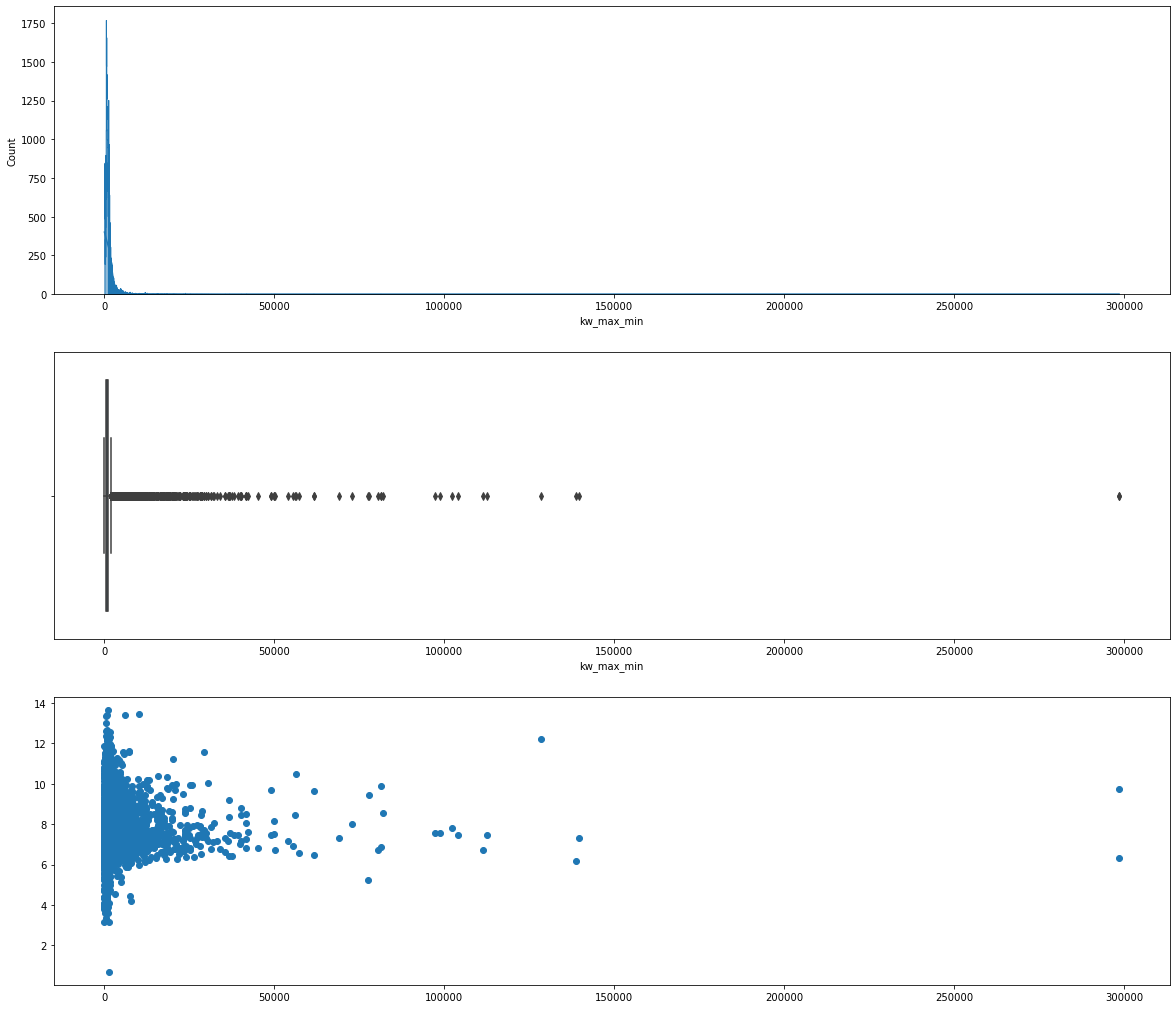

In [399]:
featureAnalysis('kw_max_min',dataset)

In [400]:
dataset['kw_max_min']= np.log(dataset.kw_max_min,where=dataset.kw_max_min>0)

count     mean       std  min       25%       50%       75%  \
kw_max_min  34293.0  6.37779  1.303592  0.0  6.095825  6.481577  6.907755   

                 max  
kw_max_min  12.60619

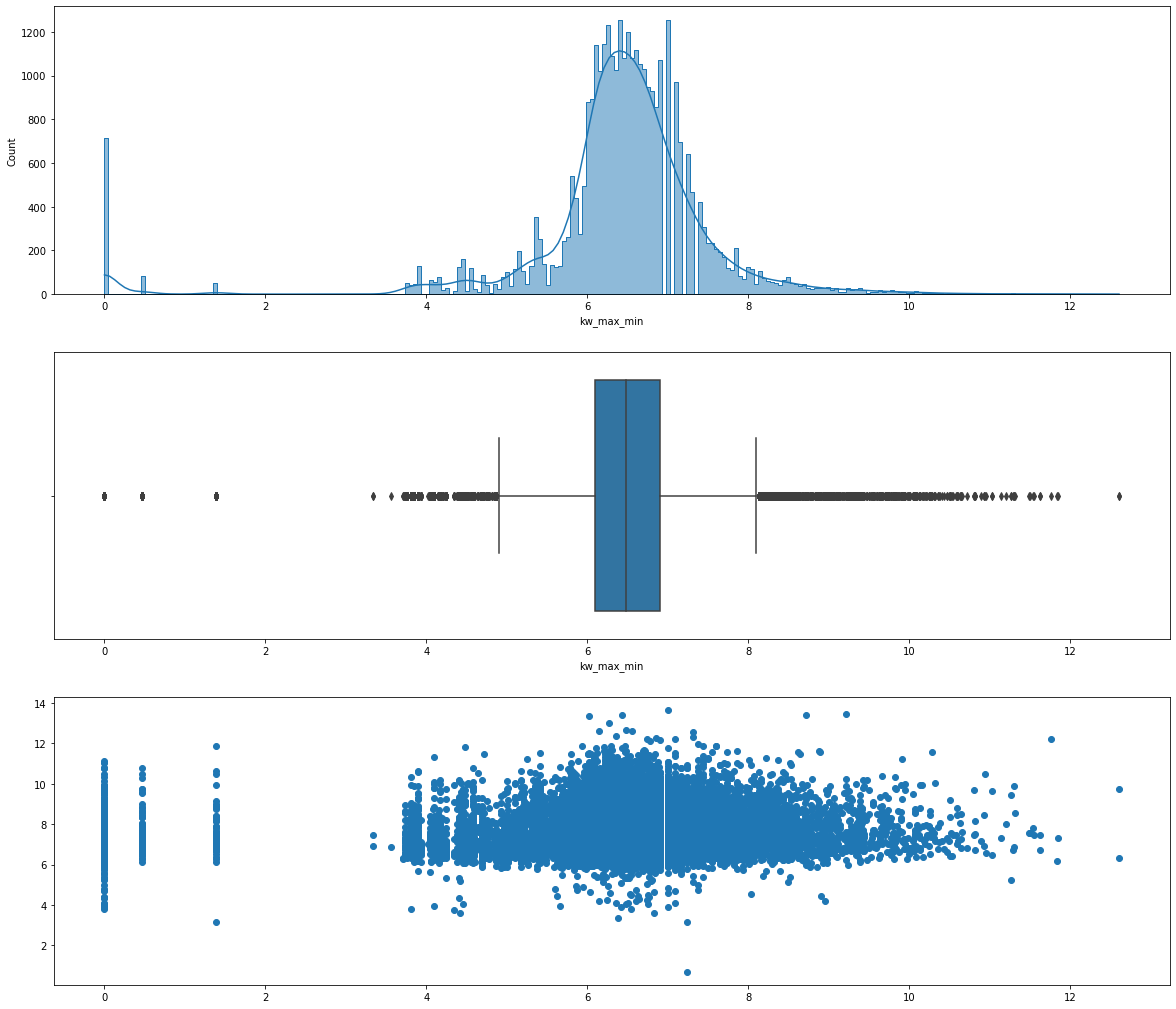

In [401]:
featureAnalysis('kw_max_min',dataset)

# 

### kw_max_avg

In [402]:
len(dataset[dataset['kw_max_avg'] == 0])

67

count         mean          std  min          25%         50%  \
kw_max_avg  34293.0  5677.453168  6250.267969  0.0  3566.297886  4349.06538   

                    75%       max  
kw_max_avg  6020.524129  298400.0

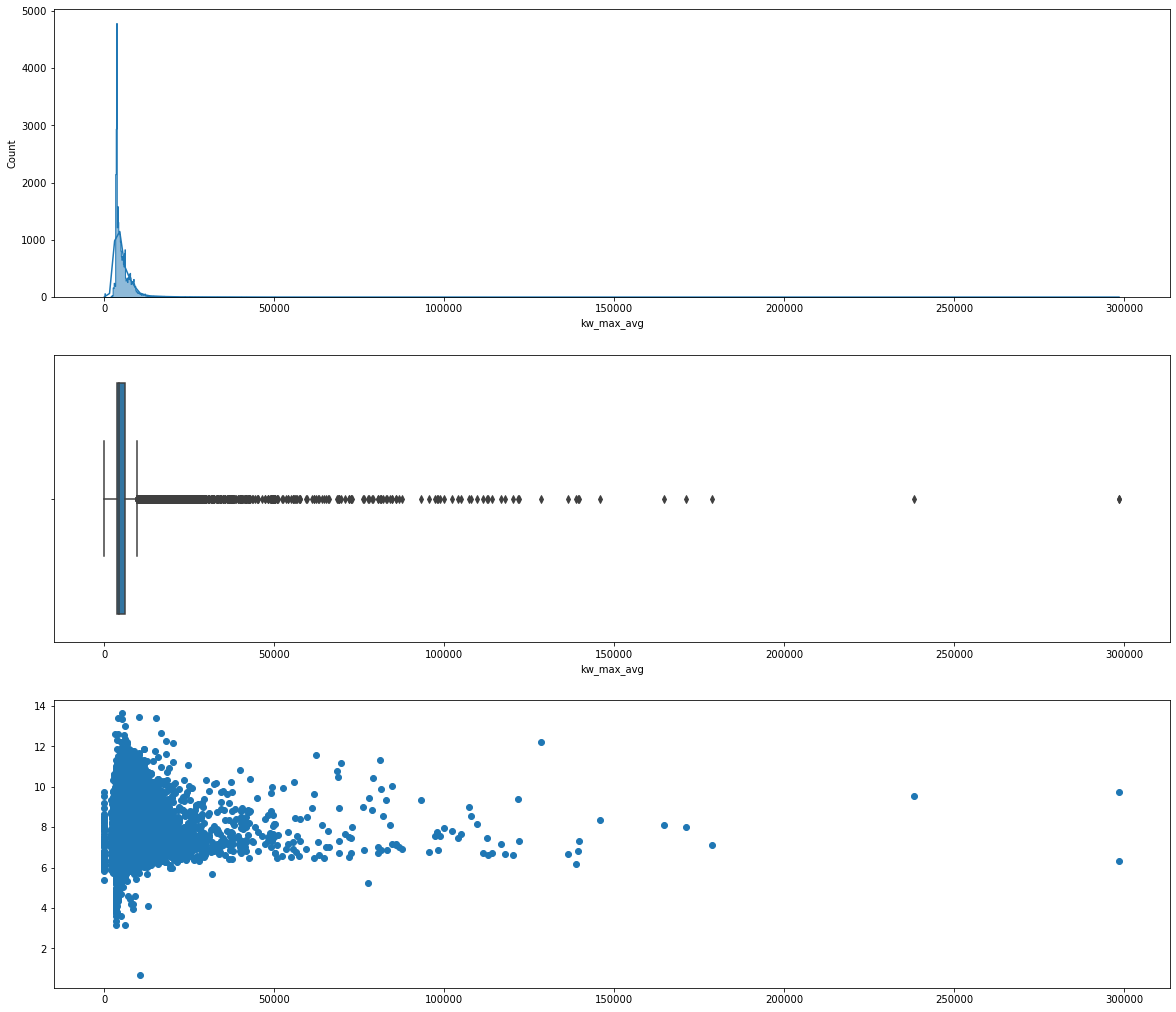

In [403]:
featureAnalysis('kw_max_avg',dataset)

In [404]:
dataset['kw_max_avg']= np.sqrt(dataset.kw_max_avg)

count       mean       std  min        25%        50%  \
kw_max_avg  34293.0  72.060212  22.01802  0.0  59.718489  65.947444   

                  75%         max  
kw_max_avg  77.592037  546.260011

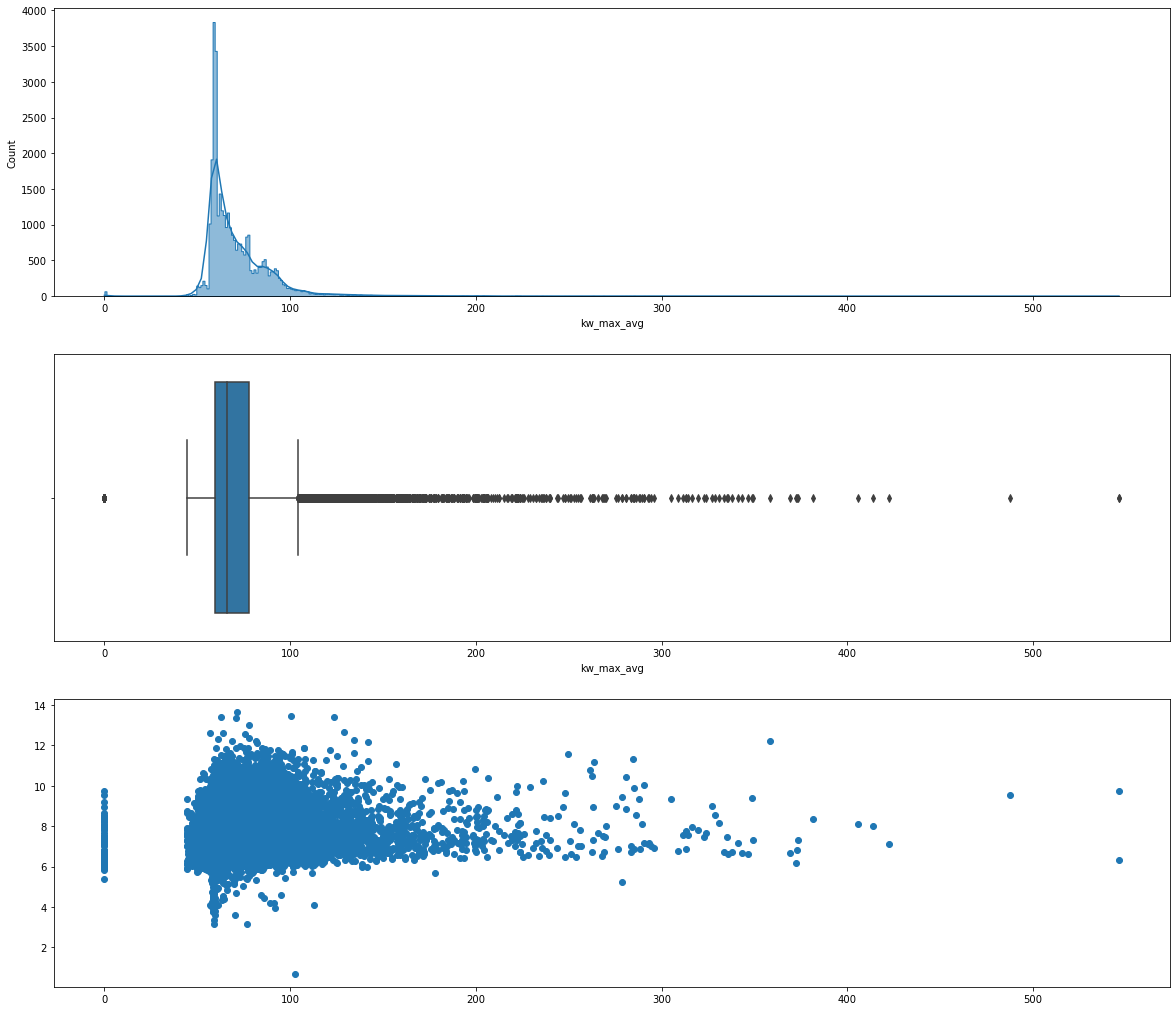

In [405]:
featureAnalysis('kw_max_avg',dataset)

# 

### kw_avg_avg

In [406]:
len(dataset[dataset['kw_avg_avg'] == 0])

67

count         mean          std  min          25%          50%  \
kw_avg_avg  34293.0  3151.884343  1323.263572  0.0  2404.733413  2890.625105   

                    75%           max  
kw_avg_avg  3611.559266  43567.659946

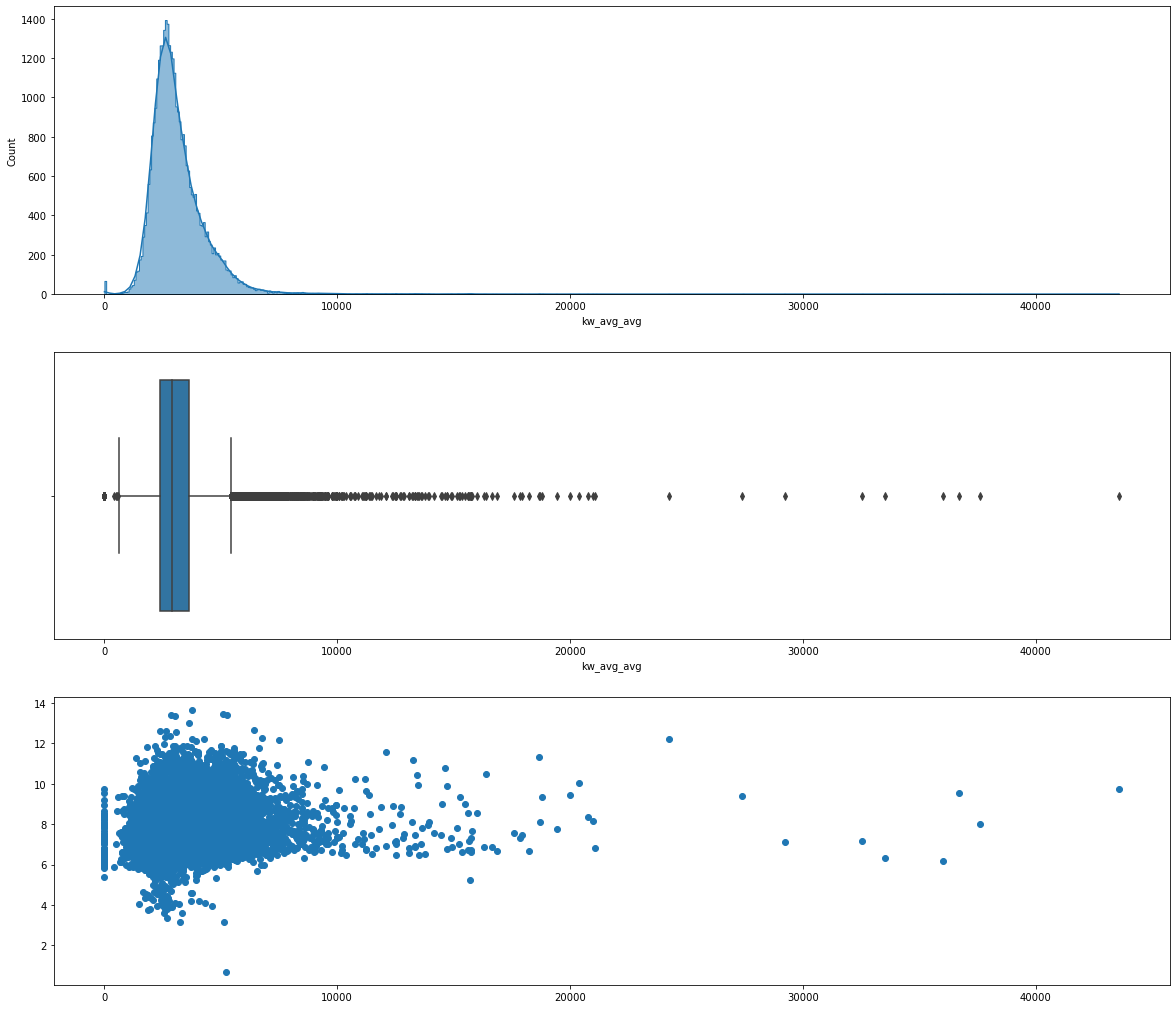

In [407]:
featureAnalysis('kw_avg_avg',dataset)

In [408]:
dataset['kw_avg_avg']= np.sqrt(dataset.kw_avg_avg)

count       mean        std  min        25%        50%  \
kw_avg_avg  34293.0  55.220127  10.130397  0.0  49.038081  53.764534   

                 75%         max  
kw_avg_avg  60.09625  208.728675

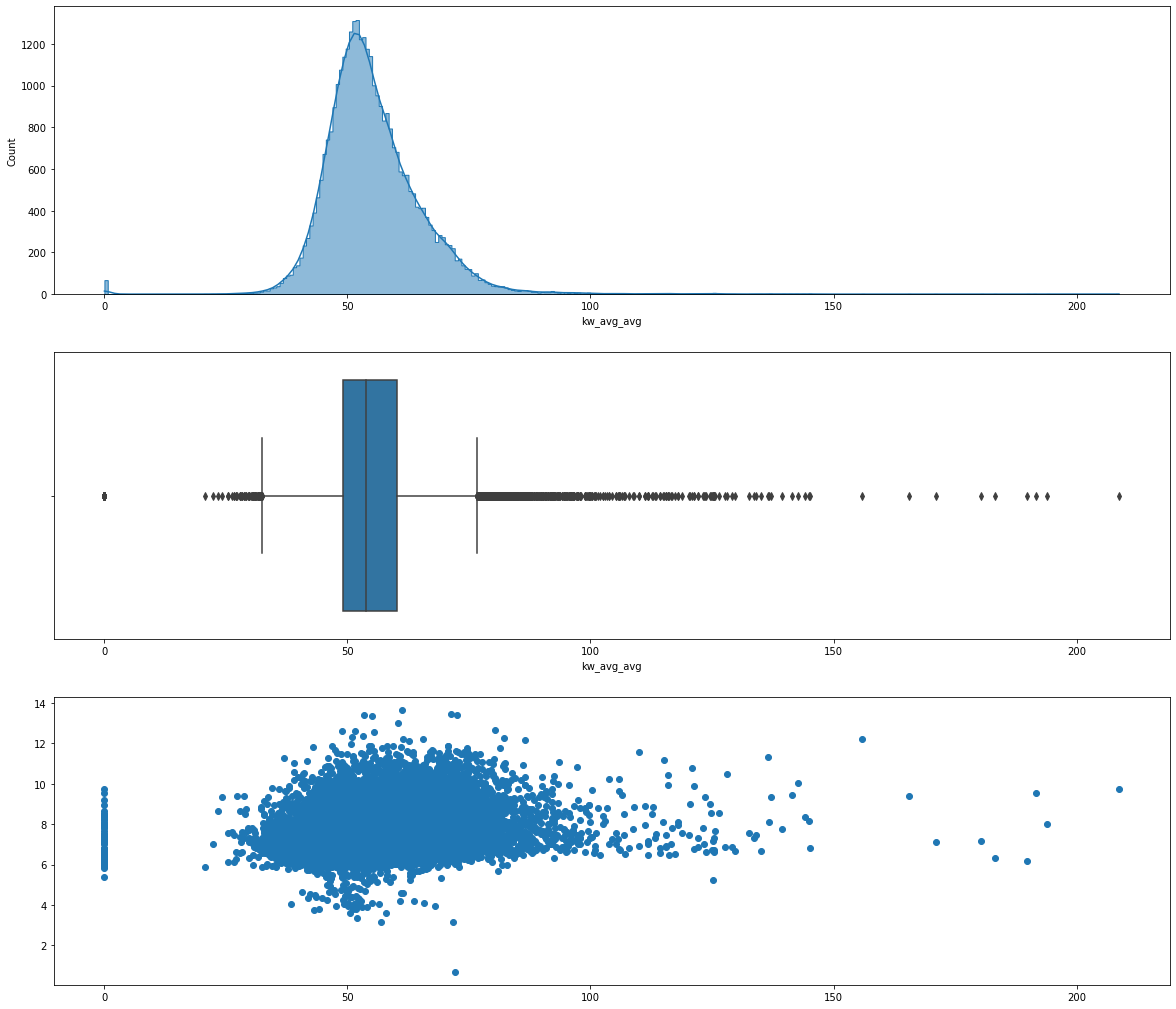

In [409]:
featureAnalysis('kw_avg_avg',dataset)

### kw_avg_max

count           mean            std  min       25%       50%  \
kw_avg_max  34293.0  261028.633392  131797.390973  0.0  175670.0  248575.0   

                      75%       max  
kw_avg_max  332066.666667  843300.0

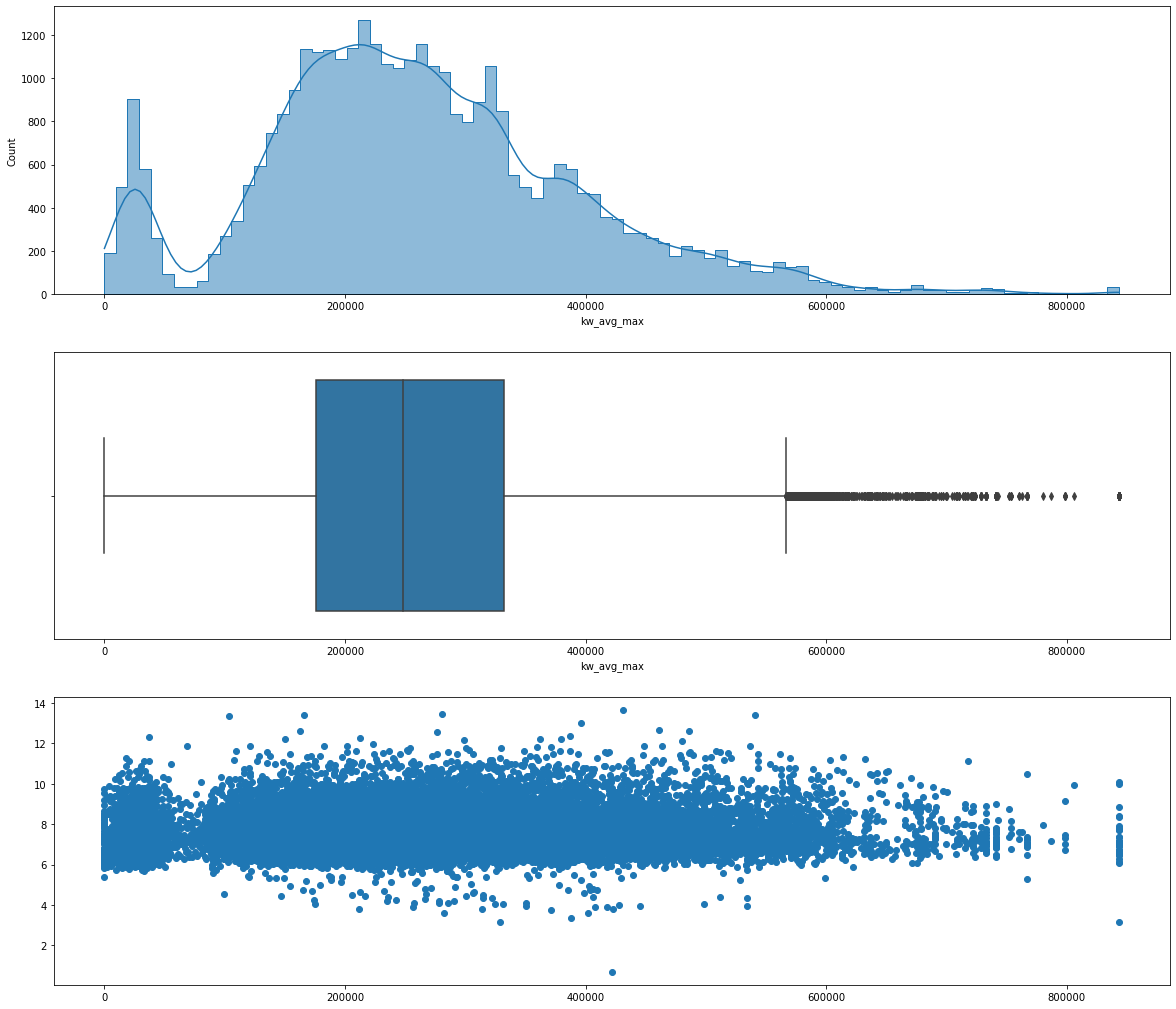

In [410]:
featureAnalysis('kw_avg_max',dataset)

In [411]:
dataset['kw_avg_max'] = np.sqrt(dataset.kw_avg_max)

count        mean         std  min         25%         50%  \
kw_avg_max  34293.0  490.968908  141.346197  0.0  419.130051  498.572964   

                  75%         max  
kw_avg_max  576.25226  918.313672

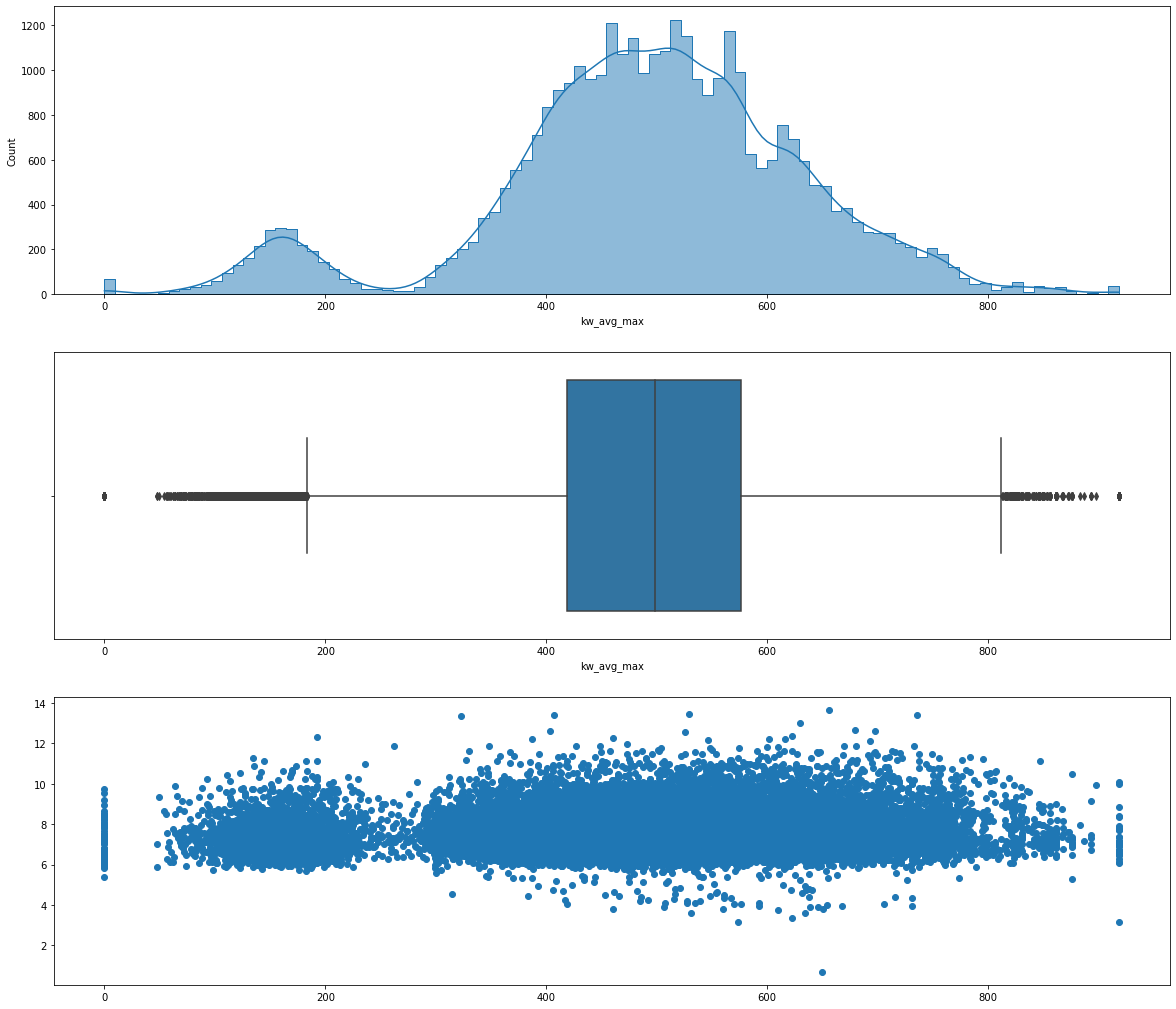

In [412]:
featureAnalysis('kw_avg_max',dataset)

In [413]:
dicto = {}
def outlierDetection(dataset):
    num_cols = dataset.select_dtypes(['int64','float64']).columns
    for column in num_cols:    
        q1 = dataset[column].quantile(0.25)    # First Quartile
        q3 = dataset[column].quantile(0.75)    # Third Quartile
        IQR = q3 - q1                            # Inter Quartile Range
        llimit = q1 - 1.5*IQR                       # Lower Limit
        ulimit = q3 + 1.5*IQR                        # Upper Limit
        outliers = dataset[(dataset[column] < llimit) | (dataset[column] > ulimit)]
        dicto[column] = len(outliers)
    sorted_dicto = sorted(dicto.items(), key=lambda x:x[1])
    return (sorted_dicto)

In [414]:
outlierDetection(dataset)

[('weekdays', 0),
 ('data_channel', 0),
 ('kw_min_avg', 0),
 ('LDA_03', 0),
 ('LDA_04', 0),
 ('max_positive_polarity', 0),
 ('min_negative_polarity', 0),
 ('title_subjectivity', 0),
 ('media', 0),
 ('neg_pos_min', 24),
 ('num_keywords', 29),
 ('n_tokens_title', 147),
 ('neg_pos_max', 151),
 ('n_unique_tokens', 418),
 ('rate_positive_words', 467),
 ('global_rate_positive_words', 475),
 ('average_token_length', 525),
 ('global_subjectivity', 765),
 ('avg_negative_polarity', 785),
 ('neg_pos_avg', 806),
 ('global_sentiment_polarity', 818),
 ('avg_positive_polarity', 884),
 ('kw_avg_avg', 954),
 ('global_rate_negative_words', 1262),
 ('shares', 1300),
 ('abs_title_sentiment_polarity', 1417),
 ('num_imgs', 1552),
 ('num_self_hrefs', 1637),
 ('kw_max_avg', 1661),
 ('avg_len', 1732),
 ('n_tokens_content', 1770),
 ('kw_avg_min', 1773),
 ('num_videos', 1878),
 ('kw_avg_max', 2182),
 ('max_negative_polarity', 2279),
 ('num_hrefs', 2555),
 ('min_positive_polarity', 2943),
 ('kw_max_min', 3324),
 

# 

In [168]:
simpleLinear(dataset)
ridge_regression(dataset,10)
lasso_regression(dataset,10)


Linear Model............................................

MAE : 0.6448283721337132
MSE : 0.7461141579054319
RMSE : 0.8637789983007412
r2_score : 0.11725124633813078  12.0

Ridge Model............................................

The train score for ridge model is 0.11410783663418123
The test score for ridge model is 0.1172178566392219
MAE : 0.6449151479226611
MSE : 0.7461423794429654
r2_score : 0.1172178566392219  12.0

Lasso Model............................................

The train score for ls model is 0.022033483754844152
The test score for ls model is 0.01783201880637053
MAE : 0.6916114347031985
MSE : 0.8301449683956852
r2_score : 0.01783201880637053  2.0


# 

<a name="5.4.3"></a>
### Now it's time to scale our dataset
+ Despite all transformation we did in the previous parts there are plenty of outliers.so we are going to use different scaling methods for different features
+ Robust scaler for noisy features 
+ Standardization for normal distribution features
+ for others Min_max Scaler(except categoricals)

In [453]:
dataset_featureScale = dataset.copy()

In [454]:
dicto = {}
def outlierDetection(dataset):
    num_cols = dataset.select_dtypes(['int64','float64']).columns
    for column in num_cols:    
        q1 = dataset[column].quantile(0.25)    # First Quartile
        q3 = dataset[column].quantile(0.75)    # Third Quartile
        IQR = q3 - q1                            # Inter Quartile Range
        llimit = q1 - 1.5*IQR                       # Lower Limit
        ulimit = q3 + 1.5*IQR                        # Upper Limit
        outliers = dataset[(dataset[column] < llimit) | (dataset[column] > ulimit)]
        dicto[column] = len(outliers)
    sorted_dicto = sorted(dicto.items(), key=lambda x:x[1])
    return (sorted_dicto)

In [455]:
outlierDetection(dataset)

[('weekdays', 0),
 ('data_channel', 0),
 ('kw_min_avg', 0),
 ('LDA_03', 0),
 ('LDA_04', 0),
 ('max_positive_polarity', 0),
 ('min_negative_polarity', 0),
 ('title_subjectivity', 0),
 ('media', 0),
 ('neg_pos_min', 24),
 ('num_keywords', 29),
 ('n_tokens_title', 147),
 ('neg_pos_max', 151),
 ('n_unique_tokens', 418),
 ('rate_positive_words', 467),
 ('global_rate_positive_words', 475),
 ('average_token_length', 525),
 ('global_subjectivity', 765),
 ('avg_negative_polarity', 785),
 ('neg_pos_avg', 806),
 ('global_sentiment_polarity', 818),
 ('avg_positive_polarity', 884),
 ('kw_avg_avg', 954),
 ('global_rate_negative_words', 1262),
 ('shares', 1300),
 ('abs_title_sentiment_polarity', 1417),
 ('num_imgs', 1552),
 ('num_self_hrefs', 1637),
 ('kw_max_avg', 1661),
 ('avg_len', 1732),
 ('n_tokens_content', 1770),
 ('kw_avg_min', 1773),
 ('num_videos', 1878),
 ('kw_avg_max', 2182),
 ('max_negative_polarity', 2279),
 ('num_hrefs', 2555),
 ('min_positive_polarity', 2943),
 ('kw_max_min', 3324),
 

array([[<AxesSubplot:title={'center':'n_tokens_title'}>,
        <AxesSubplot:title={'center':'n_tokens_content'}>,
        <AxesSubplot:title={'center':'n_unique_tokens'}>,
        <AxesSubplot:title={'center':'num_hrefs'}>,
        <AxesSubplot:title={'center':'num_self_hrefs'}>,
        <AxesSubplot:title={'center':'num_imgs'}>,
        <AxesSubplot:title={'center':'num_videos'}>],
       [<AxesSubplot:title={'center':'average_token_length'}>,
        <AxesSubplot:title={'center':'num_keywords'}>,
        <AxesSubplot:title={'center':'weekdays'}>,
        <AxesSubplot:title={'center':'data_channel'}>,
        <AxesSubplot:title={'center':'kw_min_min'}>,
        <AxesSubplot:title={'center':'kw_max_min'}>,
        <AxesSubplot:title={'center':'kw_avg_min'}>],
       [<AxesSubplot:title={'center':'kw_min_max'}>,
        <AxesSubplot:title={'center':'kw_avg_max'}>,
        <AxesSubplot:title={'center':'kw_min_avg'}>,
        <AxesSubplot:title={'center':'kw_max_avg'}>,
        <AxesSub

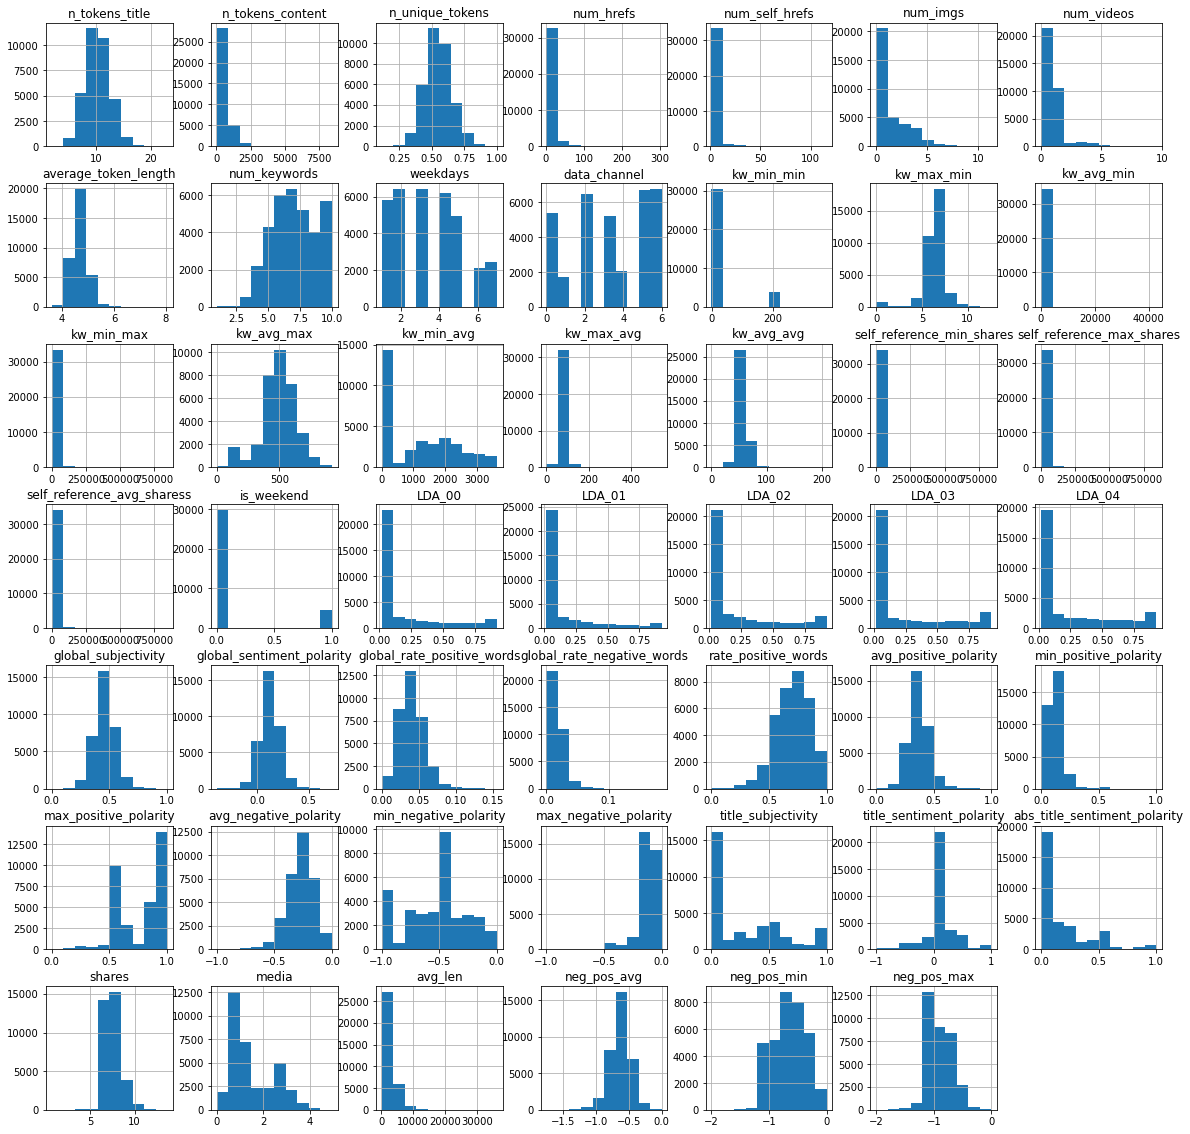

In [456]:
dataset.hist(figsize=(20,20))

In [457]:
categorical = ['data_channel' ,'is_weekend' , 'weekdays']

In [458]:
LDA = ['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']

<AxesSubplot:ylabel='Density'>

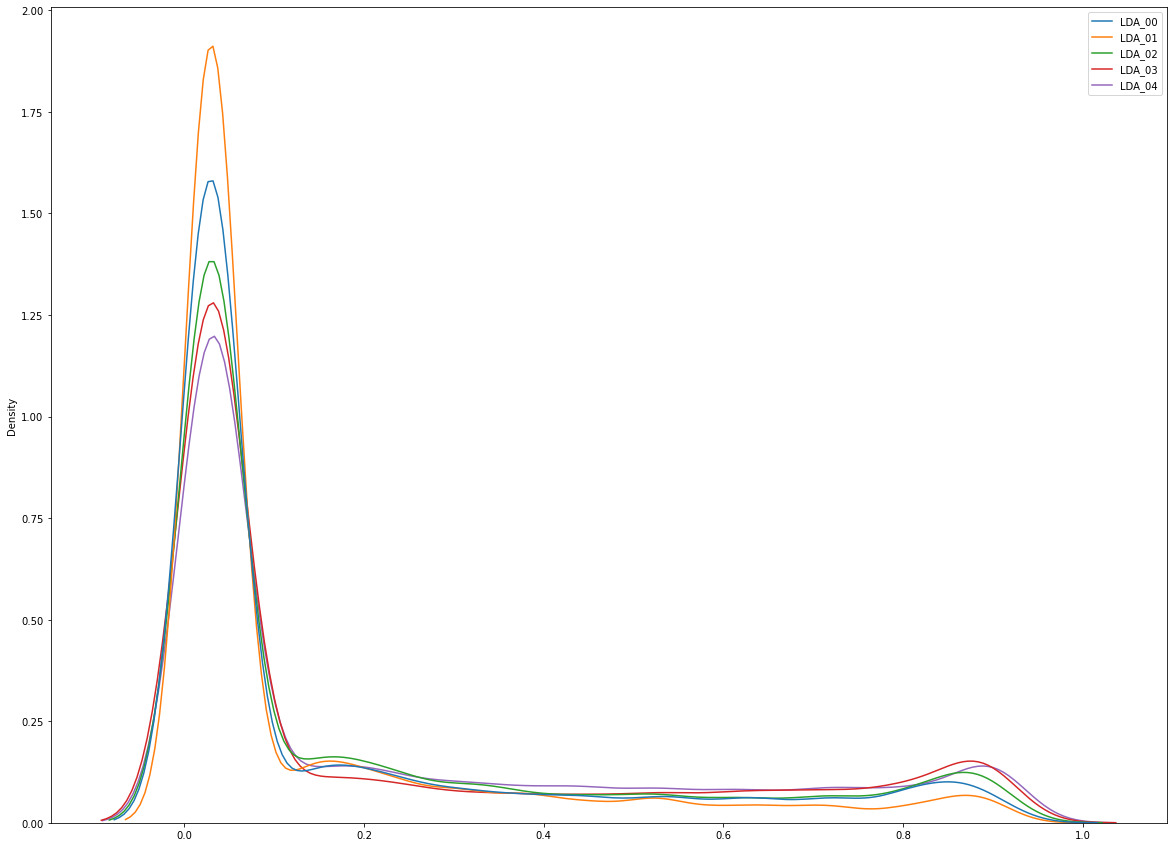

In [459]:
plt.figure(figsize=(20,15))
sns.kdeplot(data=dataset[LDA])

##### Using the Robust scaler for features with more than 1300  

In [460]:
scaler = RobustScaler()

In [461]:
columnsRobust = []

In [462]:
for item in dicto:
    if dicto[item] > 1300:
        columnsRobust.append(item)

In [463]:
columnsRobust

['n_tokens_content',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_avg_max',
 'kw_max_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'is_weekend',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'min_positive_polarity',
 'max_negative_polarity',
 'title_sentiment_polarity',
 'abs_title_sentiment_polarity',
 'avg_len']

In [464]:
columnsRobust.remove('is_weekend')

In [465]:
len(columnsRobust)

22

In [466]:
scale = RobustScaler().fit(dataset[columnsRobust])

In [467]:
dataset[columnsRobust] = scale.transform(dataset[columnsRobust])

array([[<AxesSubplot:title={'center':'n_tokens_content'}>,
        <AxesSubplot:title={'center':'num_hrefs'}>,
        <AxesSubplot:title={'center':'num_self_hrefs'}>,
        <AxesSubplot:title={'center':'num_imgs'}>,
        <AxesSubplot:title={'center':'num_videos'}>],
       [<AxesSubplot:title={'center':'kw_min_min'}>,
        <AxesSubplot:title={'center':'kw_max_min'}>,
        <AxesSubplot:title={'center':'kw_avg_min'}>,
        <AxesSubplot:title={'center':'kw_min_max'}>,
        <AxesSubplot:title={'center':'kw_avg_max'}>],
       [<AxesSubplot:title={'center':'kw_max_avg'}>,
        <AxesSubplot:title={'center':'self_reference_min_shares'}>,
        <AxesSubplot:title={'center':'self_reference_max_shares'}>,
        <AxesSubplot:title={'center':'self_reference_avg_sharess'}>,
        <AxesSubplot:title={'center':'LDA_00'}>],
       [<AxesSubplot:title={'center':'LDA_01'}>,
        <AxesSubplot:title={'center':'LDA_02'}>,
        <AxesSubplot:title={'center':'min_positive_pola

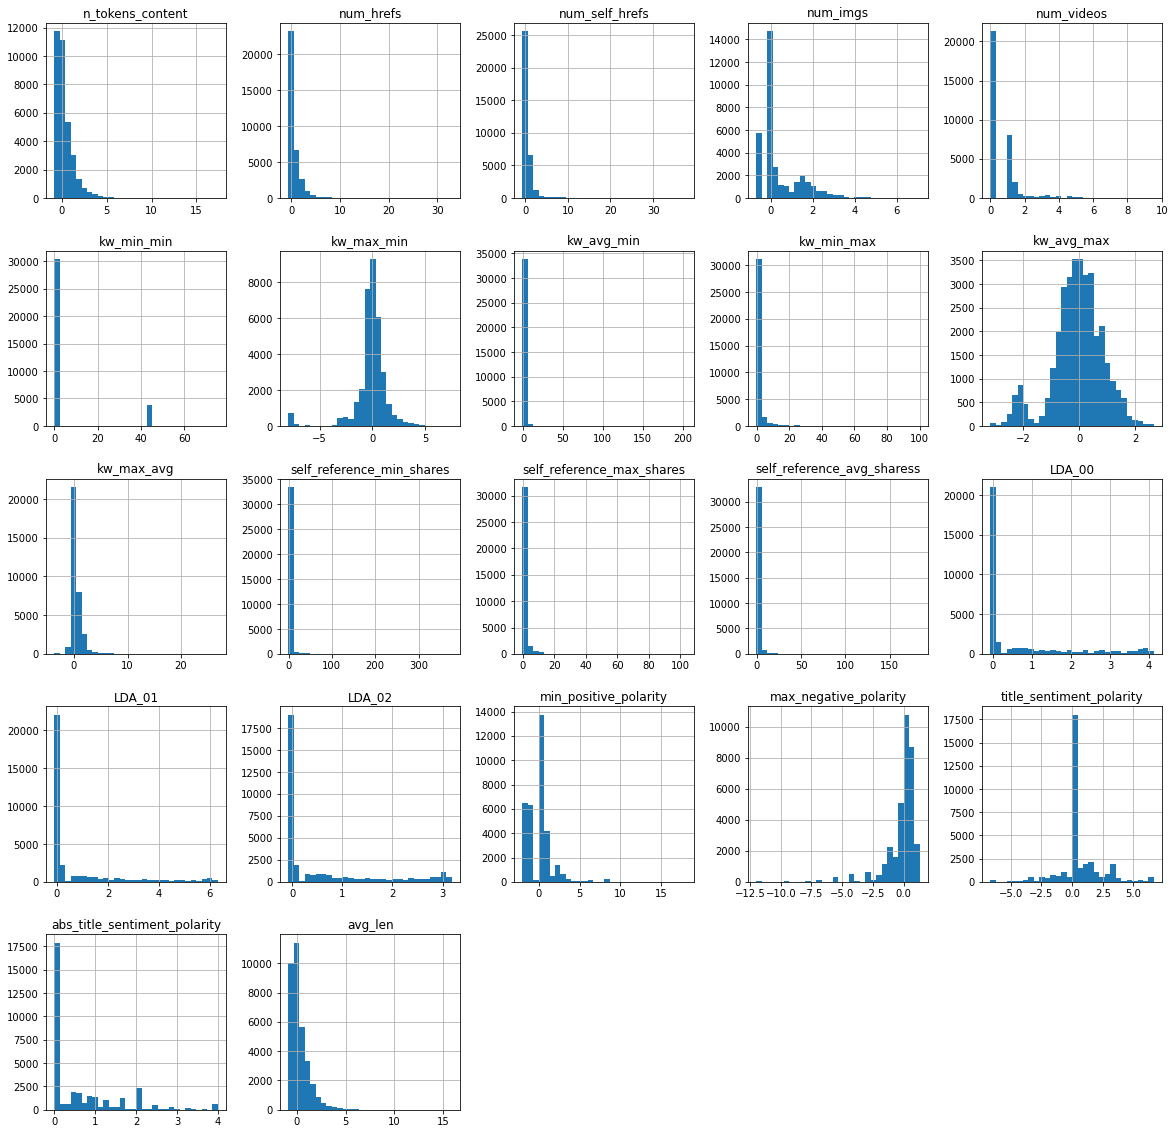

In [468]:
dataset[columnsRobust].hist(bins=30,figsize=(20,20))

In [469]:
others = []

In [470]:
for item in dicto:
    if dicto[item] <= 1300:
        others.append(item)

In [471]:
others

['n_tokens_title',
 'n_unique_tokens',
 'average_token_length',
 'num_keywords',
 'weekdays',
 'data_channel',
 'kw_min_avg',
 'kw_avg_avg',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 'avg_positive_polarity',
 'max_positive_polarity',
 'avg_negative_polarity',
 'min_negative_polarity',
 'title_subjectivity',
 'shares',
 'media',
 'neg_pos_avg',
 'neg_pos_min',
 'neg_pos_max']

In [472]:
others.remove('weekdays')
others.remove('data_channel')

In [473]:
elseData = dataset[others]

array([[<AxesSubplot:title={'center':'n_tokens_title'}>,
        <AxesSubplot:title={'center':'n_unique_tokens'}>,
        <AxesSubplot:title={'center':'average_token_length'}>,
        <AxesSubplot:title={'center':'num_keywords'}>,
        <AxesSubplot:title={'center':'kw_min_avg'}>],
       [<AxesSubplot:title={'center':'kw_avg_avg'}>,
        <AxesSubplot:title={'center':'LDA_03'}>,
        <AxesSubplot:title={'center':'LDA_04'}>,
        <AxesSubplot:title={'center':'global_subjectivity'}>,
        <AxesSubplot:title={'center':'global_sentiment_polarity'}>],
       [<AxesSubplot:title={'center':'global_rate_positive_words'}>,
        <AxesSubplot:title={'center':'global_rate_negative_words'}>,
        <AxesSubplot:title={'center':'rate_positive_words'}>,
        <AxesSubplot:title={'center':'avg_positive_polarity'}>,
        <AxesSubplot:title={'center':'max_positive_polarity'}>],
       [<AxesSubplot:title={'center':'avg_negative_polarity'}>,
        <AxesSubplot:title={'center':'

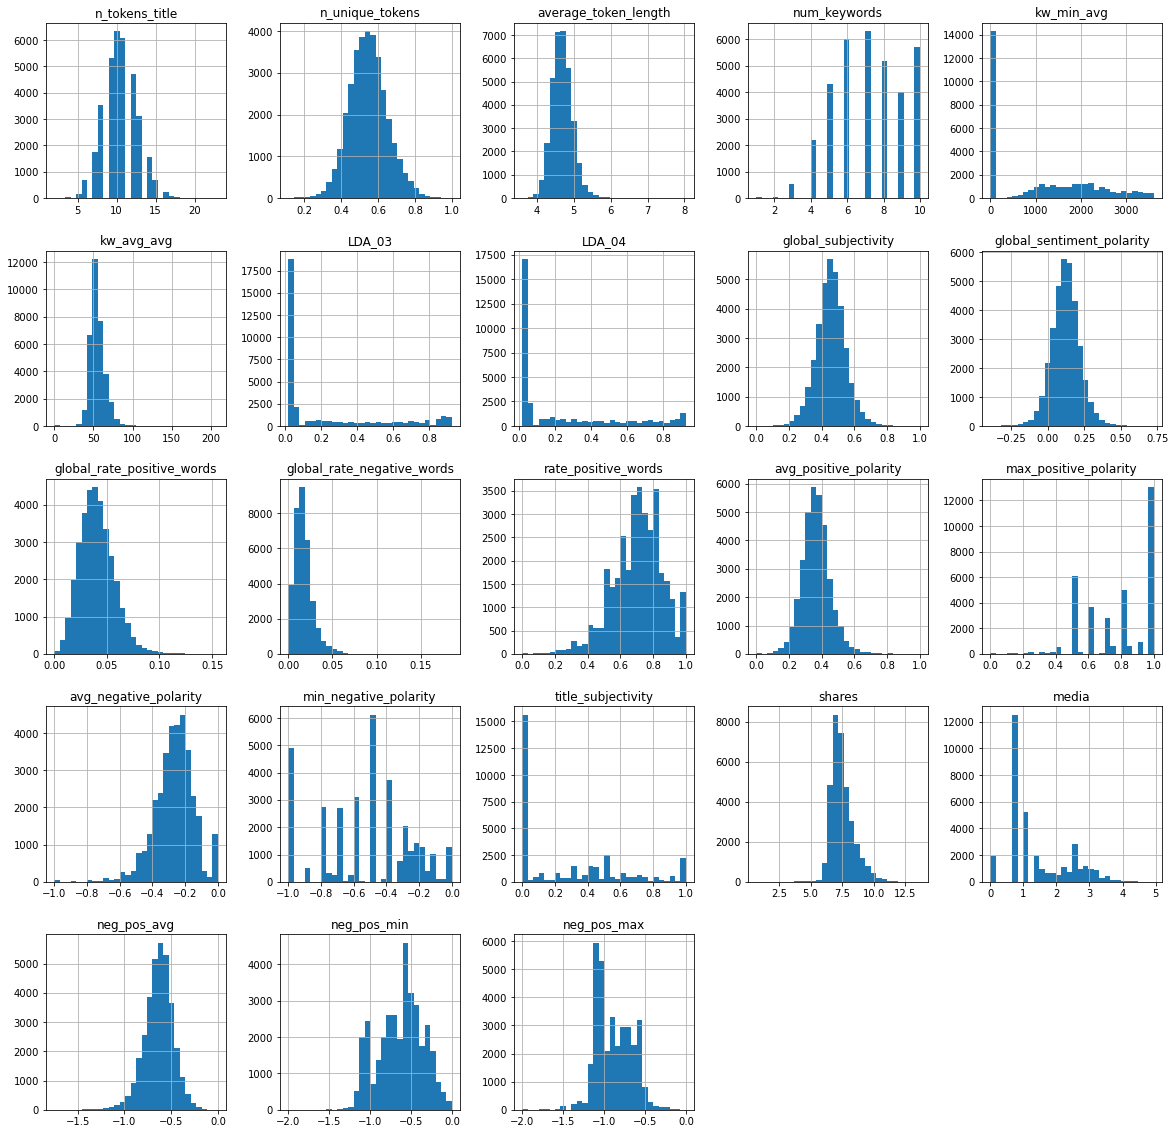

In [474]:
elseData.hist(bins=30,figsize=(20,20))

In [475]:
Normal = MinMaxScaler().fit(dataset[others])

In [476]:
dataset[others] = Normal.transform(dataset[others])

array([[<AxesSubplot:title={'center':'n_tokens_title'}>,
        <AxesSubplot:title={'center':'n_tokens_content'}>,
        <AxesSubplot:title={'center':'n_unique_tokens'}>,
        <AxesSubplot:title={'center':'num_hrefs'}>,
        <AxesSubplot:title={'center':'num_self_hrefs'}>,
        <AxesSubplot:title={'center':'num_imgs'}>,
        <AxesSubplot:title={'center':'num_videos'}>],
       [<AxesSubplot:title={'center':'average_token_length'}>,
        <AxesSubplot:title={'center':'num_keywords'}>,
        <AxesSubplot:title={'center':'weekdays'}>,
        <AxesSubplot:title={'center':'data_channel'}>,
        <AxesSubplot:title={'center':'kw_min_min'}>,
        <AxesSubplot:title={'center':'kw_max_min'}>,
        <AxesSubplot:title={'center':'kw_avg_min'}>],
       [<AxesSubplot:title={'center':'kw_min_max'}>,
        <AxesSubplot:title={'center':'kw_avg_max'}>,
        <AxesSubplot:title={'center':'kw_min_avg'}>,
        <AxesSubplot:title={'center':'kw_max_avg'}>,
        <AxesSub

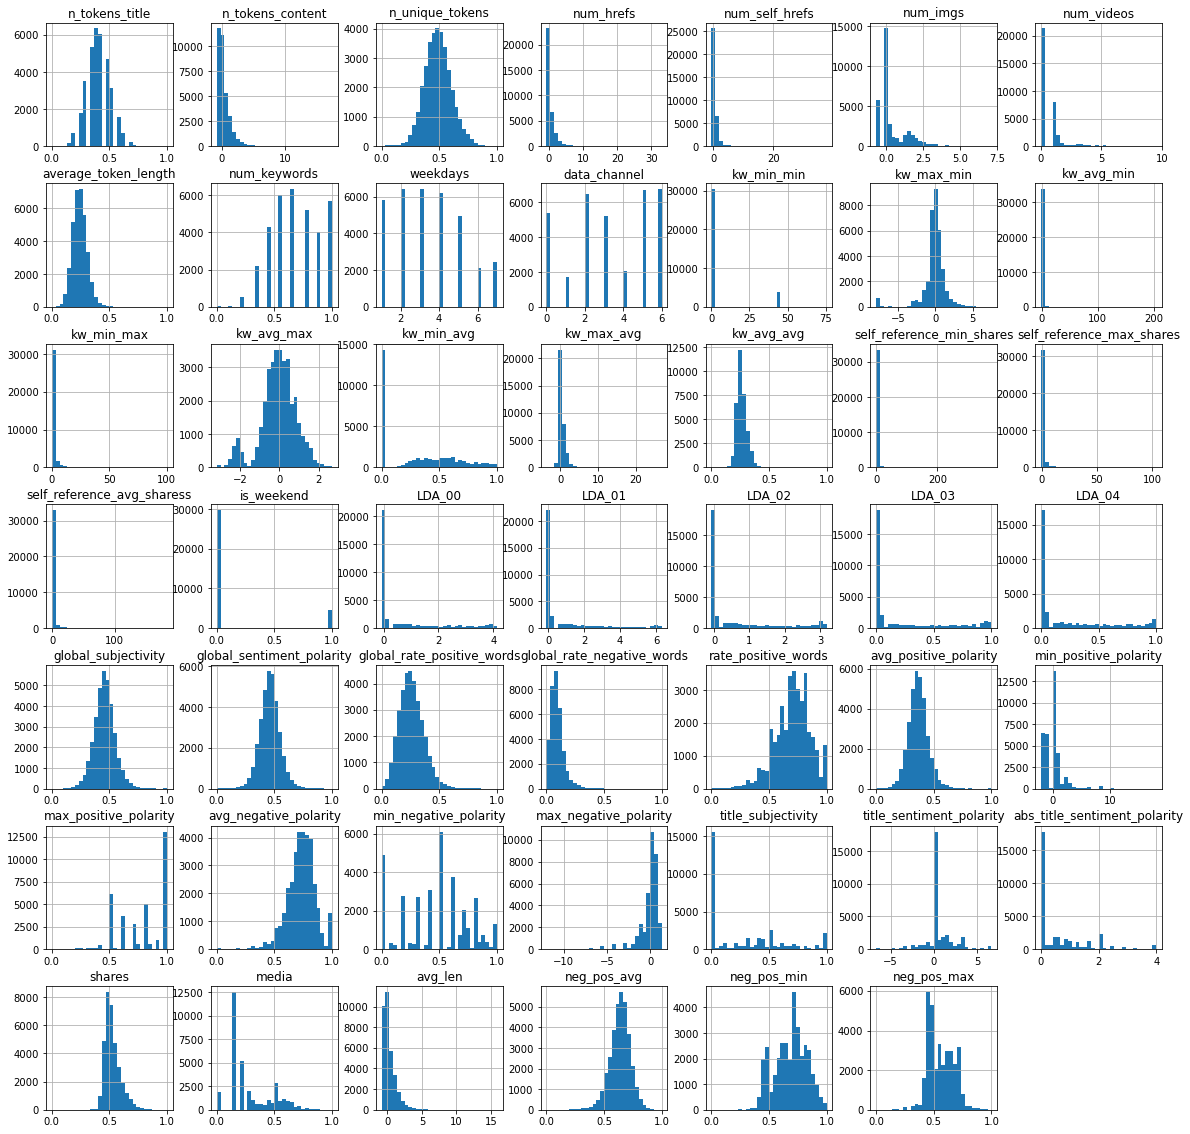

In [477]:
dataset.hist(bins=30,figsize=(20,20))

In [478]:
simpleLinear(dataset)
ridge_regression(dataset,10)
lasso_regression(dataset,10)


Linear Model............................................

MAE : 0.049787095087776435
MSE : 0.004447808465286461
RMSE : 0.06669189205058185
r2_score : 0.11723110156833583  12.0

Ridge Model............................................

The train score for ridge model is 0.10695438696269477
The test score for ridge model is 0.10963325071325125
MAE : 0.050119141400555164
MSE : 0.004486090042051646
r2_score : 0.10963325071325125  11.0

Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.00024812584822586636
MAE : 0.05409789631295404
MSE : 0.005039724541087296
r2_score : -0.00024812584822586636  -0.0


# 

<a name="5.5"></a>
## 4.Apply the feature selection methods that you have implemented in the above sections.

Well we have already dropped two non-predictive feature (url and timedelta)<br>

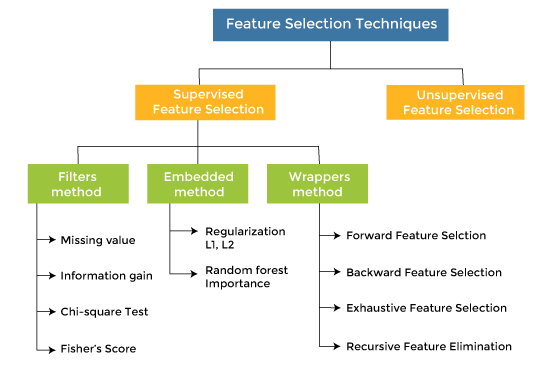

In [201]:
dataset

n_tokens_title  n_tokens_content  n_unique_tokens  num_hrefs  \
0            0.476190         -0.407328         0.619896  -0.333333   
1            0.333333         -0.329741         0.553400  -0.444444   
2            0.333333         -0.424569         0.519940  -0.444444   
4            0.523810          1.431034         0.339740   1.333333   
5            0.380952         -0.081897         0.502719  -0.555556   
...               ...               ...              ...        ...   
39639        0.428571         -0.133621         0.467877   0.222222   
39640        0.476190         -0.172414         0.656846   0.222222   
39641        0.380952          0.073276         0.453531   1.888889   
39642        0.190476          0.590517         0.479675   0.333333   
39643        0.380952         -0.540948         0.663276  -0.666667   

       num_self_hrefs  num_imgs  num_videos  average_token_length  \
0           -0.333333  0.000000    0.000000              0.243242   
1           -0.666667  0.000000    0.000000              0.295782   
2           -0.666667  0.000000    0.000000              0.178624   
4            5.333333  2.395419    0.000000              0.243798   
5           -0.333333 -0.689898    0.000000              0.170990   
...               ...       ...         ...                   ...   
39639        1.333333  0.000000    1.000000              0.207838   
39640        1.333333  0.505040    6.928203              0.181354   
39641       -0.666667  1.699979    1.000000              0.332525   
39642       -0.666667  0.000000    0.000000              0.309594   
39643       -0.666667 -0.689898    1.414214              0.196179   

       num_keywords  weekdays  data_channel  kw_min_min   kw_max_min  \
0          0.444444         1             2         0.2    -7.446974   
1          0.333333         1             3         0.2    -7.446974   
2          0.555556         1             3         0.2   913.589588   
4          0.666667         1             5         0.2   508.562329   
5          0.888889         1             5         0.2   390.715415   
...             ...       ...           ...         ...          ...   
39639      0.777778         3             5         0.0     0.000000   
39640      0.666667         3             4         0.0    -0.097850   
39641      0.777778         3             0         0.0     0.033604   
39642      0.444444         3             6         0.0  1108.094203   
39643      0.333333         3             2         0.0    -2.212843   

       kw_avg_min  kw_min_max  kw_avg_max  kw_min_avg  kw_max_avg  kw_avg_avg  \
0       -1.105258   -0.190476   -3.173154    0.000277   -3.689667    0.000000   
1       -1.105258   -0.190476   -3.173154    0.000277   -3.689667    0.000000   
2       -1.105258   -0.190476   -3.173154    0.000277   -3.689667    0.000000   
4       -1.105258   -0.190476   -3.173154    0.000277   -3.689667    0.000000   
5       -1.105258   -0.190476   -3.173154    0.000277   -3.689667    0.000000   
...           ...         ...         ...         ...         ...         ...   
39639   -0.276115    3.011905    0.724079    0.696103   -0.149247    0.263766   
39640   -0.224032    0.583333   -0.377232    0.460777    0.448324    0.279834   
39641   -0.299463    0.547619    0.288616    0.485574    0.951264    0.310724   
39642   -1.110047   -0.190476    0.038225    0.000277   -0.434864    0.202009   
39643   -0.992710   24.285714    0.678272    0.840079   -0.326457    0.275088   

       self_reference_min_shares  self_reference_max_shares  \
0                      -0.404837                  -0.395556   
1                      -0.626959                  -0.456790   
2                      -0.215853                  -0.343457   
4                      -0.382893                   1.518519   
5                       3.179579                   0.592593   
...                          ...                        ...   
39639                   4.478280              


### 1. Wrappers methods
code:- [Exercise 10](#4)

**forward selection**

In [223]:
#10 features

In [224]:
scratch10_forward = forward_selection(dataset,10)
sfs10 = Forward_SFS(dataset,10)

In [225]:
scratch10_forward.append('shares')
sfs10.append('shares')

In [226]:
simpleLinear(dataset[scratch10_forward])
ridge_regression(dataset[scratch10_forward],10)
lasso_regression(dataset[scratch10_forward],10)


Linear Model............................................

MAE : 0.05022320423976347
MSE : 0.004496271738988787
RMSE : 0.06705424474996931
r2_score : 0.10761246104581967  11.0

Ridge Model............................................

The train score for ridge model is 0.0975455984328214
The test score for ridge model is 0.10538692550654949
MAE : 0.05033278840954008
MSE : 0.004507485042752601
r2_score : 0.10538692550654949  11.0

Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.00024812584822586636
MAE : 0.05409789631295404
MSE : 0.005039724541087296
r2_score : -0.00024812584822586636  -0.0


In [227]:
simpleLinear(dataset[sfs10])
ridge_regression(dataset[sfs10],10)
lasso_regression(dataset[sfs10],10)


Linear Model............................................

MAE : 0.05021964157480449
MSE : 0.004514142504966904
RMSE : 0.06718736864148576
r2_score : 0.10406560049196345  10.0

Ridge Model............................................

The train score for ridge model is 0.09889315602284288
The test score for ridge model is 0.10271664117516477
MAE : 0.05030366606818933
MSE : 0.00452093920190451
r2_score : 0.10271664117516477  10.0

Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.00024812584822586636
MAE : 0.05409789631295404
MSE : 0.005039724541087296
r2_score : -0.00024812584822586636  -0.0


In [228]:
#20 features

In [229]:
scratch20_forward = forward_selection(dataset,20)
sfs20 = Forward_SFS(dataset,20)

In [230]:
scratch20_forward.append('shares')
sfs20.append('shares')

In [231]:
simpleLinear(dataset[scratch20_forward])
ridge_regression(dataset[scratch20_forward],10)
lasso_regression(dataset[scratch20_forward],10)


Linear Model............................................

MAE : 0.04987858062894027
MSE : 0.0044512621897896355
RMSE : 0.0667177801623348
r2_score : 0.11654563127460615  12.0

Ridge Model............................................

The train score for ridge model is 0.10130959240532167
The test score for ridge model is 0.10925385472947424
MAE : 0.050255254563513256
MSE : 0.004488001618990227
r2_score : 0.10925385472947424  11.0

Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.00024812584822586636
MAE : 0.05409789631295404
MSE : 0.005039724541087296
r2_score : -0.00024812584822586636  -0.0


In [232]:
simpleLinear(dataset[sfs20])
ridge_regression(dataset[sfs20],10)
lasso_regression(dataset[sfs20],10)


Linear Model............................................

MAE : 0.049820187518791234
MSE : 0.004451693257842113
RMSE : 0.0667210106176616
r2_score : 0.1164600760010811  12.0

Ridge Model............................................

The train score for ridge model is 0.10461740862919855
The test score for ridge model is 0.10928532398253654
MAE : 0.050165662755702466
MSE : 0.0044878430619653764
r2_score : 0.10928532398253654  11.0

Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.00024812584822586636
MAE : 0.05409789631295404
MSE : 0.005039724541087296
r2_score : -0.00024812584822586636  -0.0


In [233]:
#30 features

In [234]:
scratch30_forward = forward_selection(dataset,30)
sfs30 = Forward_SFS(dataset,30)

In [235]:
scratch30_forward.append('shares')
sfs30.append('shares')

In [236]:
simpleLinear(dataset[scratch30_forward])
ridge_regression(dataset[scratch30_forward],10)
lasso_regression(dataset[scratch30_forward],10)


Linear Model............................................

MAE : 0.049780676306150504
MSE : 0.004444523411480211
RMSE : 0.06666725891680421
r2_score : 0.11788309532041963  12.0

Ridge Model............................................

The train score for ridge model is 0.1049787619301843
The test score for ridge model is 0.10963554826823285
MAE : 0.050152668692952415
MSE : 0.004486078465879768
r2_score : 0.10963554826823285  11.0

Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.00024812584822586636
MAE : 0.05409789631295404
MSE : 0.005039724541087296
r2_score : -0.00024812584822586636  -0.0


In [237]:
simpleLinear(dataset[sfs30])
ridge_regression(dataset[sfs30],10)
lasso_regression(dataset[sfs30],10)


Linear Model............................................

MAE : 0.04979455111328965
MSE : 0.0044459301616880335
RMSE : 0.06667780861492101
r2_score : 0.11760389369988677  12.0

Ridge Model............................................

The train score for ridge model is 0.10654595696752833
The test score for ridge model is 0.1094601173842299
MAE : 0.05015236459158638
MSE : 0.00448696236989171
r2_score : 0.1094601173842299  11.0

Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.00024812584822586636
MAE : 0.05409789631295404
MSE : 0.005039724541087296
r2_score : -0.00024812584822586636  -0.0


In [238]:
#40 features

In [239]:
scratch40_forward = forward_selection(dataset,40)
sfs40 = Forward_SFS(dataset,40)

In [240]:
scratch40_forward.append('shares')
sfs40.append('shares')

In [241]:
simpleLinear(dataset[scratch40_forward])
ridge_regression(dataset[scratch40_forward],10)
lasso_regression(dataset[scratch40_forward],10)


Linear Model............................................

MAE : 0.04977027568003537
MSE : 0.004444653579904456
RMSE : 0.06666823516416537
r2_score : 0.1178572604317597  12.0

Ridge Model............................................

The train score for ridge model is 0.1057912024428691
The test score for ridge model is 0.11017148571926216
MAE : 0.050121815936052756
MSE : 0.0044833781587713195
r2_score : 0.11017148571926216  11.0

Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.00024812584822586636
MAE : 0.05409789631295404
MSE : 0.005039724541087296
r2_score : -0.00024812584822586636  -0.0


In [242]:
simpleLinear(dataset[sfs40])
ridge_regression(dataset[sfs40],10)
lasso_regression(dataset[sfs40],10)


Linear Model............................................

MAE : 0.04978448429933722
MSE : 0.004447385907268924
RMSE : 0.06668872398890928
r2_score : 0.11731496783159245  12.0

Ridge Model............................................

The train score for ridge model is 0.10695344863354495
The test score for ridge model is 0.10963774856287523
MAE : 0.05011922641891463
MSE : 0.004486067379751616
r2_score : 0.10963774856287523  11.0

Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.00024812584822586636
MAE : 0.05409789631295404
MSE : 0.005039724541087296
r2_score : -0.00024812584822586636  -0.0


**Polynomial Regression**

In [243]:
#degree = 2

In [244]:
polynomial(2,dataset[scratch40_forward])


Polynomial Model........................................

MAE : 0.04868348746777315
MSE : 0.0043910541684915125
RMSE : 0.06626502975545633
r2_score : 0.12849528446963654  13.0


In [245]:
polynomial(2,dataset[scratch30_forward])


Polynomial Model........................................

MAE : 0.048559386648008254
MSE : 0.004436327170017757
RMSE : 0.06660575928564855
r2_score : 0.11950982612583982  12.0


In [246]:
polynomial(2,dataset[scratch20_forward])


Polynomial Model........................................

MAE : 0.048774347285023806
MSE : 0.004427818030827651
RMSE : 0.06654185172376594
r2_score : 0.12119865861223789  12.0


In [247]:
polynomial(2,dataset[scratch10_forward])


Polynomial Model........................................

MAE : 0.049256186584902426
MSE : 0.004404655394189925
RMSE : 0.06636757788400843
r2_score : 0.1257958114323383  13.0


In [248]:
#degree = 3

In [249]:
polynomial(3,dataset[scratch30_forward])


Polynomial Model........................................

MAE : 0.07001423139947488
MSE : 0.2669372153965609
RMSE : 0.5166596707665123
r2_score : -51.9797704701435  -5198.0


In [250]:
polynomial(3,dataset[scratch20_forward])


Polynomial Model........................................

MAE : 0.05377163794192986
MSE : 0.034853462384816424
RMSE : 0.1866908203014182
r2_score : -5.917463473551856  -592.0


In [251]:
polynomial(3,dataset[scratch10_forward])


Polynomial Model........................................

MAE : 0.04926228076754164
MSE : 0.0044308216655263
RMSE : 0.06656441741295645
r2_score : 0.1206025188919887  12.0


In [252]:
#degree = 4

In [253]:
polynomial(3,dataset[scratch10_forward])


Polynomial Model........................................

MAE : 0.04926228076754164
MSE : 0.0044308216655263
RMSE : 0.06656441741295645
r2_score : 0.1206025188919887  12.0


# 

**Backward selcetion**

In [216]:
#10 features

In [498]:
scratch10_backward = backwardSelection(dataset, 10)
sbs10 = Backward_SBS(dataset,10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    6.8s finished
Features: 46/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    6.6s finished
Features: 45/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    6.4s finished
Features: 44/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    6.0s finished
Features: 43/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    5.9s finished
Features: 42/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    5.5s finished
Features: 41/10[Par

In [502]:
scratch10_backward.append('shares')
sbs10.append('shares')

In [505]:
scratch10_backward

['self_reference_min_shares',
 'media',
 'num_keywords',
 'LDA_00',
 'kw_max_avg',
 'kw_min_avg',
 'kw_min_min',
 'is_weekend',
 'num_hrefs',
 'LDA_04',
 'shares']

In [506]:
sbs10

['kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_avg_sharess',
 'is_weekend',
 'LDA_00',
 'LDA_04',
 'global_subjectivity',
 'media',
 'shares']

In [503]:
simpleLinear(dataset[scratch10_backward])
ridge_regression(dataset[scratch10_backward],10)
lasso_regression(dataset[scratch10_backward],10)


Linear Model............................................

MAE : 0.05099087060934361
MSE : 0.004609567767511667
RMSE : 0.06789379771018607
r2_score : 0.08512628362239871  9.0

Ridge Model............................................

The train score for ridge model is 0.07609211515591197
The test score for ridge model is 0.08511701699053231
MAE : 0.050992479567697216
MSE : 0.004609614457198779
r2_score : 0.08511701699053231  9.0

Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.00024812584822586636
MAE : 0.05409789631295404
MSE : 0.005039724541087296
r2_score : -0.00024812584822586636  -0.0


In [504]:
simpleLinear(dataset[sbs10])
ridge_regression(dataset[sbs10],10)
lasso_regression(dataset[sbs10],10)


Linear Model............................................

MAE : 0.050152535291464136
MSE : 0.0045086151050355685
RMSE : 0.067146221822494
r2_score : 0.10516263890687239  11.0

Ridge Model............................................

The train score for ridge model is 0.09657385415469744
The test score for ridge model is 0.09742949824791025
MAE : 0.05047679456290594
MSE : 0.004547578336009485
r2_score : 0.09742949824791025  10.0

Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.00024812584822586636
MAE : 0.05409789631295404
MSE : 0.005039724541087296
r2_score : -0.00024812584822586636  -0.0


In [221]:
#20 features

In [507]:
scratch20_backward = backwardSelection(dataset, 20)
sbs20 = Backward_SBS(dataset,20)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    7.5s finished
Features: 46/20[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    7.4s finished
Features: 45/20[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    7.3s finished
Features: 44/20[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    7.1s finished
Features: 43/20[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    6.3s finished
Features: 42/20[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    5.8s finished
Features: 41/20[Par

In [508]:
scratch20_backward.append('shares')
sbs20.append('shares')

In [509]:
simpleLinear(dataset[scratch20_backward])
ridge_regression(dataset[scratch20_backward],10)
lasso_regression(dataset[scratch20_backward],10)


Linear Model............................................

MAE : 0.050734279112021455
MSE : 0.004564071989642118
RMSE : 0.06755791581777902
r2_score : 0.09415595700573931  9.0

Ridge Model............................................

The train score for ridge model is 0.08955958928622221
The test score for ridge model is 0.09423506818340033
MAE : 0.05073871232004646
MSE : 0.004563673390001459
r2_score : 0.09423506818340033  9.0

Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.00024812584822586636
MAE : 0.05409789631295404
MSE : 0.005039724541087296
r2_score : -0.00024812584822586636  -0.0


In [510]:
simpleLinear(dataset[sbs20])
ridge_regression(dataset[sbs20],10)
lasso_regression(dataset[sbs20],10)


Linear Model............................................

MAE : 0.04984469182918391
MSE : 0.0044605122493864054
RMSE : 0.06678706648286332
r2_score : 0.11470974625743469  11.0

Ridge Model............................................

The train score for ridge model is 0.10342479432207108
The test score for ridge model is 0.10693048346954326
MAE : 0.05020481573549615
MSE : 0.004499707865524607
r2_score : 0.10693048346954326  11.0

Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.00024812584822586636
MAE : 0.05409789631295404
MSE : 0.005039724541087296
r2_score : -0.00024812584822586636  -0.0


In [226]:
#30 features

In [511]:
scratch30_backward = backwardSelection(dataset, 30)
sbs30 = Backward_SBS(dataset,30)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    7.2s finished
Features: 46/30[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    6.9s finished
Features: 45/30[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    6.6s finished
Features: 44/30[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    6.3s finished
Features: 43/30[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    6.0s finished
Features: 42/30[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    5.8s finished
Features: 41/30[Par

In [512]:
scratch30_backward.append('shares')
sbs30.append('shares')

In [513]:
simpleLinear(dataset[scratch30_backward])
ridge_regression(dataset[scratch30_backward],10)
lasso_regression(dataset[scratch30_backward],10)


Linear Model............................................

MAE : 0.0505659755980215
MSE : 0.004550877129891829
RMSE : 0.06746018922217628
r2_score : 0.09677477746476548  10.0

Ridge Model............................................

The train score for ridge model is 0.0940630961903901
The test score for ridge model is 0.0968180755870599
MAE : 0.050573080709110846
MSE : 0.0045506589734125805
r2_score : 0.0968180755870599  10.0

Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.00024812584822586636
MAE : 0.05409789631295404
MSE : 0.005039724541087296
r2_score : -0.00024812584822586636  -0.0


In [514]:
simpleLinear(dataset[sbs30])
ridge_regression(dataset[sbs30],10)
lasso_regression(dataset[sbs30],10)


Linear Model............................................

MAE : 0.049837192088662004
MSE : 0.004458267952591268
RMSE : 0.06677026248706282
r2_score : 0.11515517807516218  12.0

Ridge Model............................................

The train score for ridge model is 0.10388069252601129
The test score for ridge model is 0.10734037165339783
MAE : 0.05019299329458933
MSE : 0.004497642654417592
r2_score : 0.10734037165339783  11.0

Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.00024812584822586636
MAE : 0.05409789631295404
MSE : 0.005039724541087296
r2_score : -0.00024812584822586636  -0.0


In [231]:
#40 features

In [515]:
scratch40_backward = backwardSelection(dataset, 40)
sbs40 = Backward_SBS(dataset,40)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    7.2s finished
Features: 46/40[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    6.9s finished
Features: 45/40[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    6.6s finished
Features: 44/40[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    6.3s finished
Features: 43/40[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    6.0s finished
Features: 42/40[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    5.7s finished
Features: 41/40[Par

In [516]:
scratch40_backward.append('shares')
sbs40.append('shares')

In [517]:
simpleLinear(dataset[scratch40_backward])
ridge_regression(dataset[scratch40_backward],10)
lasso_regression(dataset[scratch40_backward],10)


Linear Model............................................

MAE : 0.050571606086448395
MSE : 0.004551775628434176
RMSE : 0.06746684836595064
r2_score : 0.09659644996378147  10.0

Ridge Model............................................

The train score for ridge model is 0.0941063767643211
The test score for ridge model is 0.0966861506429294
MAE : 0.05057863988116857
MSE : 0.004551323673861734
r2_score : 0.0966861506429294  10.0

Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.00024812584822586636
MAE : 0.05409789631295404
MSE : 0.005039724541087296
r2_score : -0.00024812584822586636  -0.0


In [518]:
simpleLinear(dataset[sbs40])
ridge_regression(dataset[sbs40],10)
lasso_regression(dataset[sbs40],10)


Linear Model............................................

MAE : 0.04984592477635207
MSE : 0.004461873247387708
RMSE : 0.06679725478930783
r2_score : 0.11443962520439144  11.0

Ridge Model............................................

The train score for ridge model is 0.10484465451523461
The test score for ridge model is 0.10622007242669251
MAE : 0.05020268717233091
MSE : 0.004503287253352881
r2_score : 0.10622007242669251  11.0

Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.00024812584822586636
MAE : 0.05409789631295404
MSE : 0.005039724541087296
r2_score : -0.00024812584822586636  -0.0


# 

### Tree based method Feature importance

#### 1.Random Forest Built-in Feature Importance

In [205]:
def informationGain(dataset,n):
    X = dataset[dataset.columns.difference(['shares'])]
    Y = dataset['shares']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/5, random_state = 0 )
    rf = RandomForestRegressor(n_estimators=n)
    rf.fit(X,  Y)
    sorted_idx = rf.feature_importances_.argsort()
    plt.figure(figsize=(20,20))
    plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
    return dataset.columns[sorted_idx]

Index(['kw_avg_max', 'LDA_00', 'min_negative_polarity', 'LDA_02', 'LDA_04',
       'title_subjectivity', 'num_imgs', 'data_channel', 'global_subjectivity',
       'LDA_01', 'max_negative_polarity', 'neg_pos_avg', 'LDA_03',
       'avg_negative_polarity', 'is_weekend', 'avg_len',
       'min_positive_polarity', 'neg_pos_min', 'avg_positive_polarity',
       'global_rate_positive_words', 'global_sentiment_polarity',
       'self_reference_avg_sharess', 'title_sentiment_polarity', 'shares',
       'average_token_length', 'num_keywords', 'rate_positive_words',
       'kw_min_min', 'self_reference_max_shares', 'kw_avg_min', 'weekdays',
       'n_unique_tokens', 'num_hrefs', 'max_positive_polarity',
       'n_tokens_title', 'kw_avg_avg', 'kw_max_min', 'n_tokens_content',
       'global_rate_negative_words', 'num_videos', 'kw_min_max',
       'num_self_hrefs', 'kw_max_avg', 'media', 'self_reference_min_shares',
       'abs_title_sentiment_polarity', 'kw_min_avg'],
      dtype='object')

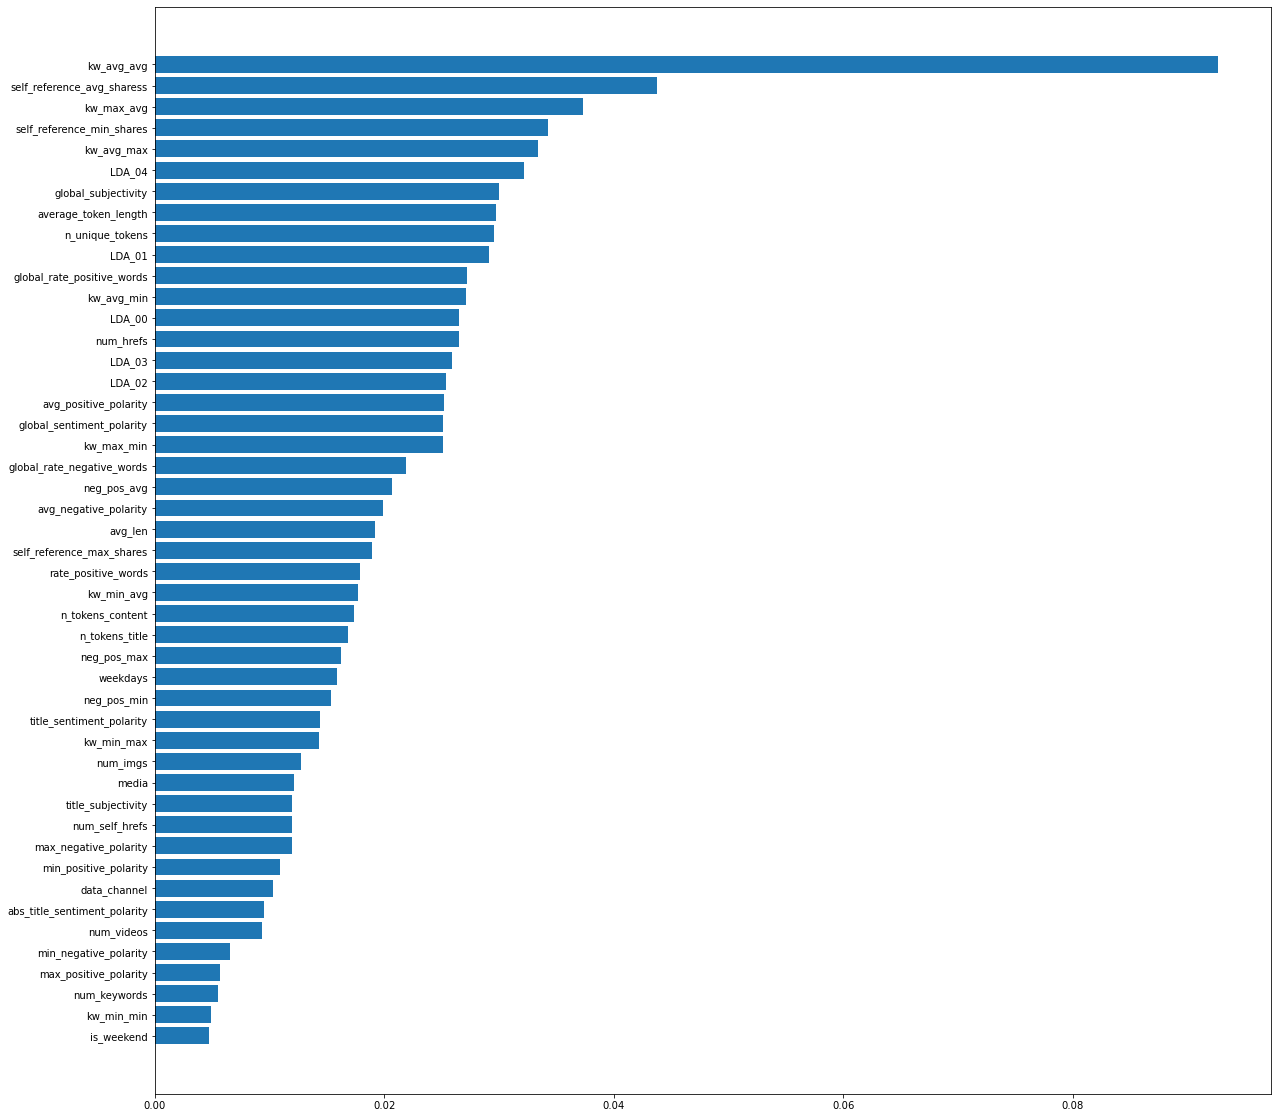

In [206]:
informationGain(dataset,100)

In [196]:
sortList = [['kw_avg_max', 'LDA_00', 'min_negative_polarity', 'LDA_02', 'LDA_04',
       'title_subjectivity', 'num_imgs', 'data_channel', 'global_subjectivity',
       'LDA_01', 'max_negative_polarity', 'neg_pos_avg', 'LDA_03',
       'avg_negative_polarity', 'is_weekend', 'avg_len',
       'min_positive_polarity', 'neg_pos_min', 'avg_positive_polarity',
       'global_rate_positive_words', 'global_sentiment_polarity',
       'self_reference_avg_sharess', 'title_sentiment_polarity', 'shares',
       'average_token_length', 'num_keywords', 'rate_positive_words',
       'kw_min_min', 'self_reference_max_shares', 'kw_avg_min', 'weekdays',
       'n_unique_tokens', 'num_hrefs', 'max_positive_polarity',
       'n_tokens_title', 'kw_avg_avg', 'kw_max_min', 'n_tokens_content',
       'global_rate_negative_words', 'num_videos', 'kw_min_max',
       'num_self_hrefs', 'kw_max_avg', 'media', 'self_reference_min_shares',
       'abs_title_sentiment_polarity', 'kw_min_avg']]

In [197]:
sortList.remove('shares')

In [198]:
#Top 10 Features

In [199]:
list10 = sortList[-10:]
list10.append('shares')

In [259]:
polynomial(2,dataset[list10])

MAE : 0.05092958952889084
MSE : 0.004583979286133878
RMSE : 0.06770509054815507
r2_score : 0.09020490058504604  9.0


In [304]:
polynomial(3,dataset[list10])

MAE : 0.05096046053492994
MSE : 0.004713327825636697
RMSE : 0.06865368035026743
r2_score : 0.06453273672686288  6.0


In [200]:
#Top 15 Features

In [201]:
list15 = sortList[-15:]
list15.append('shares')

In [264]:
polynomial(2,dataset[list15])

MAE : 0.05017333544136189
MSE : 0.004502672679140369
RMSE : 0.06710195734209524
r2_score : 0.10634204867742769  11.0


In [4]:
#Top 25 Features

In [202]:
list25 = sortList[-25:]
list25.append('shares')

In [203]:
polynomial(2,dataset[list25])


Polynomial Model........................................

MAE : 0.04961281960568475
MSE : 0.004542502695658321
RMSE : 0.06739809118705307
r2_score : 0.09843687468432871  10.0


In [5]:
#Top 35 Features

In [209]:
list35 = sortList[-35:]
list35.append('shares')

In [270]:
polynomial(2,dataset[list35])

MAE : 0.049183918013428876
MSE : 0.004494553019660496
RMSE : 0.06704142763739818
r2_score : 0.10795358004408362  11.0


In [6]:
#Top 45 Features

In [204]:
list45 = sortList[-45:]
list45.append('shares')

In [307]:
polynomial(2,dataset[list35])

MAE : 0.049183918013428876
MSE : 0.004494553019660496
RMSE : 0.06704142763739818
r2_score : 0.10795358004408362  11.0


#### 2.Permutation Based Feature
The permutation based importance can be used to overcome drawbacks of default feature importance computed with mean impurity decrease.

In [207]:
def Permutation(dataset,n):
    X = dataset[dataset.columns.difference(['shares'])]
    Y = dataset['shares']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/5, random_state = 0 )
    rf = RandomForestRegressor(n_estimators=n)
    rf.fit(X_train, Y_train)
    perm_importance = permutation_importance(rf, X_test, Y_test)
    plt.figure(figsize=(20,20))
    sorted_idx = perm_importance.importances_mean.argsort()
    plt.barh(X_train.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
    return dataset.columns[sorted_idx]

Index(['num_keywords', 'min_negative_polarity', 'weekdays', 'LDA_01',
       'title_subjectivity', 'num_imgs', 'rate_positive_words', 'neg_pos_avg',
       'LDA_02', 'LDA_04', 'title_sentiment_polarity', 'min_positive_polarity',
       'avg_positive_polarity', 'self_reference_max_shares', 'kw_min_min',
       'global_rate_positive_words', 'max_negative_polarity', 'LDA_03',
       'kw_avg_min', 'global_subjectivity', 'avg_len', 'LDA_00', 'num_videos',
       'kw_max_min', 'n_tokens_content', 'kw_min_max', 'average_token_length',
       'shares', 'is_weekend', 'global_sentiment_polarity',
       'self_reference_avg_sharess', 'global_rate_negative_words',
       'avg_negative_polarity', 'kw_avg_avg', 'kw_avg_max', 'n_unique_tokens',
       'n_tokens_title', 'num_hrefs', 'neg_pos_min', 'kw_max_avg',
       'data_channel', 'max_positive_polarity', 'media', 'num_self_hrefs',
       'abs_title_sentiment_polarity', 'self_reference_min_shares',
       'kw_min_avg'],
      dtype='object')

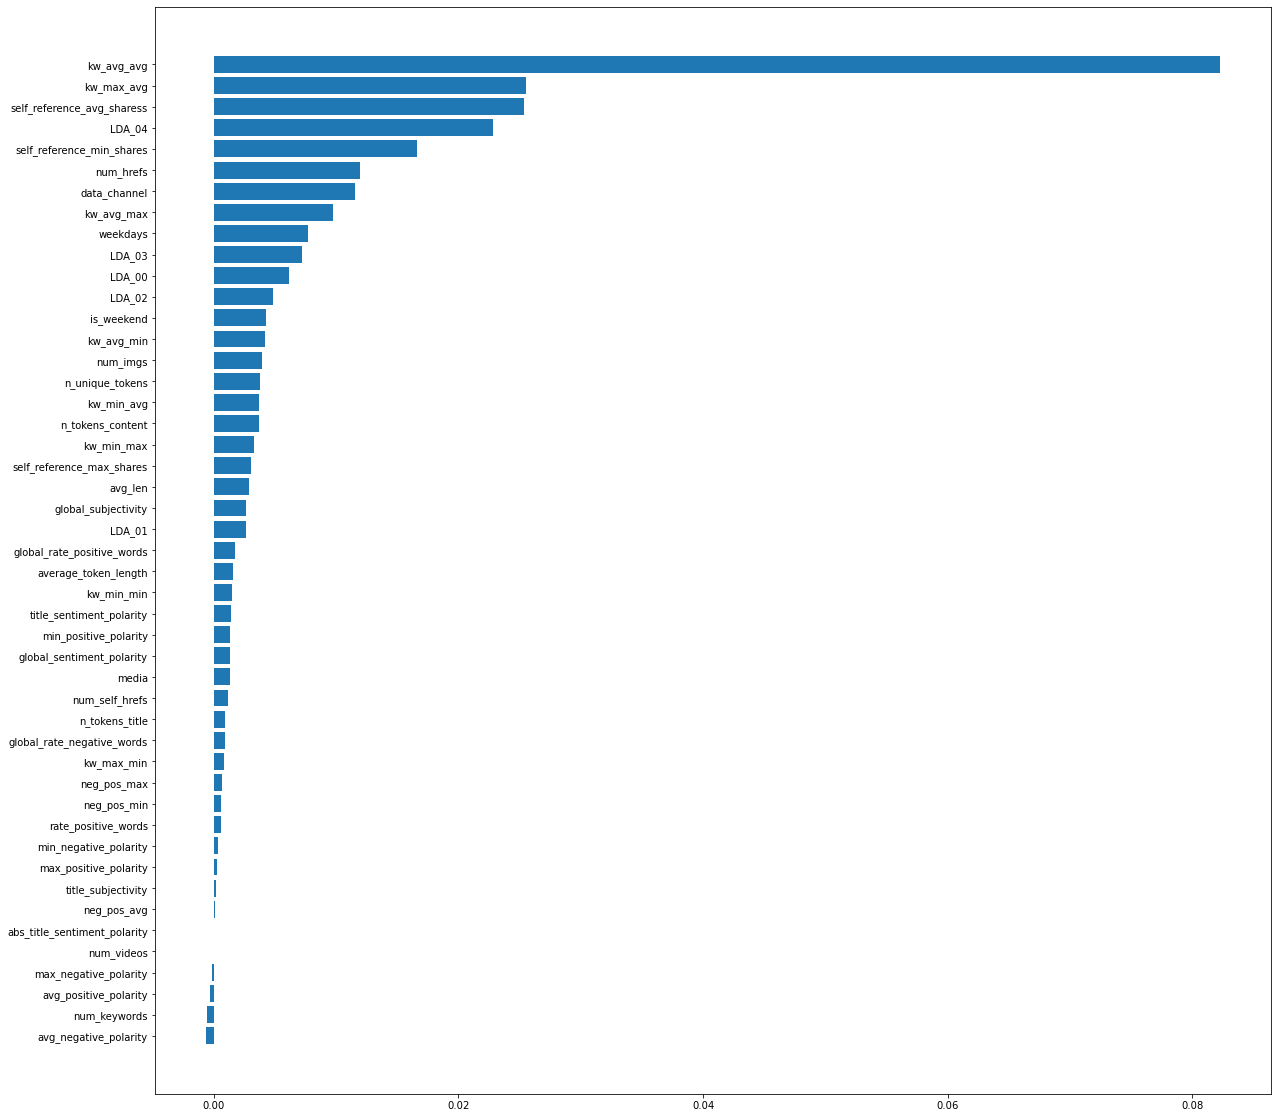

In [208]:
Permutation(dataset,100)

# 

In [ ]:
SHAP(dataset)

# 

<a name="5.6"></a>
### Finding better way

<a name="5.6.0"></a>
**how about using other models**

In [212]:
def regressionTest(dataset):
    simpleLinear(dataset)
    ridge_regression(dataset,10)
    lasso_regression(dataset, 10)
    randomforestReg(dataset)
    gradientBoostingRegressor(dataset)
    svr(dataset)
    

In [214]:
#With all features

In [213]:
regressionTest(dataset)


Linear Model............................................

MAE : 0.049787095087776435
MSE : 0.004447808465286461
RMSE : 0.06669189205058185
r2_score : 0.11723110156833583  12.0

Ridge Model............................................

The train score for ridge model is 0.10695438696269477
The test score for ridge model is 0.10963325071325125
MAE : 0.050119141400555164
MSE : 0.004486090042051646
r2_score : 0.10963325071325125  11.0

Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.00024812584822586636
MAE : 0.05409789631295404
MSE : 0.005039724541087296
r2_score : -0.00024812584822586636  -0.0

RandomForestregressor...................................

MAE : 0.048544176757464634
MSE : 0.004252350004827501
r2_score : 0.15602428503726307  16.0

GradientBoostingRegresso................................

MAE : 0.04791658386715039
MSE : 0.00420438479680897
r2_score : 0.16554407308030272  17.0

SVR....................

In [215]:
#Top 10 Features

In [216]:
regressionTest(dataset[list10])


Linear Model............................................

MAE : 0.05253123087890712
MSE : 0.004776853804539528
RMSE : 0.06911478716265809
r2_score : 0.0519245592714892  5.0

Ridge Model............................................

The train score for ridge model is 0.050242263110322205
The test score for ridge model is 0.05182085047046958
MAE : 0.05253547755002729
MSE : 0.004777376338674927
r2_score : 0.05182085047046958  5.0

Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.00024812584822586636
MAE : 0.05409789631295404
MSE : 0.005039724541087296
r2_score : -0.00024812584822586636  -0.0

RandomForestregressor...................................

MAE : 0.05055626783453161
MSE : 0.004524306409747984
r2_score : 0.10204834208315716  10.0

GradientBoostingRegresso................................

MAE : 0.0496789794601733
MSE : 0.0044039697077798996
r2_score : 0.12593190151840472  13.0

SVR........................

In [217]:
#Top 15 Features

In [218]:
regressionTest(dataset[list15])


Linear Model............................................

MAE : 0.051394030109551445
MSE : 0.004622392325527062
RMSE : 0.06798817783649641
r2_score : 0.0825809579770882  8.0

Ridge Model............................................

The train score for ridge model is 0.07383381209459172
The test score for ridge model is 0.0772731983554037
MAE : 0.05161519010031025
MSE : 0.004649135336318421
r2_score : 0.0772731983554037  8.0

Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.00024812584822586636
MAE : 0.05409789631295404
MSE : 0.005039724541087296
r2_score : -0.00024812584822586636  -0.0

RandomForestregressor...................................

MAE : 0.04973942626360882
MSE : 0.004407862339898601
r2_score : 0.1251593200112996  13.0

GradientBoostingRegresso................................

MAE : 0.04920614905853955
MSE : 0.0043427729268268375
r2_score : 0.13807779658810604  14.000000000000002

SVR............

In [219]:
#Top 25 Features

In [220]:
regressionTest(dataset[list25])


Linear Model............................................

MAE : 0.05067749932135206
MSE : 0.004534396307203992
RMSE : 0.06733792621698408
r2_score : 0.10004577211368937  10.0

Ridge Model............................................

The train score for ridge model is 0.08780212767154905
The test score for ridge model is 0.09431770395819339
MAE : 0.05094980923242152
MSE : 0.004563257031768502
r2_score : 0.09431770395819339  9.0

Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.00024812584822586636
MAE : 0.05409789631295404
MSE : 0.005039724541087296
r2_score : -0.00024812584822586636  -0.0

RandomForestregressor...................................

MAE : 0.049194162777240855
MSE : 0.004343027020489626
r2_score : 0.13802736591319076  14.000000000000002

GradientBoostingRegresso................................

MAE : 0.048568218458628465
MSE : 0.004265237354582877
r2_score : 0.15346649694093495  15.0

SVR.......

In [221]:
#Top 35 Features

In [222]:
regressionTest(dataset[list35])


Linear Model............................................

MAE : 0.050278965530543424
MSE : 0.0044888656026475845
RMSE : 0.06699899702717635
r2_score : 0.10908237749356786  11.0

Ridge Model............................................

The train score for ridge model is 0.09719379463649125
The test score for ridge model is 0.10136011885468932
MAE : 0.050613999604374585
MSE : 0.004527774004842266
r2_score : 0.10136011885468932  10.0

Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.00024812584822586636
MAE : 0.05409789631295404
MSE : 0.005039724541087296
r2_score : -0.00024812584822586636  -0.0

RandomForestregressor...................................

MAE : 0.04905994730029079
MSE : 0.004334132604608011
r2_score : 0.13979266533453172  14.000000000000002

GradientBoostingRegresso................................

MAE : 0.04835284124676989
MSE : 0.004256209333102124
r2_score : 0.15525831343658258  16.0

SVR.....

In [223]:
#Top 45 Features

In [224]:
regressionTest(dataset[list45])


Linear Model............................................

MAE : 0.04978660156768577
MSE : 0.004447746024865052
RMSE : 0.0666914239229082
r2_score : 0.11724349429218062  12.0

Ridge Model............................................

The train score for ridge model is 0.10695164977203242
The test score for ridge model is 0.10963657419566597
MAE : 0.05011920642381809
MSE : 0.004486073296770695
r2_score : 0.10963657419566597  11.0

Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.00024812584822586636
MAE : 0.05409789631295404
MSE : 0.005039724541087296
r2_score : -0.00024812584822586636  -0.0

RandomForestregressor...................................

MAE : 0.04861678568360429
MSE : 0.004269306981712732
r2_score : 0.15265878674242073  15.0

GradientBoostingRegresso................................

MAE : 0.04790927753813888
MSE : 0.004197005247061614
r2_score : 0.1670087128129344  17.0

SVR........................

# 

### Previous datasets 

#### 1.OnlineNewsPopularity
+ two non predictive features removed

In [315]:
regressionTest(OnlineNewsPopularity)


Linear Model............................................

MAE : 60745495.04133717
MSE : 2.925520993211126e+19
RMSE : 5408808550.144039
r2_score : -384409419567.89185  -38440941956789.0

Ridge Model............................................

The train score for ridge model is 0.021939678798331474
The test score for ridge model is -0.3358153134312516
MAE : 3085.732251457612
MSE : 101661289.85285343
r2_score : -0.3358153134312516  -34.0

Lasso Model............................................

The train score for ls model is 0.02129886307728668
The test score for ls model is 0.024839810969102483
MAE : 3022.1138232510402
MSE : 74213883.93533753
r2_score : 0.024839810969102483  2.0

RandomForestregressor...................................

MAE : 3404.460279984866
MSE : 82785420.88325486
r2_score : -0.08778900115046318  -9.0

GradientBoostingRegresso................................

MAE : 3034.9506606331247
MSE : 79249255.68025947
r2_score : -0.04132427858181309  -4.0

SVR................

#### 2.Dataset_withContetn
+ Before deleting records with No content

In [316]:
regressionTest(dataset_withContetn)


Linear Model............................................

MAE : 241.14547330187565
MSE : 458621856.91970253
RMSE : 21415.458363521022
r2_score : -534333453.04510975  -53433345305.0

Ridge Model............................................

The train score for ridge model is 0.12816800456595312
The test score for ridge model is -0.07899986223920963
MAE : 0.6482271165314156
MSE : 0.9261125551657352
r2_score : -0.07899986223920963  -8.0

Lasso Model............................................

The train score for ls model is 0.08370922882846588
The test score for ls model is 0.07482549346511824
MAE : 0.6687128272738687
MSE : 0.7940832582157135
r2_score : 0.07482549346511824  7.000000000000001

RandomForestregressor...................................

MAE : 0.6400404890649998
MSE : 0.7381292793992626
r2_score : 0.14001663583536894  14.000000000000002

GradientBoostingRegresso................................

MAE : 0.6287198324416955
MSE : 0.7230011289972897
r2_score : 0.15764221720624405  

#### 3.Dataset_Yhat
+ Before unifying the categorical features

In [317]:
regressionTest(dataset_Yhat)


Linear Model............................................

MAE : 0.6361076401522979
MSE : 0.7365150240927806
RMSE : 0.858204535115482
r2_score : 0.10971945662174454  11.0

Ridge Model............................................

The train score for ridge model is 0.133441885859363
The test score for ridge model is 0.10977360536822334
MAE : 0.6359250264231455
MSE : 0.7364702276905519
r2_score : 0.10977360536822334  11.0

Lasso Model............................................

The train score for ls model is 0.08638325687973347
The test score for ls model is 0.07190115273751874
MAE : 0.65851506373399
MSE : 0.7678015092390749
r2_score : 0.07190115273751874  7.000000000000001

RandomForestregressor...................................

MAE : 0.633272955053526
MSE : 0.7206997460516168
r2_score : 0.12883656064213966  13.0

GradientBoostingRegresso................................

MAE : 0.6219619277752815
MSE : 0.7061963175582089
r2_score : 0.14636793444658258  15.0

SVR.......................

#### 4.Dataset_Multicollinearity
+  Before deleting highly correlated features

In [318]:
regressionTest(dataset_Multicollinearity)


Linear Model............................................

MAE : 0.6405895162738783
MSE : 0.7416601385526579
RMSE : 0.8611969220524757
r2_score : 0.10350017371882592  10.0

Ridge Model............................................

The train score for ridge model is 0.12314944020578034
The test score for ridge model is 0.10341063719023047
MAE : 0.6406756249817277
MSE : 0.7417342107077849
r2_score : 0.10341063719023047  10.0

Lasso Model............................................

The train score for ls model is 0.08638325687973347
The test score for ls model is 0.07190115273751874
MAE : 0.65851506373399
MSE : 0.7678015092390749
r2_score : 0.07190115273751874  7.000000000000001

RandomForestregressor...................................

MAE : 0.6346815491836639
MSE : 0.7221881589667448
r2_score : 0.12703740513885076  13.0

GradientBoostingRegresso................................

MAE : 0.6237828388745705
MSE : 0.707957815458972
r2_score : 0.14423868078990032  14.000000000000002

SVR......

#### 5.Dataset_RAW
+ Before analyzing the dataset and changing distributions

In [319]:
regressionTest(dataset_RAW)


Linear Model............................................

MAE : 0.6406746917318741
MSE : 0.7416572118386511
RMSE : 0.8611952228378018
r2_score : 0.10350371145594062  10.0

Ridge Model............................................

The train score for ridge model is 0.12280559453490081
The test score for ridge model is 0.10345919339787413
MAE : 0.6407935748647433
MSE : 0.7416940409245536
r2_score : 0.10345919339787413  10.0

Lasso Model............................................

The train score for ls model is 0.08638325687973347
The test score for ls model is 0.07190115273751874
MAE : 0.65851506373399
MSE : 0.7678015092390749
r2_score : 0.07190115273751874  7.000000000000001

RandomForestregressor...................................

MAE : 0.6337689977623829
MSE : 0.7209308753307782
r2_score : 0.12855717747477524  13.0

GradientBoostingRegresso................................

MAE : 0.6232221486701339
MSE : 0.7074808306786852
r2_score : 0.14481524780548827  14.000000000000002

SVR.....

#### 6.Datset_Outlier
+ Before outlier handling

In [320]:
regressionTest(datset_Outlier)


Linear Model............................................

MAE : 0.6542459913255024
MSE : 0.7712790702335444
RMSE : 0.8782249542307167
r2_score : 0.11219872817225007  11.0

Ridge Model............................................

The train score for ridge model is 0.12245159308102938
The test score for ridge model is 0.11208314576499856
MAE : 0.6541825940496352
MSE : 0.7713794826731625
r2_score : 0.11208314576499856  11.0

Lasso Model............................................

The train score for ls model is 0.08339856811972257
The test score for ls model is 0.07684970875771802
MAE : 0.6727242559460294
MSE : 0.8019885991482513
r2_score : 0.07684970875771802  8.0

RandomForestregressor...................................

MAE : 0.6438859297193837
MSE : 0.7459386546168482
r2_score : 0.14136748703191215  14.000000000000002

GradientBoostingRegresso................................

MAE : 0.633405296076723
MSE : 0.7309836897853732
r2_score : 0.15858179675446504  16.0

SVR..................

#### 7.Dataset_featureScale
+ Before feature scaling

In [321]:
regressionTest(dataset_featureScale)


Linear Model............................................

MAE : 0.6448283721337132
MSE : 0.7461141579054319
RMSE : 0.8637789983007412
r2_score : 0.11725124633813078  12.0

Ridge Model............................................

The train score for ridge model is 0.11410783663418123
The test score for ridge model is 0.1172178566392219
MAE : 0.6449151479226611
MSE : 0.7461423794429654
r2_score : 0.1172178566392219  12.0

Lasso Model............................................

The train score for ls model is 0.022033483754844152
The test score for ls model is 0.01783201880637053
MAE : 0.6916114347031985
MSE : 0.8301449683956852
r2_score : 0.01783201880637053  2.0

RandomForestregressor...................................

MAE : 0.627900932569232
MSE : 0.712990074771809
r2_score : 0.15644128554672054  16.0

GradientBoostingRegresso................................

MAE : 0.6200681820758455
MSE : 0.7039285520084094
r2_score : 0.16716222930702307  17.0

SVR..................................

<a name="5.6.1"></a>
### Getting low accuracy in all regression models so let's convert it to classification
using classification models implemented in models part [Models](#5.1)

count      mean       std  min       25%       50%       75%  max
shares  34293.0  0.524973  0.070981  0.0  0.476508  0.505855  0.559344  1.0

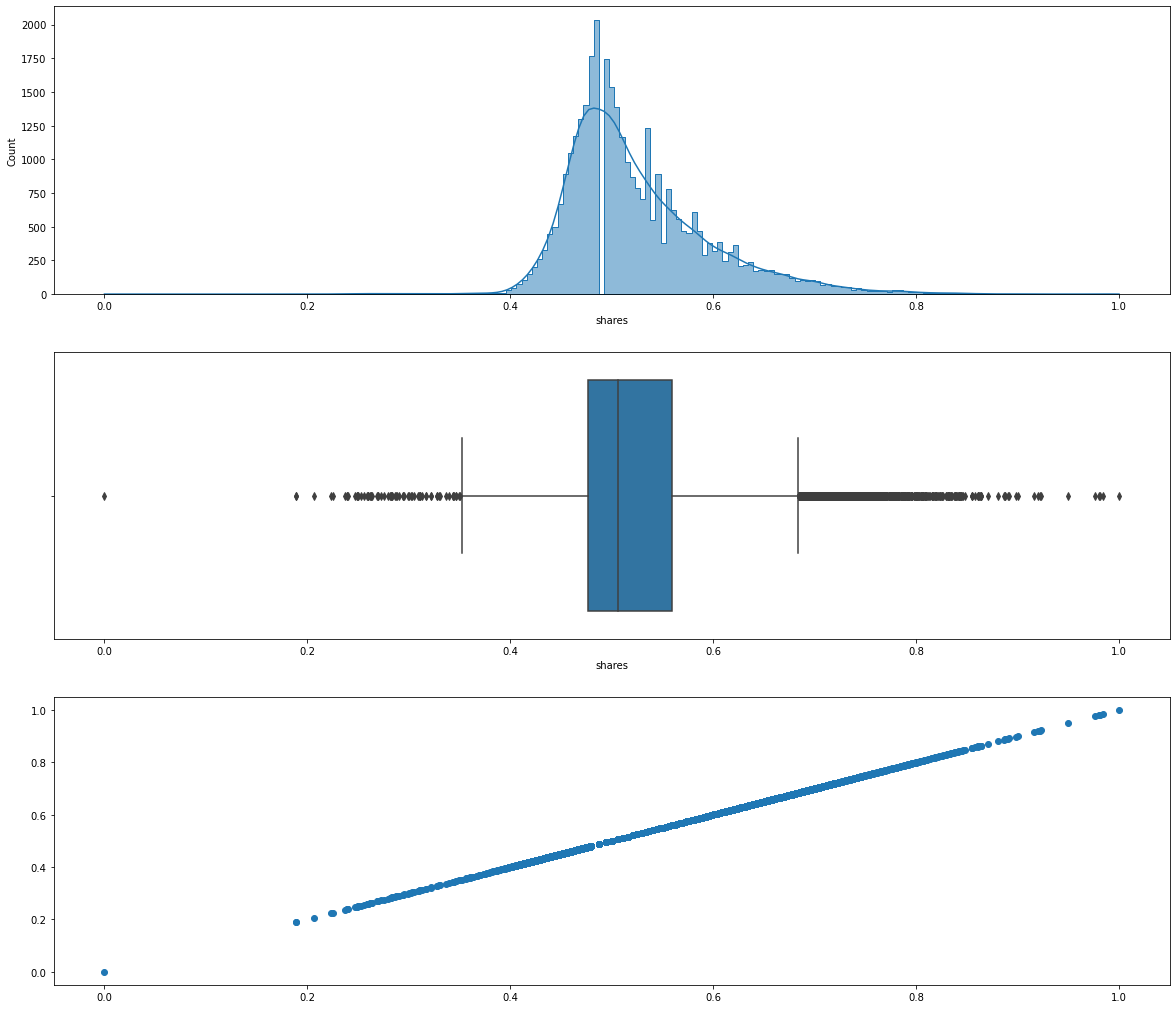

In [322]:
featureAnalysis('shares',dataset)

##### first with equal size

In [195]:
def testClassification_Qcut(datasetClass):
    dataset_class = datasetClass.copy()
    dataset_class['target'] = pd.qcut(datasetClass['shares'], q=5,
                                           labels=['very_low', 'low', 'medium', 'high', 'very_high'])
    dataset_class.drop('shares', inplace=True, axis=1)
    decisionTree(dataset_class)
    randomForestClassifier(dataset_class)
    knn(dataset_class)

In [196]:
def testClassification_Qcut3(datasetClass):
    dataset_class = datasetClass.copy()
    dataset_class['target'] = pd.qcut(datasetClass['shares'], q=3,
                                           labels=['low', 'medium', 'high'])
    dataset_class.drop('shares', inplace=True, axis=1)
    decisionTree(dataset_class)
    randomForestClassifier(dataset_class)
    knn(dataset_class)

#### 1.OnlineNewsPopularity
+ two non predictive features removed

In [197]:
testClassification_Qcut(OnlineNewsPopularity)


DecisionTree.........................................

Accuracy: 0.25198637911464244
              precision    recall  f1-score   support

    very_low       0.23      0.22      0.22      1453
      medium       0.25      0.26      0.25      1789
         low       0.20      0.21      0.21      1505
   very_high       0.27      0.27      0.27      1560
        high       0.30      0.30      0.30      1622

    accuracy                           0.25      7929
   macro avg       0.25      0.25      0.25      7929
weighted avg       0.25      0.25      0.25      7929


RandomForest.........................................

Accuracy: 0.32299155000630597
              precision    recall  f1-score   support

    very_low       0.29      0.22      0.25      1453
      medium       0.27      0.30      0.28      1789
         low       0.26      0.16      0.19      1505
   very_high       0.35      0.47      0.40      1560
        high       0.39      0.45      0.42      1622

    accuracy 

In [198]:
testClassification_Qcut3(OnlineNewsPopularity)


DecisionTree.........................................

Accuracy: 0.40068104426787743
              precision    recall  f1-score   support

         low       0.41      0.40      0.40      2571
      medium       0.46      0.46      0.46      2986
        high       0.32      0.32      0.32      2372

    accuracy                           0.40      7929
   macro avg       0.40      0.40      0.40      7929
weighted avg       0.40      0.40      0.40      7929


RandomForest.........................................

Accuracy: 0.5111615588346576
              precision    recall  f1-score   support

         low       0.50      0.58      0.53      2571
      medium       0.56      0.69      0.62      2986
        high       0.41      0.21      0.28      2372

    accuracy                           0.51      7929
   macro avg       0.49      0.49      0.48      7929
weighted avg       0.49      0.51      0.49      7929


KNN..................................................

Accuracy: 0

#### 2.Dataset_withContetn
+ Before deleting records with No content

In [199]:
testClassification_Qcut(dataset_Yhat)


DecisionTree.........................................

Accuracy: 0.23956843884050436
              precision    recall  f1-score   support

    very_low       0.20      0.19      0.19      1467
      medium       0.24      0.25      0.25      1723
         low       0.19      0.20      0.20      1493
   very_high       0.27      0.26      0.27      1490
        high       0.29      0.29      0.29      1520

    accuracy                           0.24      7693
   macro avg       0.24      0.24      0.24      7693
weighted avg       0.24      0.24      0.24      7693


RandomForest.........................................

Accuracy: 0.3215910568048876
              precision    recall  f1-score   support

    very_low       0.29      0.21      0.24      1467
      medium       0.29      0.34      0.31      1723
         low       0.24      0.14      0.18      1493
   very_high       0.36      0.47      0.41      1490
        high       0.38      0.44      0.41      1520

    accuracy  

In [200]:
testClassification_Qcut3(dataset_Yhat)


DecisionTree.........................................

Accuracy: 0.3960743533082023
              precision    recall  f1-score   support

         low       0.40      0.39      0.39      2530
      medium       0.46      0.46      0.46      2843
        high       0.32      0.32      0.32      2320

    accuracy                           0.40      7693
   macro avg       0.39      0.39      0.39      7693
weighted avg       0.40      0.40      0.40      7693


RandomForest.........................................

Accuracy: 0.49980501754842066
              precision    recall  f1-score   support

         low       0.50      0.57      0.53      2530
      medium       0.53      0.68      0.60      2843
        high       0.40      0.20      0.27      2320

    accuracy                           0.50      7693
   macro avg       0.48      0.48      0.47      7693
weighted avg       0.48      0.50      0.48      7693


KNN..................................................

Accuracy: 0

#### 3.Datset_Outlier
+ Before outlier handling

In [201]:
testClassification_Qcut(datset_Outlier)


DecisionTree.........................................

Accuracy: 0.24658780709736125
              precision    recall  f1-score   support

    very_low       0.21      0.22      0.21      1410
      medium       0.24      0.23      0.24      1721
         low       0.20      0.21      0.20      1462
   very_high       0.28      0.29      0.29      1509
        high       0.29      0.28      0.29      1591

    accuracy                           0.25      7693
   macro avg       0.25      0.25      0.25      7693
weighted avg       0.25      0.25      0.25      7693


RandomForest.........................................

Accuracy: 0.32042116209541144
              precision    recall  f1-score   support

    very_low       0.29      0.23      0.25      1410
      medium       0.28      0.33      0.30      1721
         low       0.24      0.14      0.18      1462
   very_high       0.36      0.47      0.41      1509
        high       0.38      0.41      0.40      1591

    accuracy 

In [202]:
testClassification_Qcut3(datset_Outlier)


DecisionTree.........................................

Accuracy: 0.4012738853503185
              precision    recall  f1-score   support

         low       0.42      0.42      0.42      2494
      medium       0.47      0.45      0.46      2904
        high       0.31      0.32      0.32      2295

    accuracy                           0.40      7693
   macro avg       0.40      0.40      0.40      7693
weighted avg       0.40      0.40      0.40      7693


RandomForest.........................................

Accuracy: 0.5042246197842194
              precision    recall  f1-score   support

         low       0.50      0.58      0.54      2494
      medium       0.55      0.68      0.61      2904
        high       0.38      0.19      0.26      2295

    accuracy                           0.50      7693
   macro avg       0.48      0.49      0.47      7693
weighted avg       0.48      0.50      0.48      7693


KNN..................................................

Accuracy: 0.

#### 4.Datset
+ Final result

In [203]:
testClassification_Qcut(dataset)


DecisionTree.........................................

Accuracy: 0.2426009622393935
              precision    recall  f1-score   support

    very_low       0.22      0.23      0.23      1246
      medium       0.24      0.24      0.24      1509
         low       0.20      0.21      0.20      1354
   very_high       0.27      0.26      0.27      1358
        high       0.28      0.27      0.28      1392

    accuracy                           0.24      6859
   macro avg       0.24      0.24      0.24      6859
weighted avg       0.24      0.24      0.24      6859


RandomForest.........................................

Accuracy: 0.33386791077416533
              precision    recall  f1-score   support

    very_low       0.29      0.23      0.26      1246
      medium       0.28      0.29      0.28      1509
         low       0.30      0.16      0.21      1354
   very_high       0.36      0.51      0.42      1358
        high       0.39      0.48      0.43      1392

    accuracy  

In [204]:
testClassification_Qcut3(dataset)


DecisionTree.........................................

Accuracy: 0.41186761918647036
              precision    recall  f1-score   support

         low       0.40      0.41      0.41      2220
      medium       0.49      0.48      0.48      2549
        high       0.33      0.33      0.33      2090

    accuracy                           0.41      6859
   macro avg       0.41      0.41      0.41      6859
weighted avg       0.41      0.41      0.41      6859


RandomForest.........................................

Accuracy: 0.5082373523837294
              precision    recall  f1-score   support

         low       0.50      0.61      0.55      2220
      medium       0.55      0.68      0.61      2549
        high       0.41      0.19      0.26      2090

    accuracy                           0.51      6859
   macro avg       0.49      0.49      0.47      6859
weighted avg       0.49      0.51      0.48      6859


KNN..................................................

Accuracy: 0

# 

<a name="6"></a>
##  **Exercise 13**
Implement batch gradient descent with early stopping for softmax regression from scratch. Use it on a classification task on the Penguins dataset.

In [205]:
df = sns.load_dataset('penguins')

In [206]:
df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
6       Adelie  Torgersen            38.9           17.8              181.0   
7       Adelie  Torgersen            39.2           19.6              195.0   
8       Adelie  Torgersen            34.1           18.1              193.0   
9       Adelie  Torgersen            42.0           20.2              190.0   
10      Adelie  Torgersen            37.8           17.1              186.0   
11      Adelie  Torgersen            37.8           17.3              180.0   
12      Adelie  Torgersen            41.1           17.6              182.0   
13      Adelie  Torgersen            38.6           21.2              191.0   
14      Adelie  Torgersen            34.6           21.1              198.0   
15      Adelie  Torgersen            36.6           17.8              185.0   
16      Adelie  Torgersen            38.7           19.0              195.0   
17      Adelie  Torgersen            42.5           20.7              197.0   
18      Adelie  Torgersen            34.4           18.4              184.0   
19      Adelie  Torgersen            46.0           21.5              194.0   
20      Adelie     Biscoe            37.8           18.3              174.0   
21      Adelie     Biscoe            37.7           18.7              180.0   
22      Adelie     Biscoe            35.9           19.2              189.0   
23      Adelie     Biscoe            38.2           18.1              185.0   
24      Adelie     Biscoe            38.8           17.2              180.0   
25      Adelie     Biscoe            35.3           18.9              187.0   
26      Adelie     Biscoe            40.6           18.6              183.0   
27      Adelie     Biscoe            40.5           17.9              187.0   
28      Adelie     Biscoe            37.9           18.6              172.0   
29      Adelie     Biscoe            40.5           18.9              180.0   
30      Adelie      Dream            39.5           16.7              178.0   
31      Adelie      Dream            37.2           18.1              178.0   
32      Adelie      Dream            39.5           17.8              188.0   
33      Adelie      Dream            40.9           18.9              184.0   
34      Adelie      Dream            36.4           17.0              195.0   
35      Adelie      Dream            39.2           21.1              196.0   
36      Adelie      Dream            38.8           20.0              190.0   
37      Adelie      Dream            42.2           18.5              180.0   
38      Adelie      Dream            37.6           19.3              181.0   
39      Adelie      Dream            39.8           19.1              184.0   
40      Adelie      Dream            36.5           18.0              182.0   
41      Adelie      Dream            40.8           18.4              195.0   
42      Adelie      Dream            36.0           18.5              186.0   
43      Adelie      Dream            44.1           19.7              196.0   
44      Adelie      Dream            37.0           16.9              185.0   
45      Adelie      Dream            39.6           18.8              190.0   
46      Adelie      Dream            41.1           19.0              182.0   
47      Adelie      Dream            37.5           18.9              179.0   
48      Adelie      Dream            36.0           17.9              190.0   
49      Adelie      Dream            42.3           21.2 

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [208]:
#we can drop null values according to number of them
df = df.dropna()

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [210]:
df['gender'] = 0
df.loc[df['sex'] == 'Male', 'gender'] = 1


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [211]:
df.drop('sex', inplace=True, axis=1)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [212]:
#encode categorical features
df = pd.get_dummies(df, columns=['species', 'island'])

In [213]:
df

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  gender  \
0              39.1           18.7              181.0       3750.0       1   
1              39.5           17.4              186.0       3800.0       0   
2              40.3           18.0              195.0       3250.0       0   
4              36.7           19.3              193.0       3450.0       0   
5              39.3           20.6              190.0       3650.0       1   
6              38.9           17.8              181.0       3625.0       0   
7              39.2           19.6              195.0       4675.0       1   
12             41.1           17.6              182.0       3200.0       0   
13             38.6           21.2              191.0       3800.0       1   
14             34.6           21.1              198.0       4400.0       1   
15             36.6           17.8              185.0       3700.0       0   
16             38.7           19.0              195.0       3450.0       0   
17             42.5           20.7              197.0       4500.0       1   
18             34.4           18.4              184.0       3325.0       0   
19             46.0           21.5              194.0       4200.0       1   
20             37.8           18.3              174.0       3400.0       0   
21             37.7           18.7              180.0       3600.0       1   
22             35.9           19.2              189.0       3800.0       0   
23             38.2           18.1              185.0       3950.0       1   
24             38.8           17.2              180.0       3800.0       1   
25             35.3           18.9              187.0       3800.0       0   
26             40.6           18.6              183.0       3550.0       1   
27             40.5           17.9              187.0       3200.0       0   
28             37.9           18.6              172.0       3150.0       0   
29             40.5           18.9              180.0       3950.0       1   
30             39.5           16.7              178.0       3250.0       0   
31             37.2           18.1              178.0       3900.0       1   
32             39.5           17.8              188.0       3300.0       0   
33             40.9           18.9              184.0       3900.0       1   
34             36.4           17.0              195.0       3325.0       0   
35             39.2           21.1              196.0       4150.0       1   
36             38.8           20.0              190.0       3950.0       1   
37             42.2           18.5              180.0       3550.0       0   
38             37.6           19.3              181.0       3300.0       0   
39             39.8           19.1              184.0       4650.0       1   
40             36.5           18.0              182.0       3150.0       0   
41             40.8           18.4              195.0       3900.0       1   
42             36.0           18.5              186.0       3100.0       0   
43             44.1           19.7              196.0       4400.0       1   
44             37.0           16.9              185.0       3000.0       0   
45             39.6           18.8              190.0       4600.0       1   
46             41.1           19.0              182.0       3425.0       1   
48             36.0           17.9              190.0       3450.0       0   
49             42.3           21.2              191.0       4150.0       1   
50             39.6           17.7              186.0       3500.0       0   
51             40.1           18.9              188.0       4300.0       1   
52             35.0           17.9              190.0       3450.0       0   
53             42.0           19.5              200.0       4050.0       1   
54             34.5           18.1              187.0       2900.0       0   
55             41.4           18.6              191.0       3700.0       1   
56             39.0        

In [214]:
df.shape

(333, 11)

In [215]:
df.describe()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      333.000000     333.000000         333.000000   333.000000   
mean        43.992793      17.164865         200.966967  4207.057057   
std          5.468668       1.969235          14.015765   805.215802   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.500000      15.600000         190.000000  3550.000000   
50%         44.500000      17.300000         197.000000  4050.000000   
75%         48.600000      18.700000         213.000000  4775.000000   
max         59.600000      21.500000         231.000000  6300.000000   

           gender  species_Adelie  species_Chinstrap  species_Gentoo  \
count  333.000000      333.000000         333.000000      333.000000   
mean     0.504505        0.438438           0.204204        0.357357   
std      0.500732        0.496942           0.403726        0.479942   
min      0.000000        0.000000           0.000000        0.000000   
25%      0.000000        0.000000           0.000000        0.000000   
50%      1.000000        0.000000           0.000000        0.000000   
75%      1.000000        1.000000           0.000000        1.000000   
max      1.000000        1.000000           1.000000        1.000000   

       island_Biscoe  island_Dream  island_Torgersen  
count     333.000000    333.000000        333.000000  
mean        0.489489      0.369369          0.141141  
std         0.500642      0.483360          0.348691  
min         0.000000      0.000000          0.000000  
25%         0.000000      0.000000          0.000000  
50%         0.000000      0.000000          0.000000  
75%         1.000000      1.000000          0.000000  
max         1.000000      1.000000          1.000000

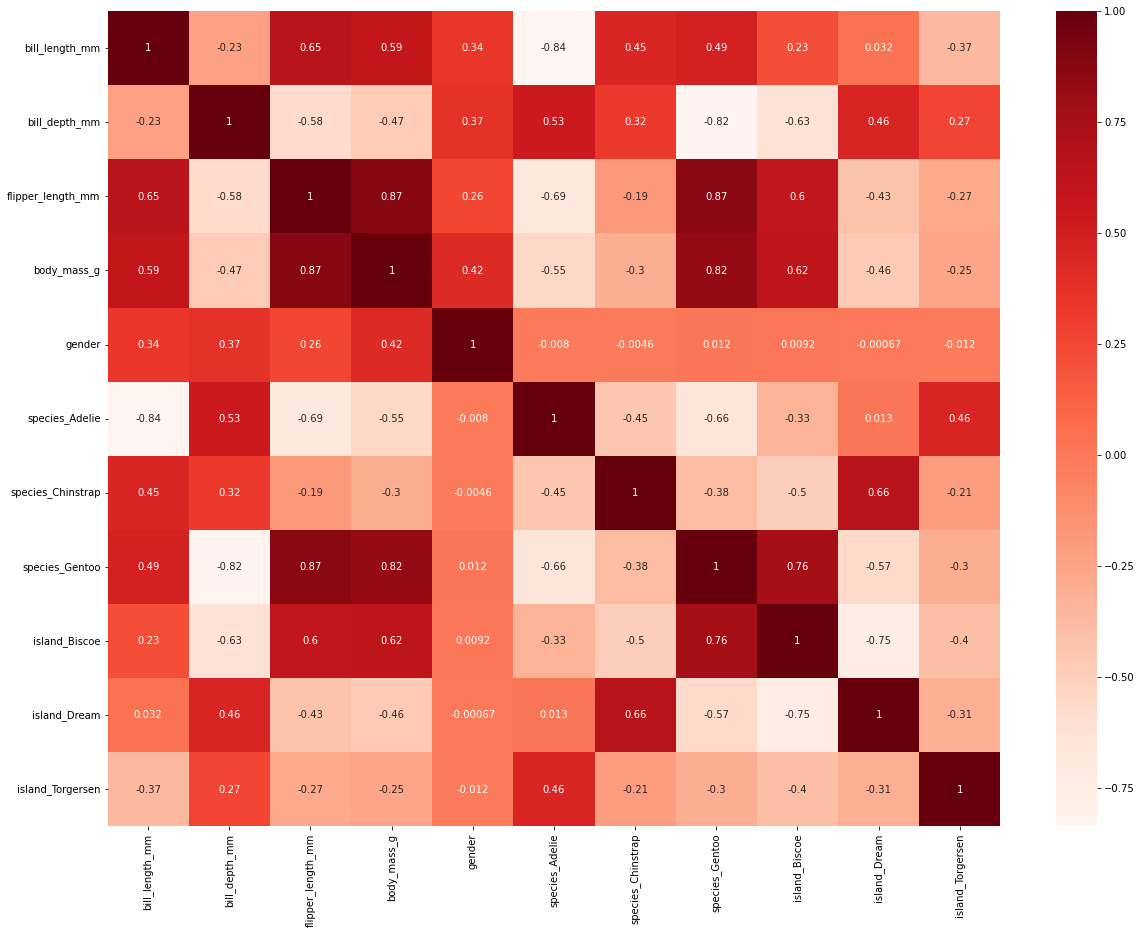

In [216]:
plt.figure(figsize=(20,15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

**It looks like there is no correlation between species and island with the target(obviously)**

In [217]:
df.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'gender', 'species_Adelie', 'species_Chinstrap', 'species_Gentoo',
       'island_Biscoe', 'island_Dream', 'island_Torgersen'],
      dtype='object')

In [218]:
#dropping them 
df.drop('species_Adelie', inplace=True, axis=1)
df.drop('species_Chinstrap', inplace=True, axis=1)
df.drop('species_Gentoo', inplace=True, axis=1)
df.drop('island_Biscoe', inplace=True, axis=1)
df.drop('island_Dream', inplace=True, axis=1)
df.drop('island_Torgersen', inplace=True, axis=1)

In [219]:
df

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  gender
0              39.1           18.7              181.0       3750.0       1
1              39.5           17.4              186.0       3800.0       0
2              40.3           18.0              195.0       3250.0       0
4              36.7           19.3              193.0       3450.0       0
5              39.3           20.6              190.0       3650.0       1
6              38.9           17.8              181.0       3625.0       0
7              39.2           19.6              195.0       4675.0       1
12             41.1           17.6              182.0       3200.0       0
13             38.6           21.2              191.0       3800.0       1
14             34.6           21.1              198.0       4400.0       1
15             36.6           17.8              185.0       3700.0       0
16             38.7           19.0              195.0       3450.0       0
17             42.5           20.7              197.0       4500.0       1
18             34.4           18.4              184.0       3325.0       0
19             46.0           21.5              194.0       4200.0       1
20             37.8           18.3              174.0       3400.0       0
21             37.7           18.7              180.0       3600.0       1
22             35.9           19.2              189.0       3800.0       0
23             38.2           18.1              185.0       3950.0       1
24             38.8           17.2              180.0       3800.0       1
25             35.3           18.9              187.0       3800.0       0
26             40.6           18.6              183.0       3550.0       1
27             40.5           17.9              187.0       3200.0       0
28             37.9           18.6              172.0       3150.0       0
29             40.5           18.9              180.0       3950.0       1
30             39.5           16.7              178.0       3250.0       0
31             37.2           18.1              178.0       3900.0       1
32             39.5           17.8              188.0       3300.0       0
33             40.9           18.9              184.0       3900.0       1
34             36.4           17.0              195.0       3325.0       0
35             39.2           21.1              196.0       4150.0       1
36             38.8           20.0              190.0       3950.0       1
37             42.2           18.5              180.0       3550.0       0
38             37.6           19.3              181.0       3300.0       0
39             39.8           19.1              184.0       4650.0       1
40             36.5           18.0              182.0       3150.0       0
41             40.8           18.4              195.0       3900.0       1
42             36.0           18.5              186.0       3100.0       0
43             44.1           19.7              196.0       4400.0       1
44             37.0           16.9              185.0       3000.0       0
45             39.6           18.8              190.0       4600.0       1
46             41.1           19.0              182.0       3425.0       1
48             36.0           17.9              190.0       3450.0       0
49             42.3           21.2              191.0       4150.0       1
50             39.6           17.7              186.0       3500.0       0
51             40.1           18.9              188.0       4300.0       1
52             35.0           17.9              190.0       3450.0       0
53             42.0           19.5              200.0       4050.0       1
54             34.5           18.1              187.0       2900.0       0
55             41.4           18.6              191.0       3700.0       1
56             39.0           17.5              186.0       3550.0       0
57             40.6           18.8              193.0       3800.0       1
58             36.5           

### scaling numerical values

In [220]:
#first we should split dataset
X = df[df.columns.difference(['gender'])]
Y = df['gender']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/5, random_state = 0 )

In [221]:
scaler = MinMaxScaler()
scale = MinMaxScaler().fit(X_train)
X_train = scale.transform(X_train)

### softmax function

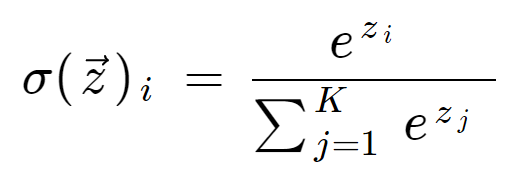

In [239]:
def softmax(x):
    #for the error
    x -= np.max(x, axis=1, keepdims=True)
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

In [240]:
def cross_entropy_loss(y_pred, y_true):
    m = y_true.shape[0]
    log_likelihood = -np.log(y_pred[range(m), y_true])
    loss = np.sum(log_likelihood) / m
    return loss

In [241]:
def batch_gradient_descent(X, y, learning_rate=0.1, max_iters=1000, tol=1e-4, early_stopping_rounds=10, validation_size=0.2):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=validation_size, random_state=42)
    

    n_features = X_train.shape[1]
    n_classes = len(np.unique(y_train))
    W = np.zeros((n_features, n_classes))
    b = np.zeros(n_classes)
    

    train_losses = []
    val_losses = []
    
    patience = early_stopping_rounds
    best_val_loss = np.inf
    
    # Perform batch gradient descent
    for i in range(max_iters):
        
        y_pred_train = softmax(np.dot(X_train, W) + b)
        grad_w = np.dot(X_train.T, (y_pred_train - pd.get_dummies(y_train).values)) / X_train.shape[0]
        grad_b = np.mean(y_pred_train - pd.get_dummies(y_train).values, axis=0)
        
        # Update the weights and biases
        W -= learning_rate * grad_w
        b -= learning_rate * grad_b
        
        
        train_loss = cross_entropy_loss(y_pred_train, y_train)
        val_loss = cross_entropy_loss(softmax(np.dot(X_val, W) + b), y_val)
        
       
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience = early_stopping_rounds
        else:
            patience -= 1
            if patience == 0:
                print(f'Early stopping after {i} iterations.')
            break
    
        if train_loss < tol:
            print(f'Tolerance level reached after {i} iterations.')
            break
    plt.plot(train_losses, label='Training loss')
    plt.plot(val_losses, label='Validation loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    return W, b


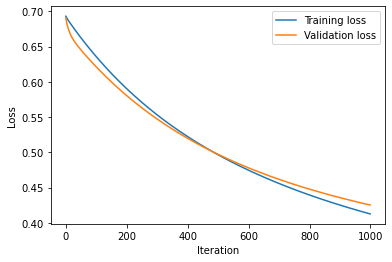

Accuracy: 0.39
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        41
           1       0.39      1.00      0.56        26

    accuracy                           0.39        67
   macro avg       0.69      0.50      0.28        67
weighted avg       0.76      0.39      0.22        67



In [245]:
W, b = batch_gradient_descent(X_train, Y_train)

y_pred_test = softmax(np.dot(X_test, W) + b)
y_pred_labels = np.argmax(y_pred_test, axis=1)

# Compute the accuracy and the classification report
accuracy = np.mean(y_pred_labels == Y_test)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(Y_test, y_pred_labels, zero_division=1))
